In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
import pandas as pd
import glob
from datetime import datetime, timedelta
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import seaborn as sns
import netgraph as ng
import logging
import pathlib
from collections import defaultdict
from hashlib import sha1
import json
import pandas as pd
import netgraph as ng

In [3]:
from analyzer import TraceAnalyzer, Model

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.printoptions(precision=2)

sns.set_style("darkgrid")
sns.set_context("paper")

# Get files

In [5]:
# files = sorted(glob.glob("data/sites/CA_SFU_T2-CSCS_LCG2/*.json"))
files = sorted(glob.glob("data/sites/FZK_LCCG2-INFN_T1/*.json"))
len(files)

59591

In [6]:
file_iter = iter(files)

# Re-implementation

In [7]:
log_folder = pathlib.Path("./logs/")

In [8]:
ta = TraceAnalyzer((x for x in files[:len(files)]))

In [9]:
ta.process()

In [10]:
keyiter = iter(ta.scores["221783c4f37865c5c01bf72d6409a8b0daf2f242"].keys())

In [11]:
x = ta.hash_trace["221783c4f37865c5c01bf72d6409a8b0daf2f242"][:2]

In [12]:
df = ta.models[x].to_frame()

In [13]:
with np.printoptions(precision=2):
    display(ta.scores["221783c4f37865c5c01bf72d6409a8b0daf2f242"][next(keyiter)])

array([[ 0.00e+00,  0.00e+00,  1.00e+00,  1.00e+00,  1.00e+00],
       [ 2.44e-02,  2.57e-03,  1.85e-10,  1.13e-17,  1.81e-14],
       [-4.10e+00,  5.90e+00,  1.29e+01,  1.73e+01,  1.55e+01],
       [ 5.00e-01,  5.00e-01,  5.00e-01,  5.00e-01,  5.00e-01],
       [ 5.00e-01,  5.00e-01,  5.00e-01,  5.00e-01,  5.00e-01],
       [ 9.00e-01,  3.63e+00,  4.47e+00,  3.19e+00,  1.86e+00]])

In [14]:
x = ta.scores['221783c4f37865c5c01bf72d6409a8b0daf2f242']

In [15]:
x[1672531217000]

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 2.43960093e-02,  2.57132046e-03,  1.84506631e-10,
         1.12818581e-17,  1.80914723e-14],
       [-4.10000000e+00,  5.90000000e+00,  1.29000000e+01,
         1.73000000e+01,  1.55000000e+01],
       [ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01,
         5.00000000e-01,  5.00000000e-01],
       [ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01,
         5.00000000e-01,  5.00000000e-01],
       [ 9.00000000e-01,  3.63333333e+00,  4.47500000e+00,
         3.18571429e+00,  1.86363636e+00]])

In [16]:
# rtt_is_outlier, rtt_prob, rtt_mu_diff, success_prob, success_score, rtt_ttl_rate

/home/msi/miniconda3/envs/stats/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


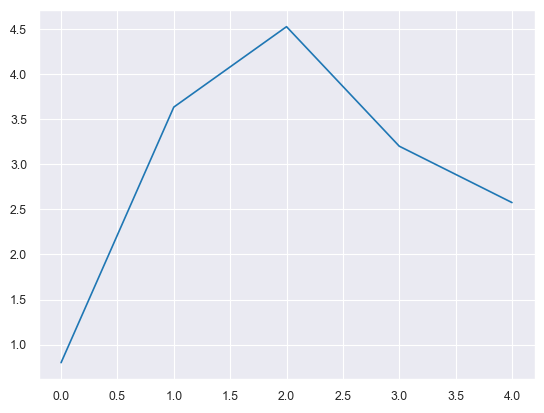

In [17]:
plt.plot(np.stack(x.values())[13, 5])

# Graph

In [18]:
list(ta.models.keys())[0]

('2a00:139c:5:585:0:41:2:12', '2a00:139c:5:585::3')

In [19]:
colors = defaultdict(lambda: "white")
colors.update({k: "green" for k in ta.sources.keys()})
colors.update({k: "orange" for k in ta.destinations.keys()})

In [20]:
probs = ta.graph_probs(True)

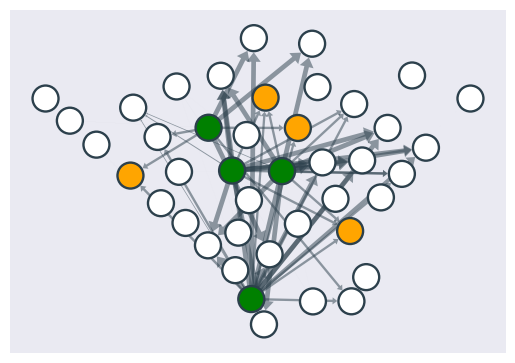

In [21]:
tmp = ng.Graph(
    ta.G,
    layout="dot",
    arrows=True,
    weighted=True,
    node_color={x:colors[x] for x in ta.G.nodes},
    edge_width={(x,y): probs[x,y] for x,y in ta.G.edges}
)

In [22]:
minima = np.array(list(probs.values())).min()
maxima = np.array(list(probs.values())).max()
frac = maxima - minima

In [23]:
key = ta.hash_trace["6c58aa7031316d644b586a1c0f8ce954544d4fb0"]

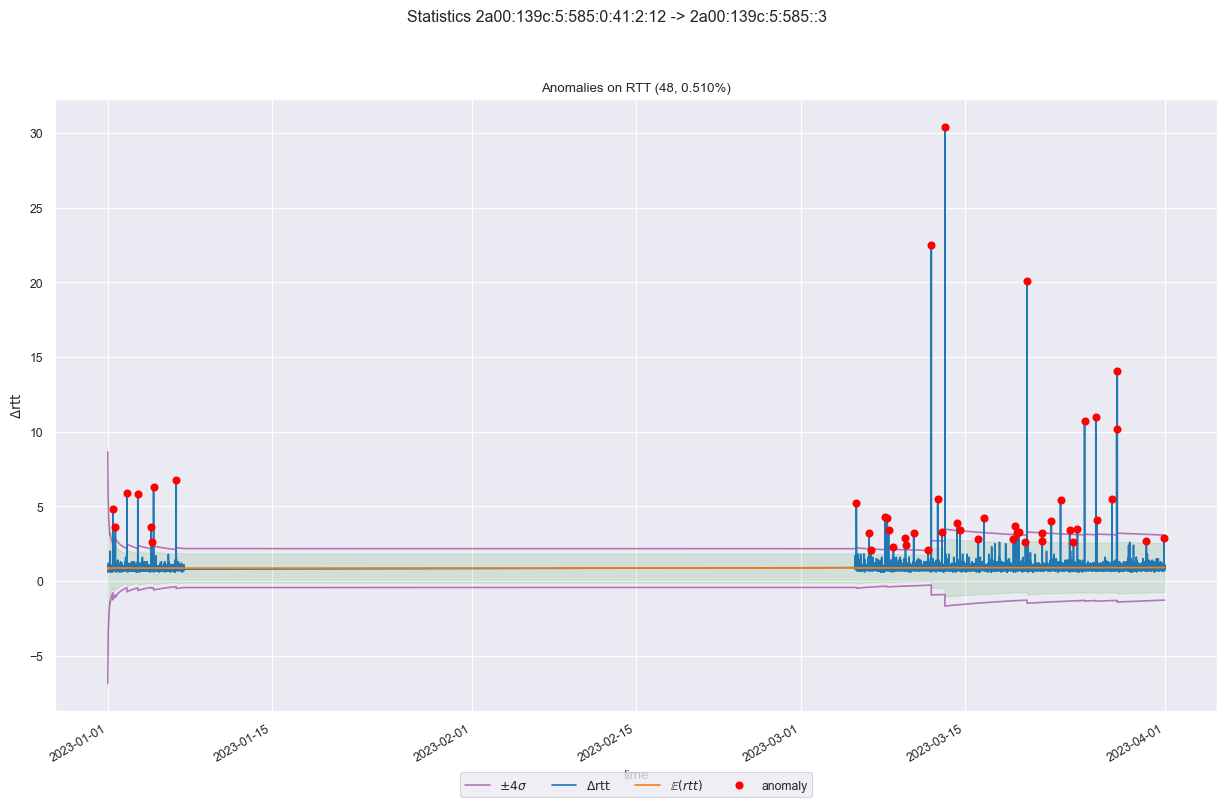

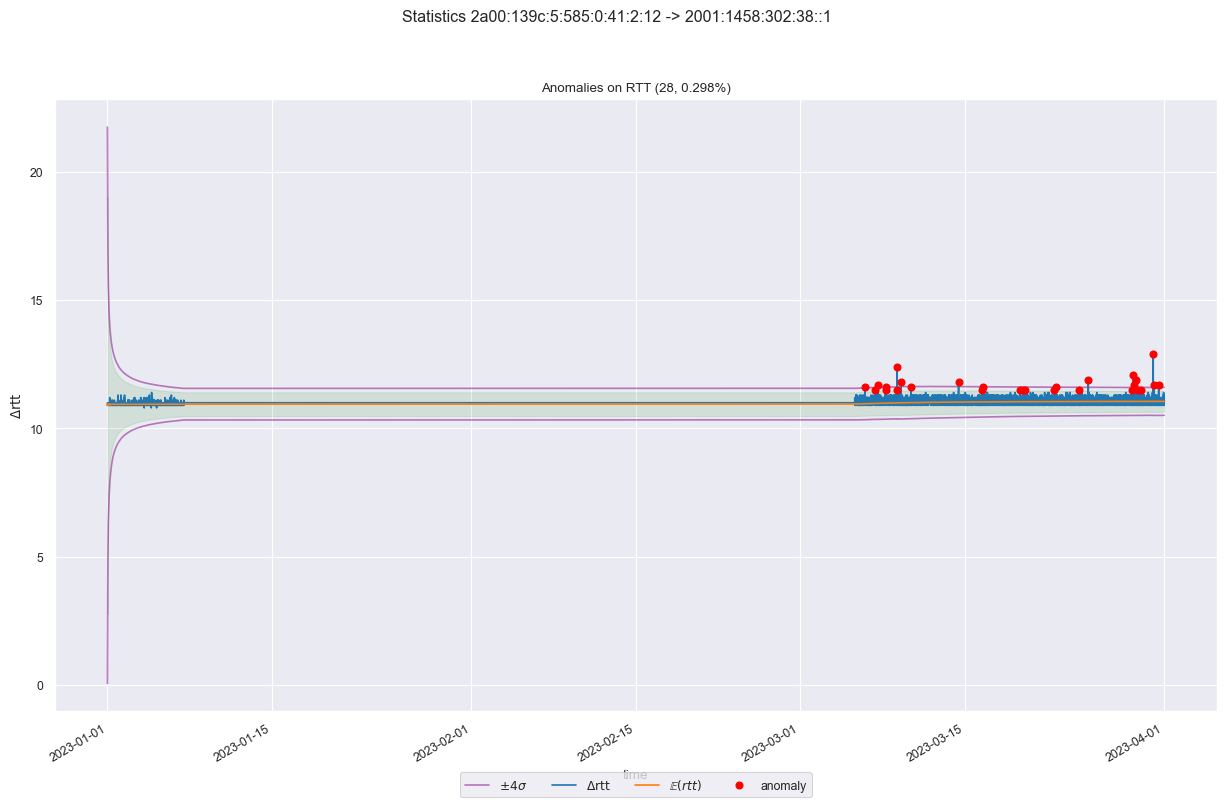

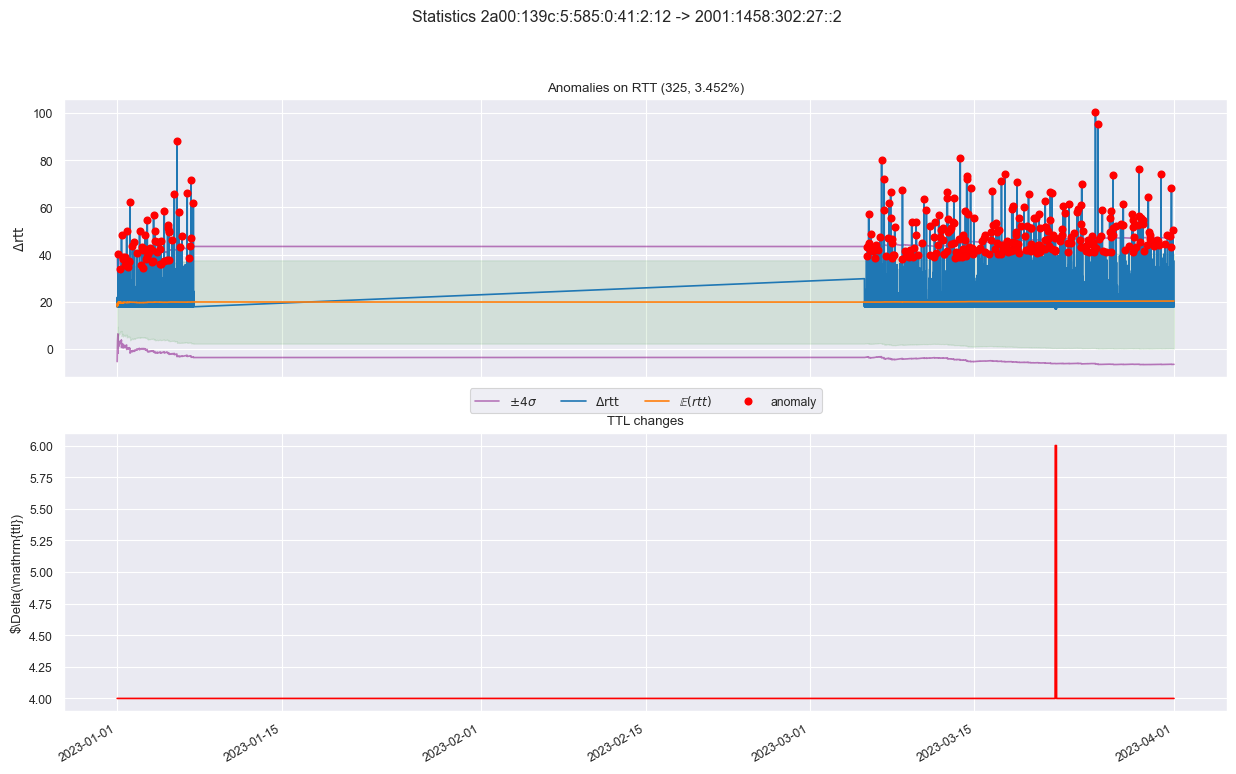

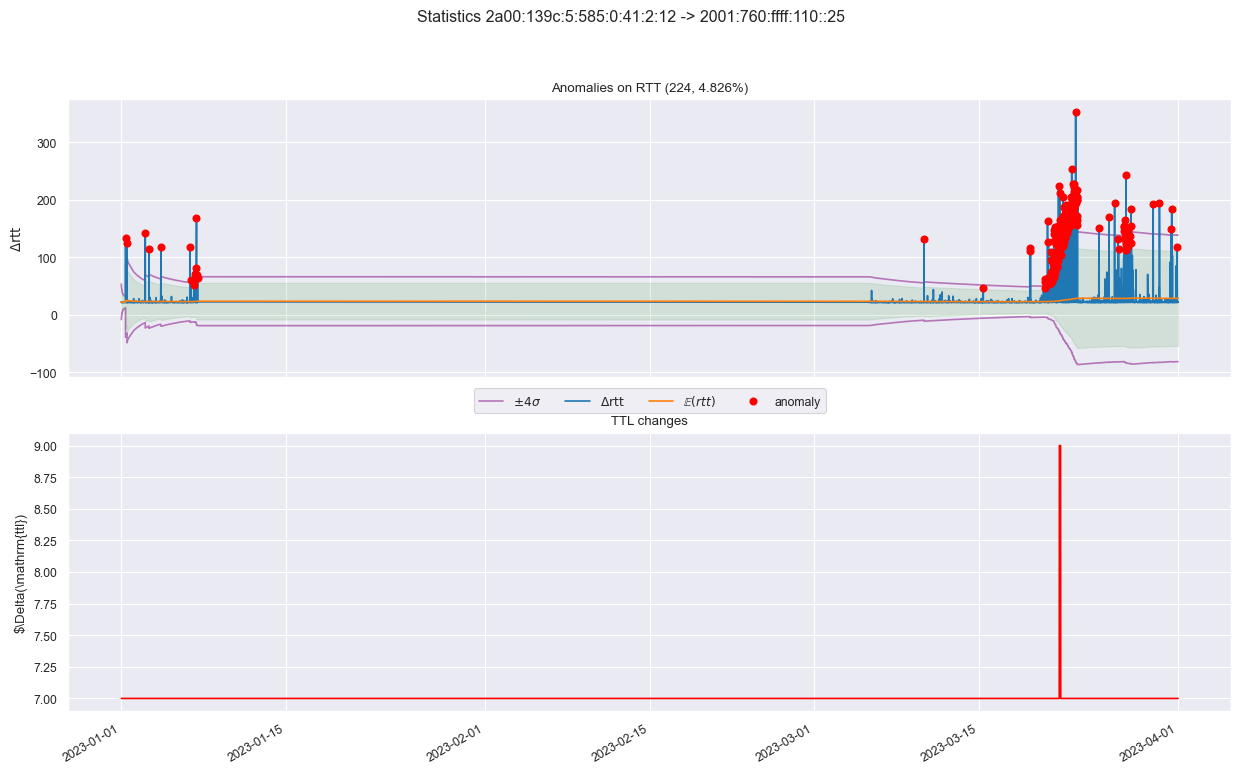

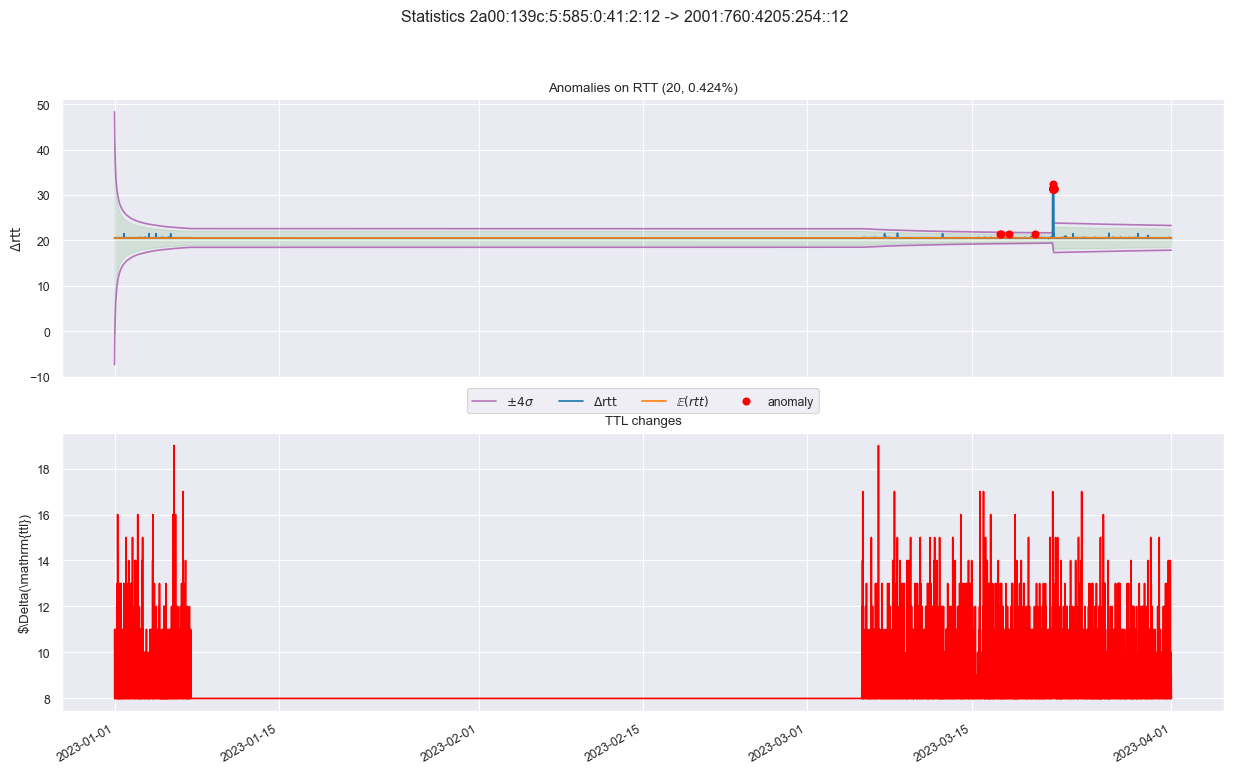

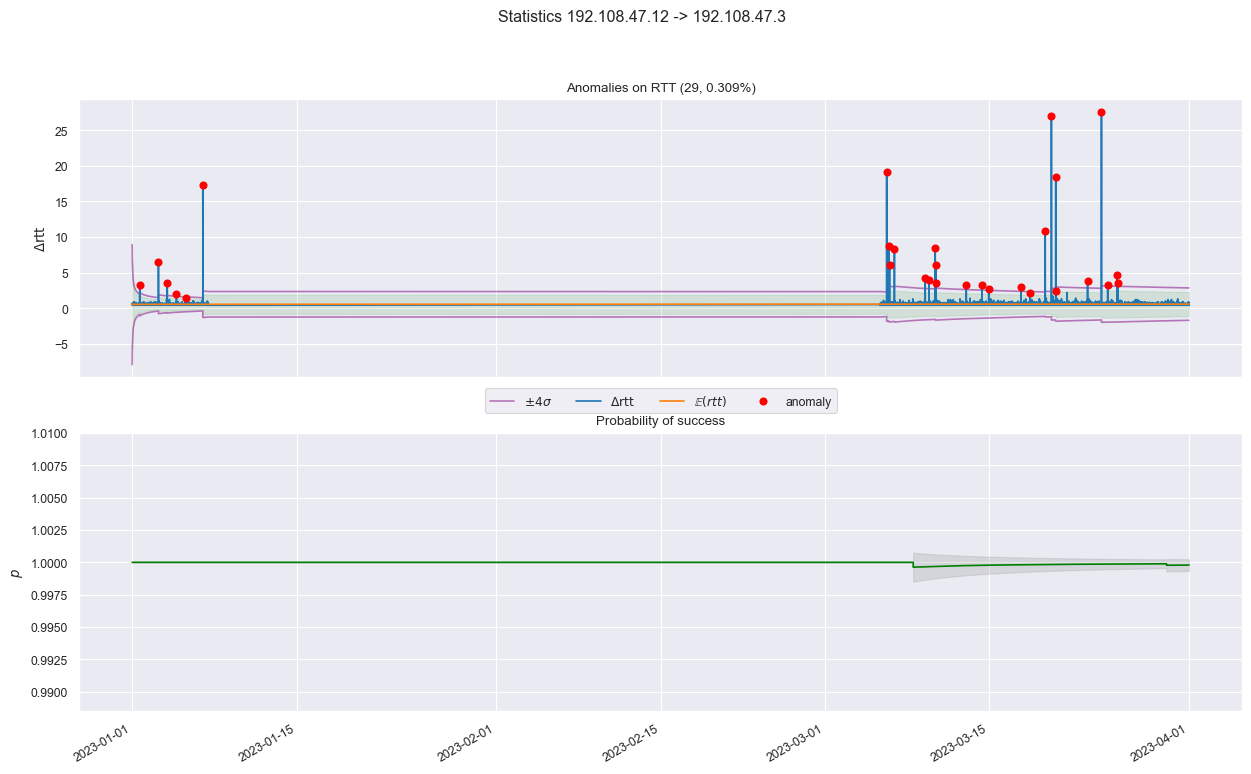

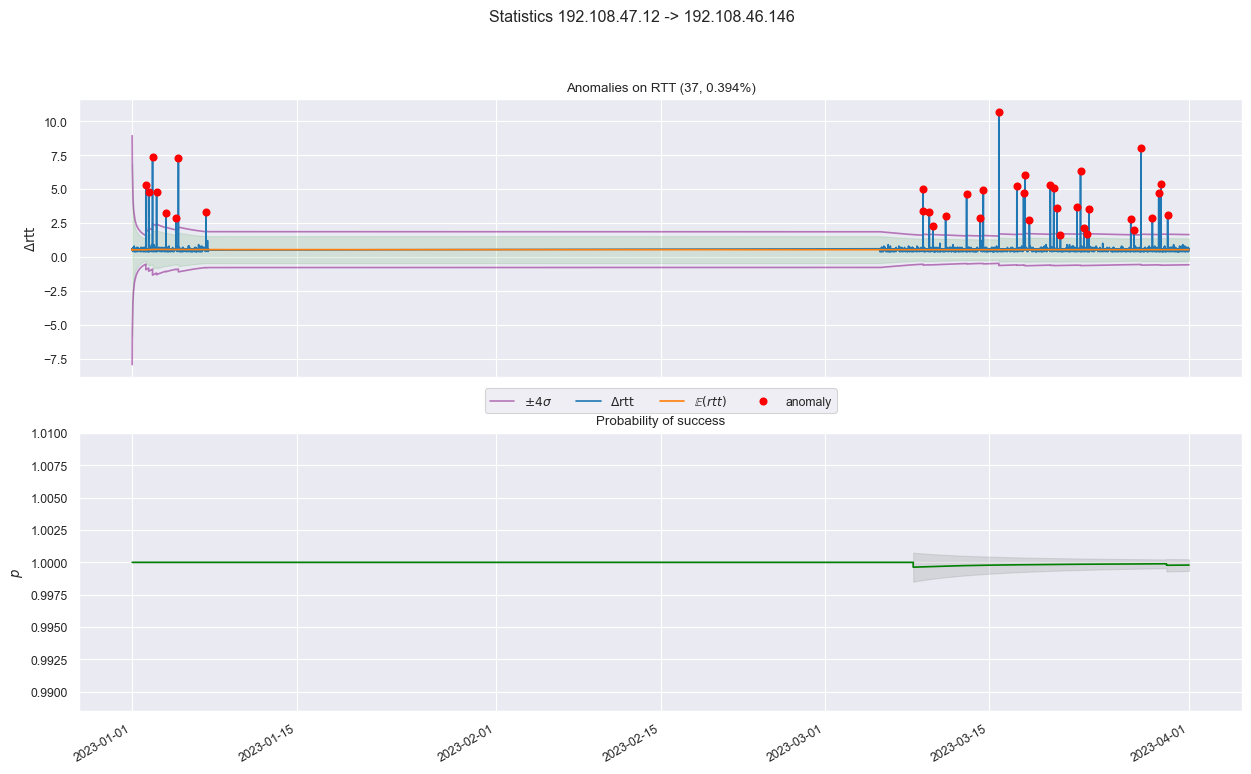

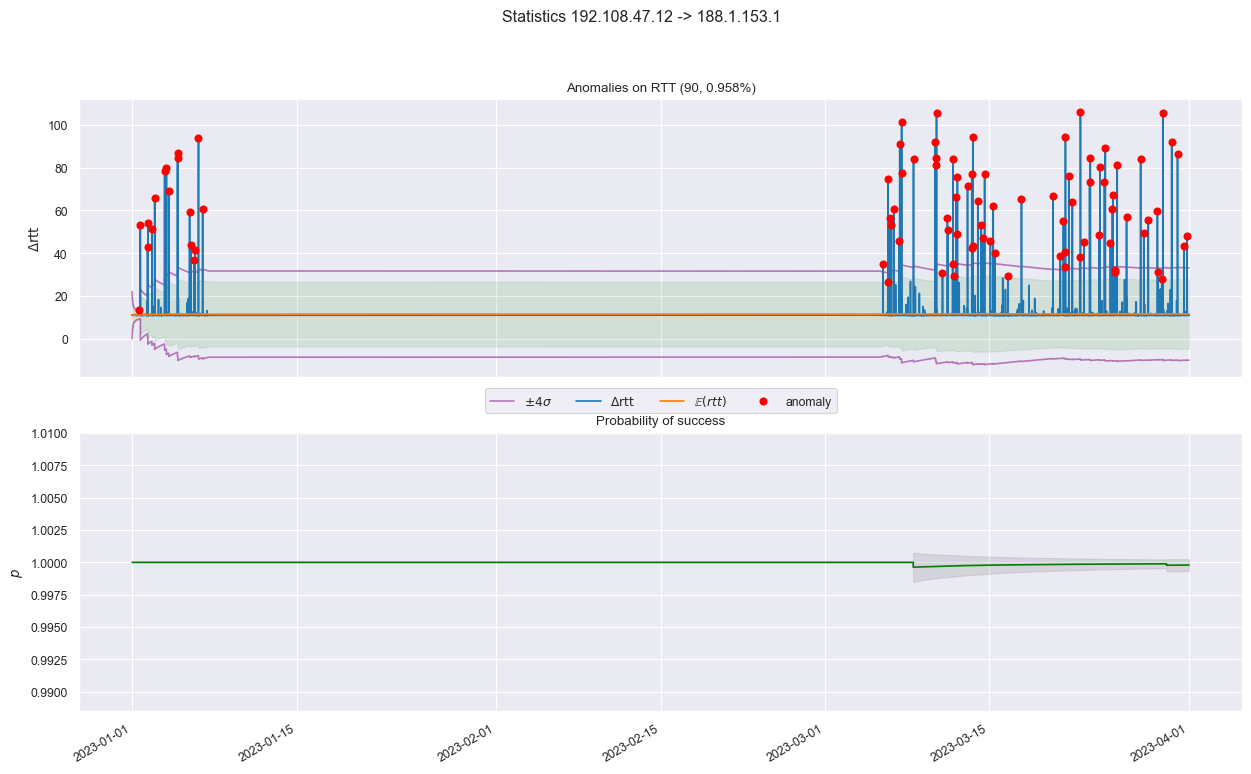

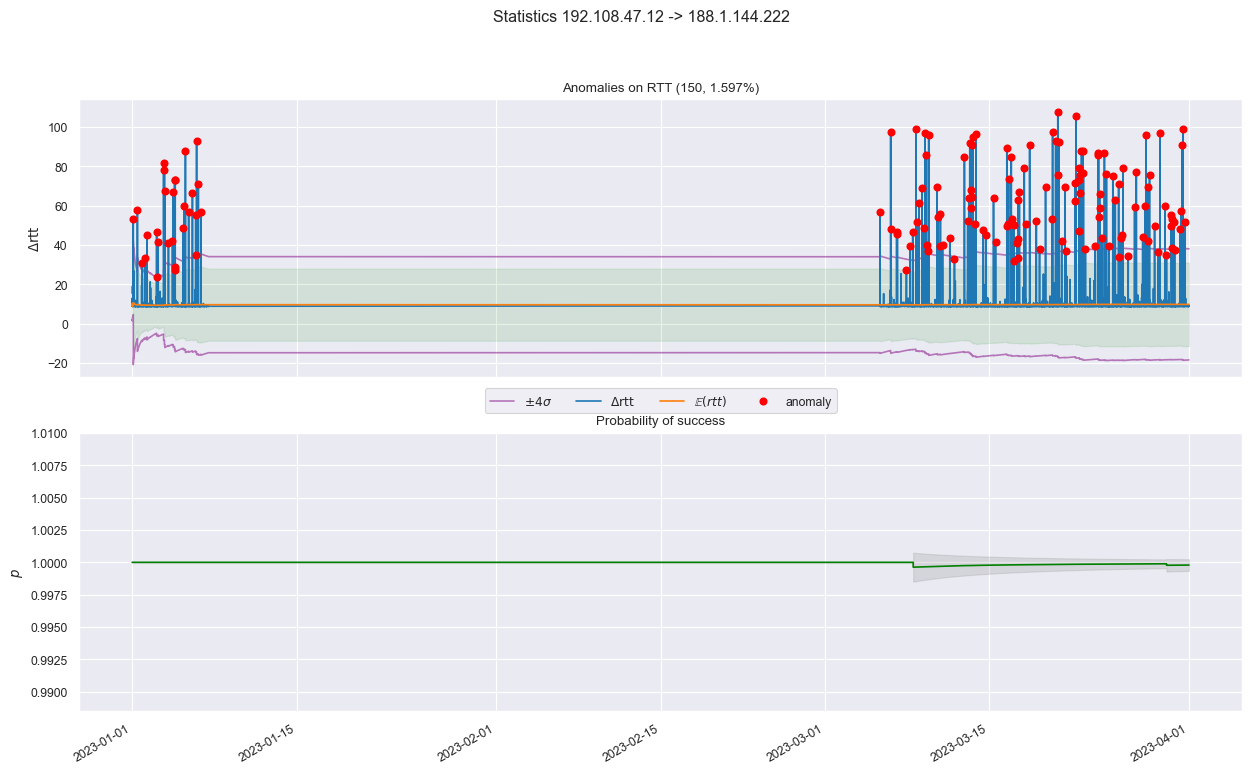

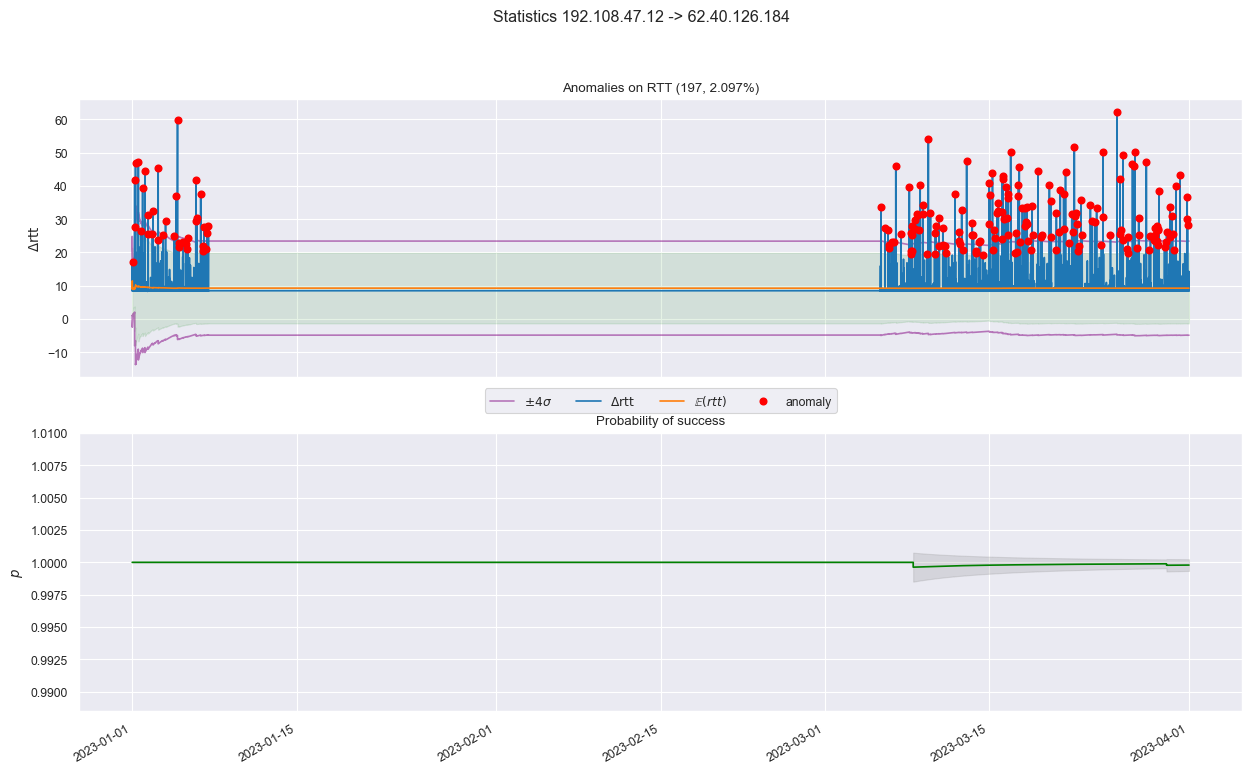

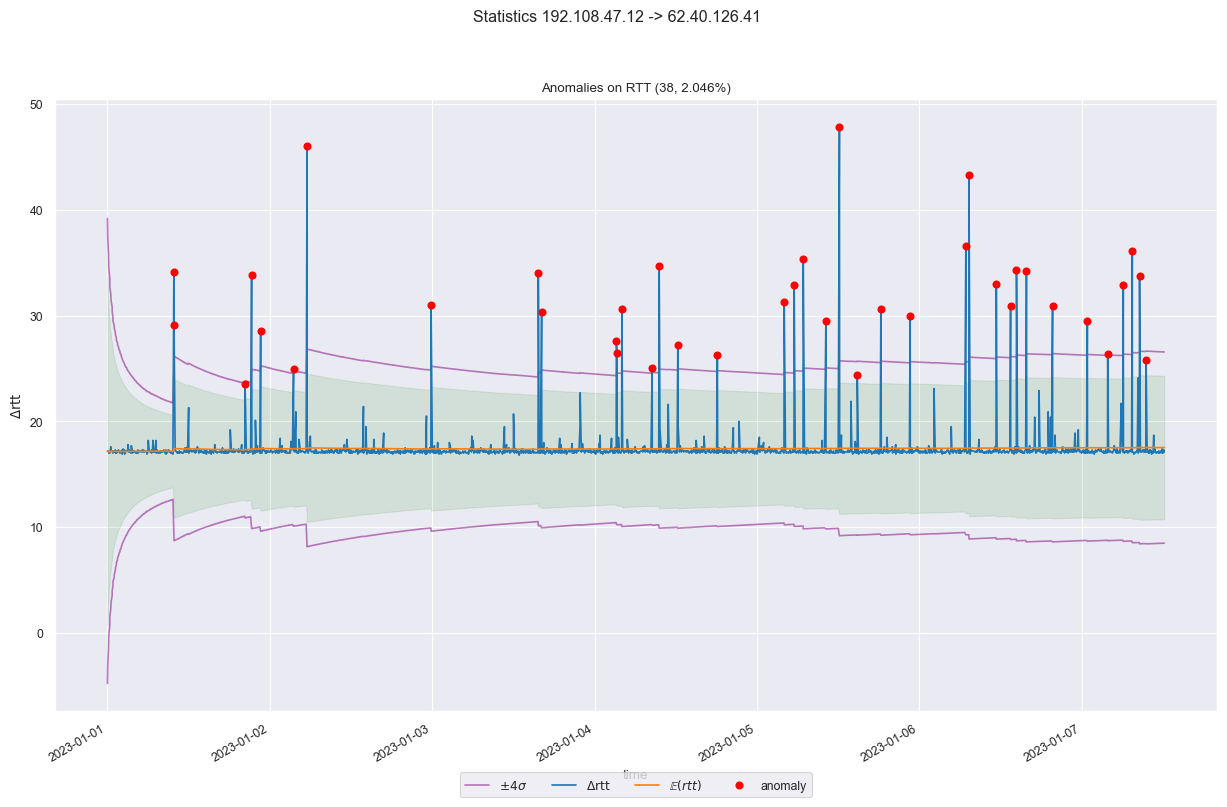

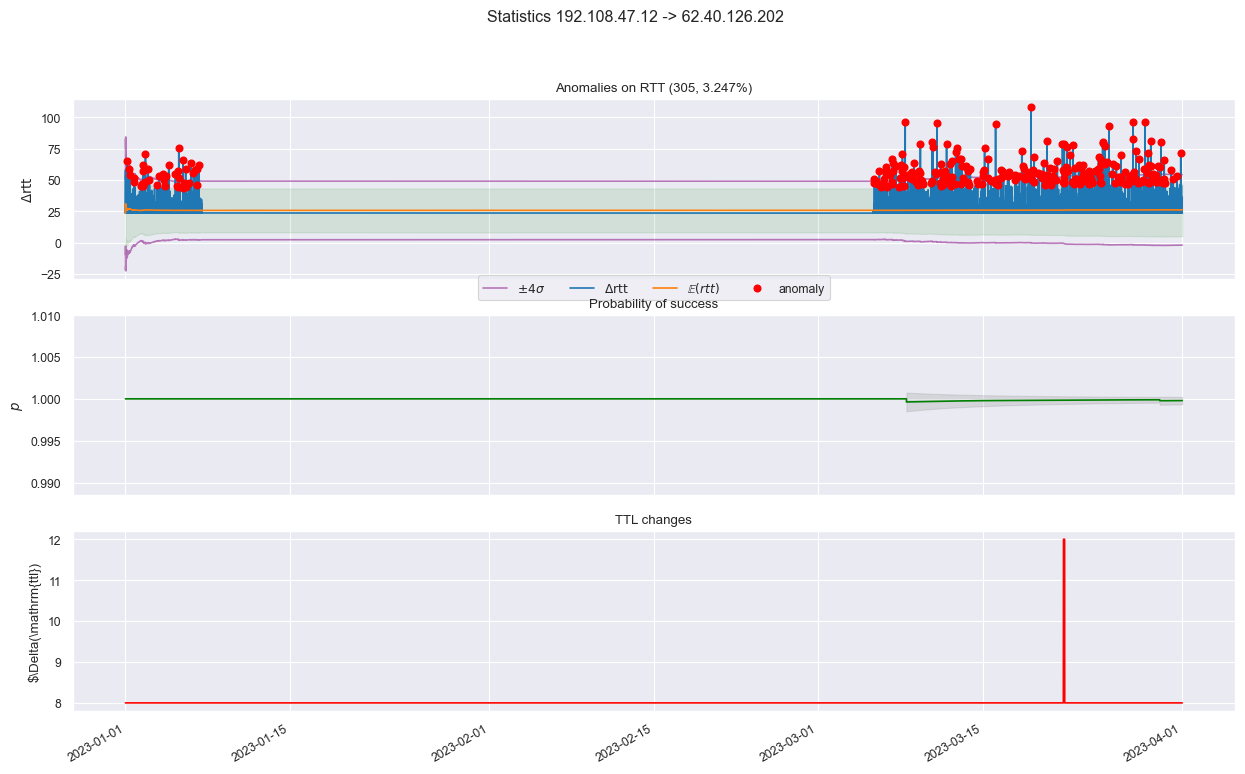

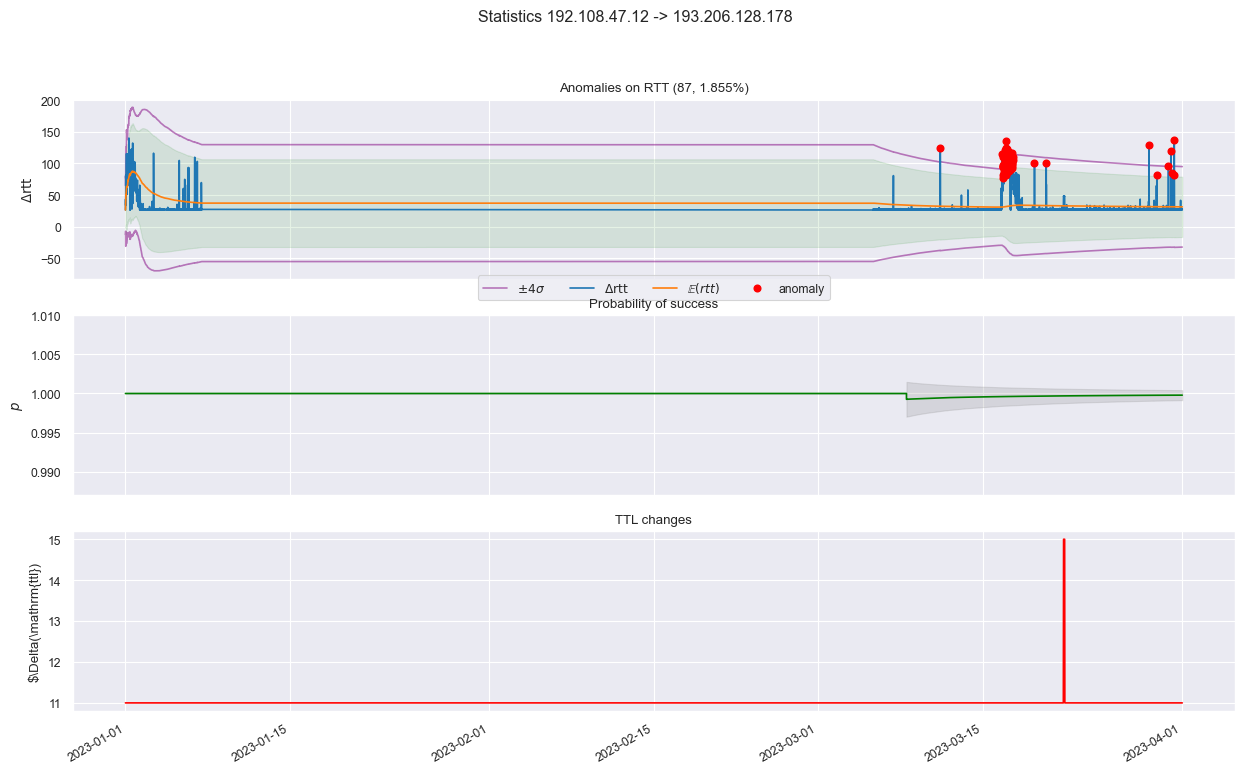

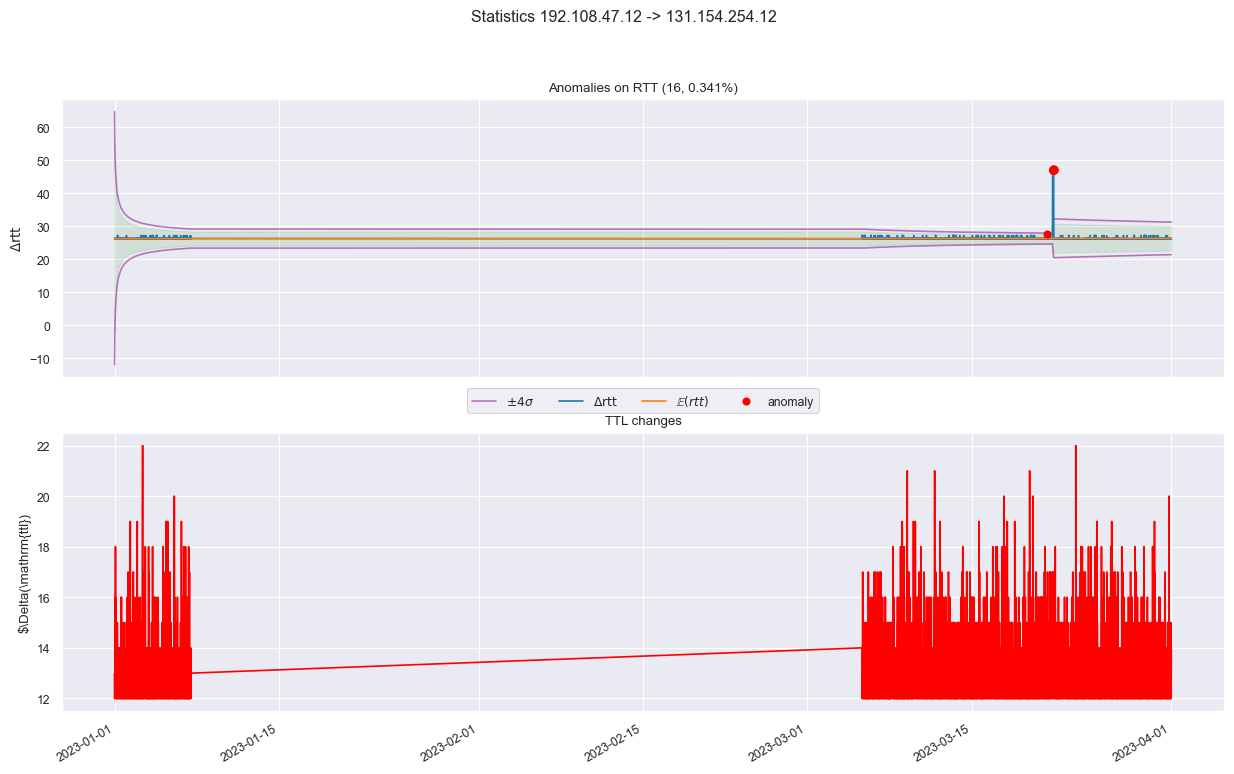

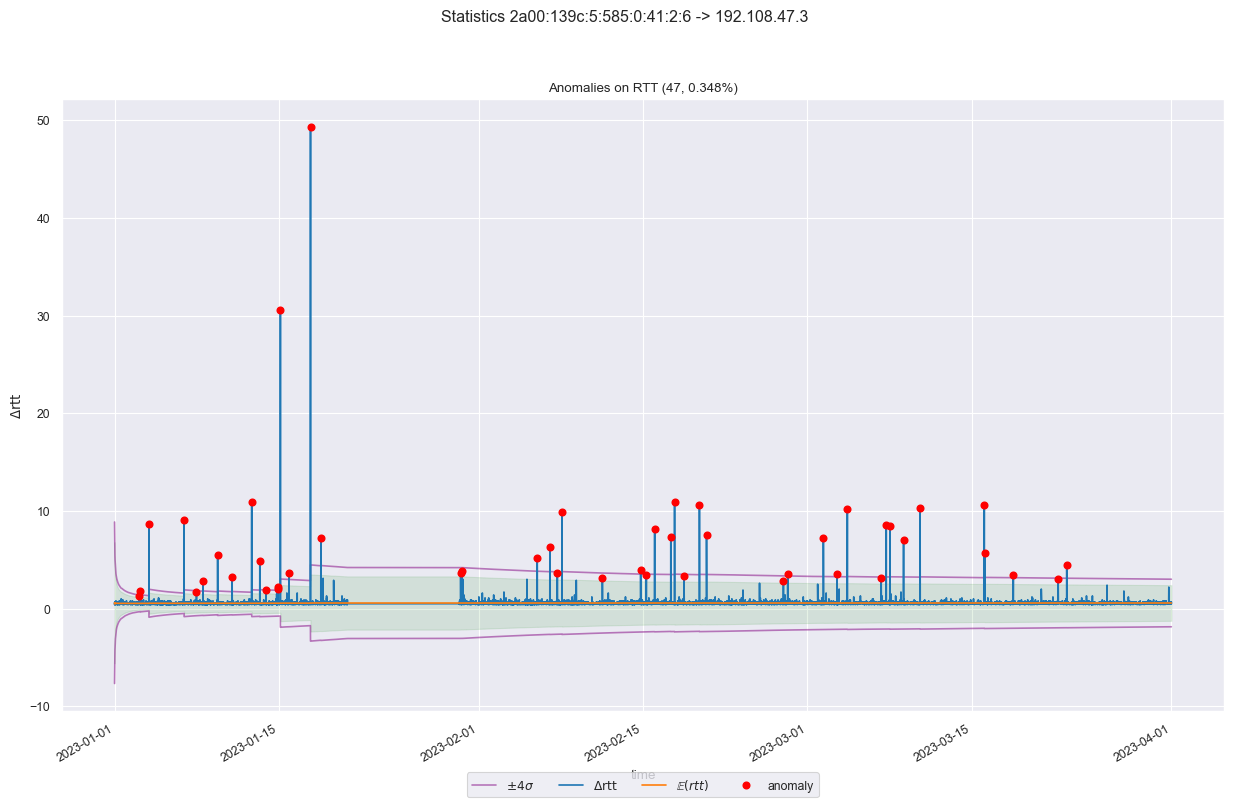

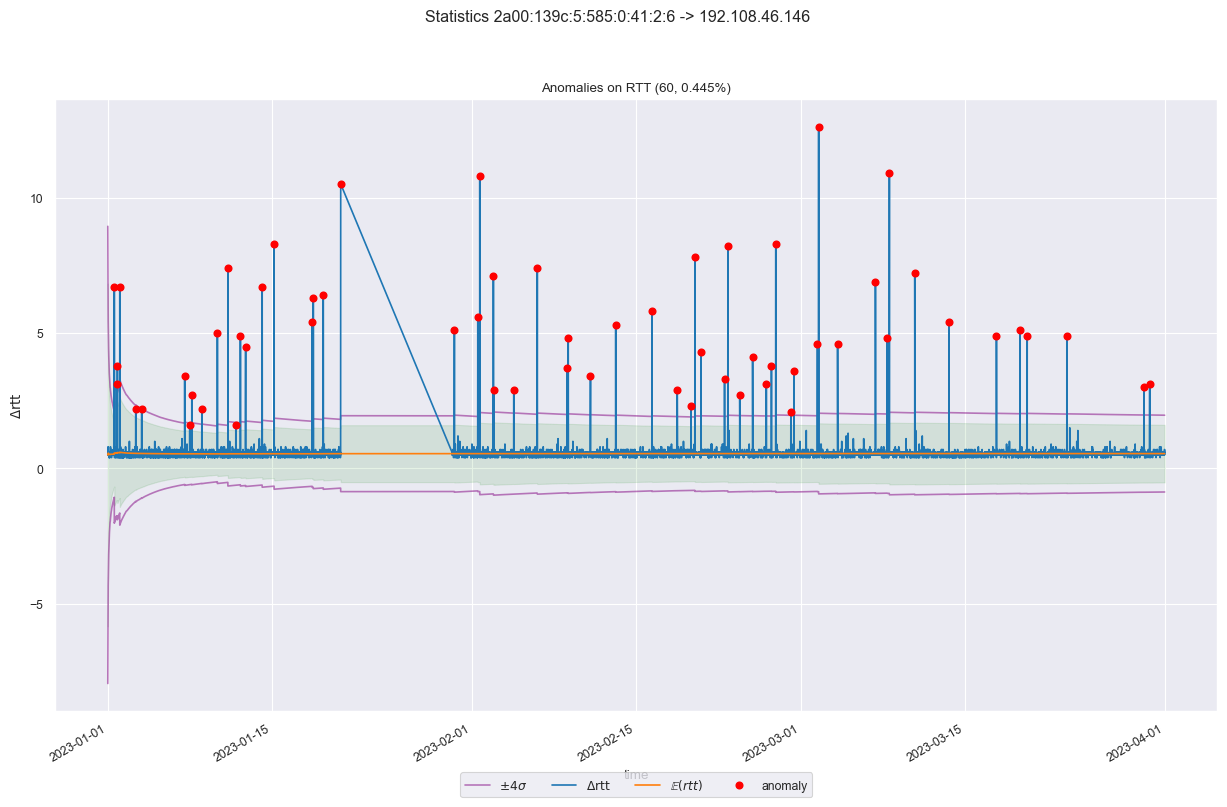

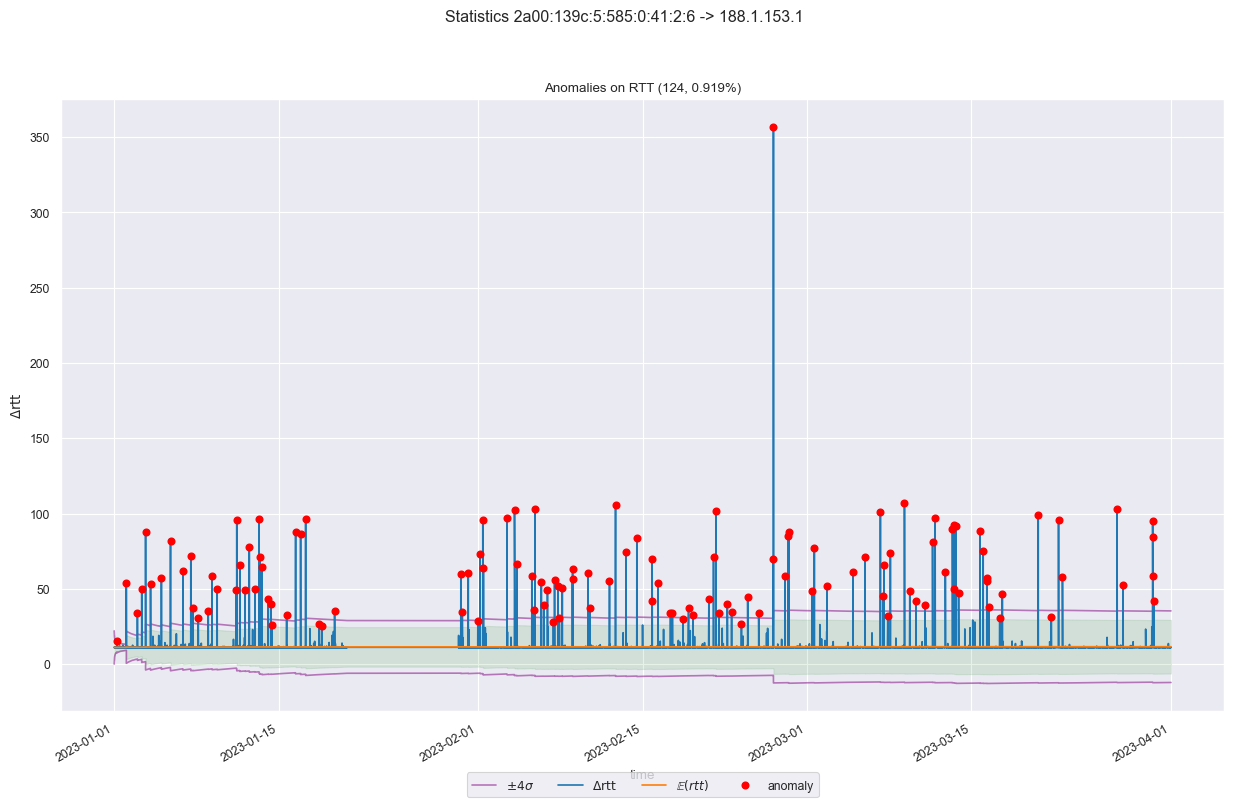

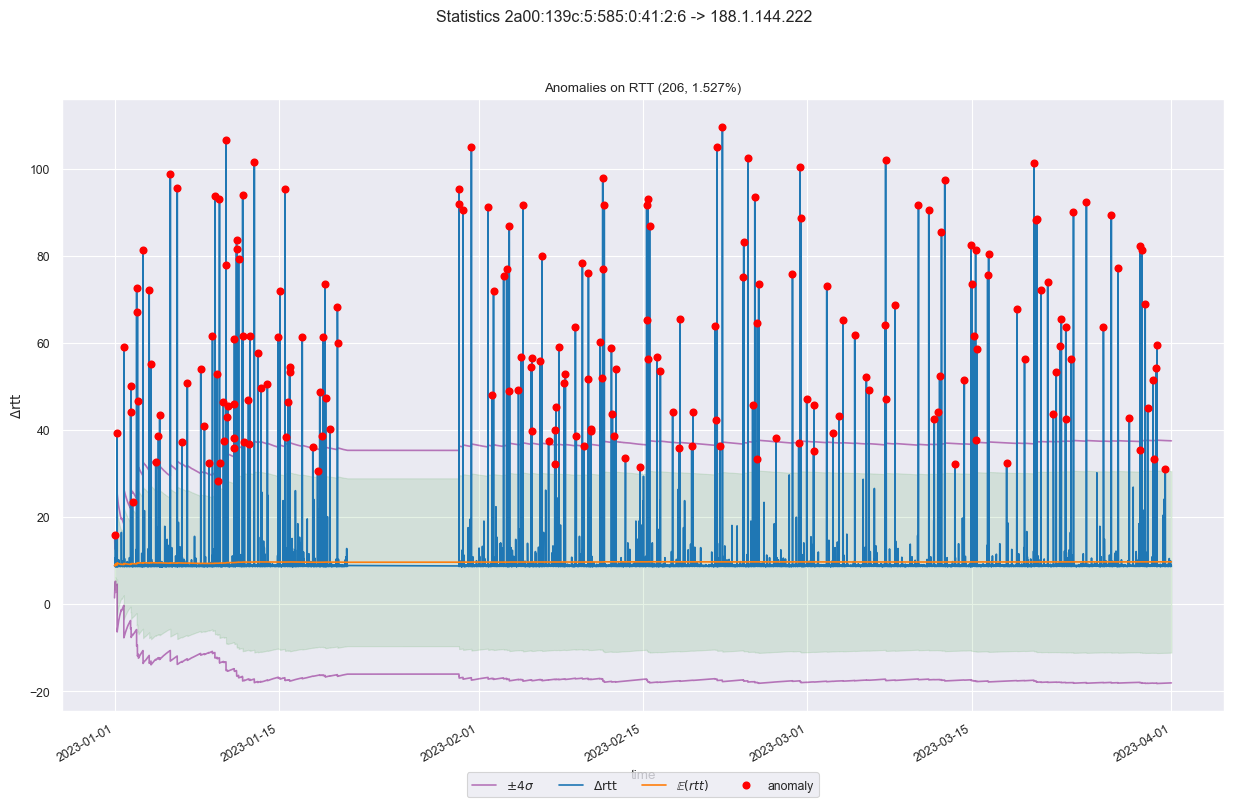

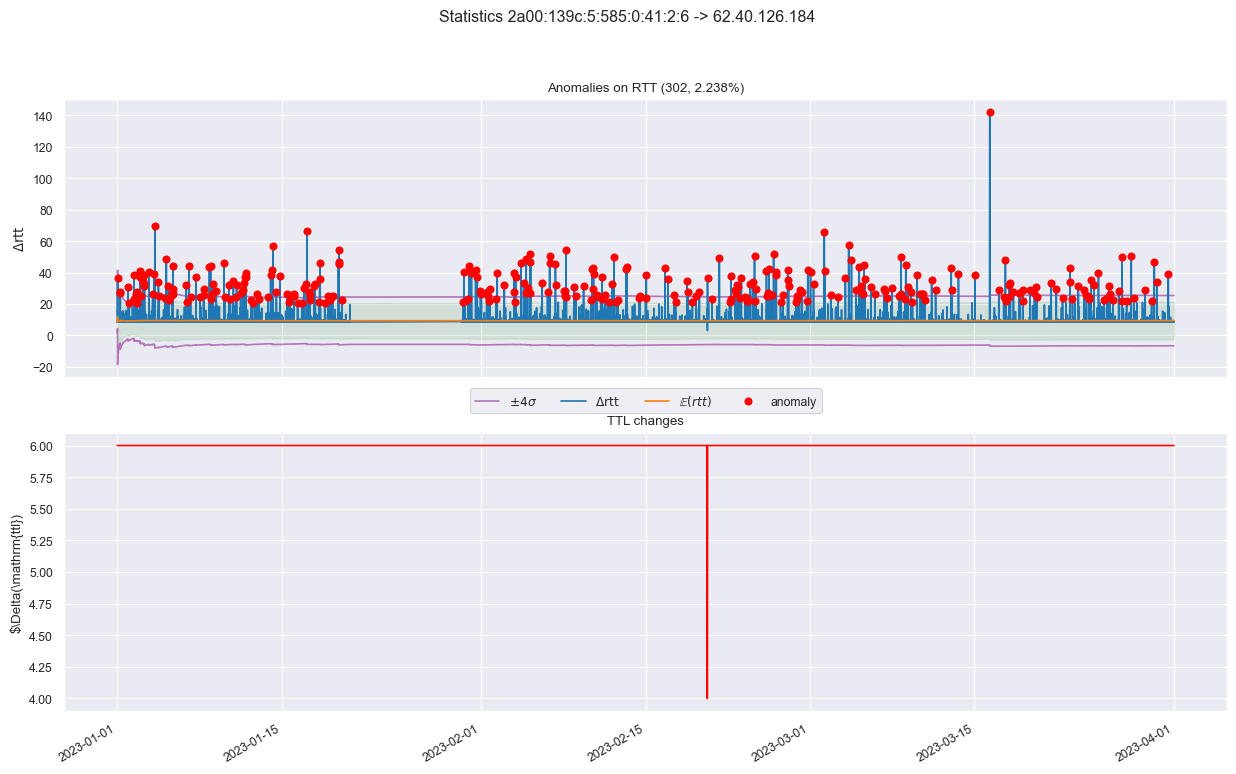

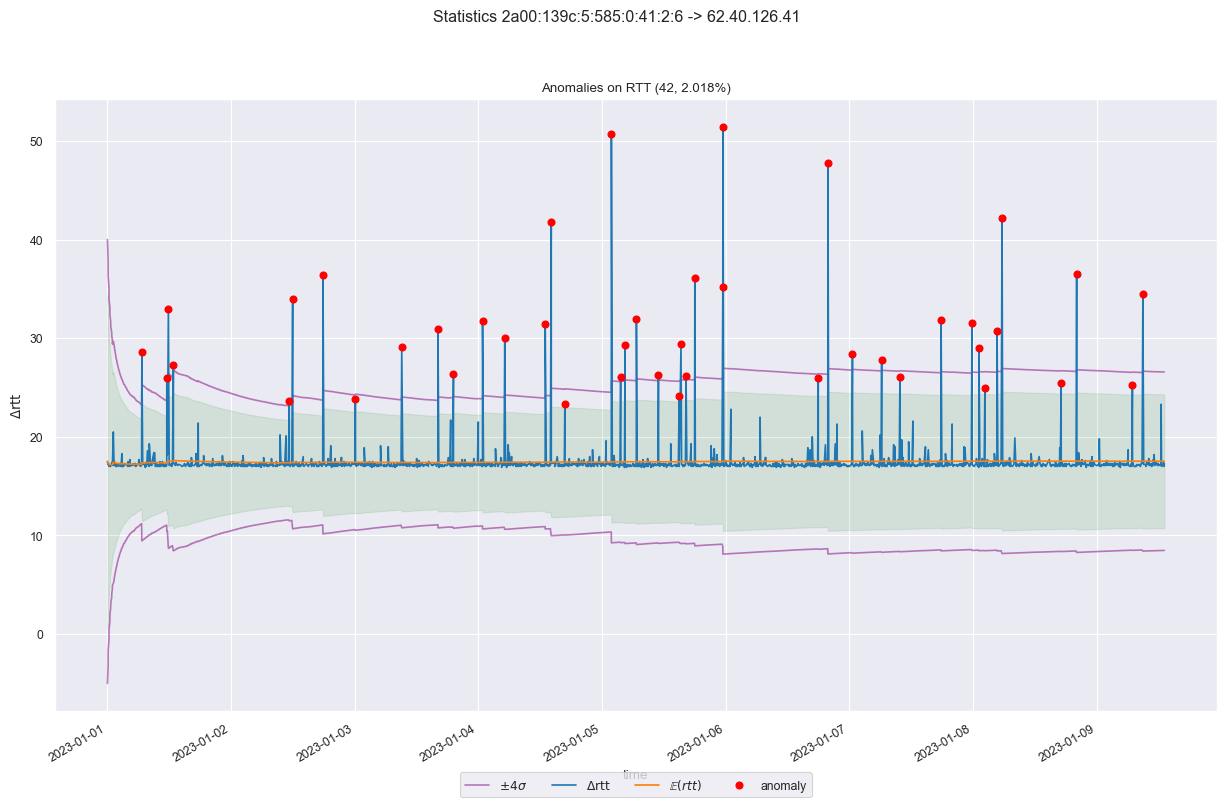

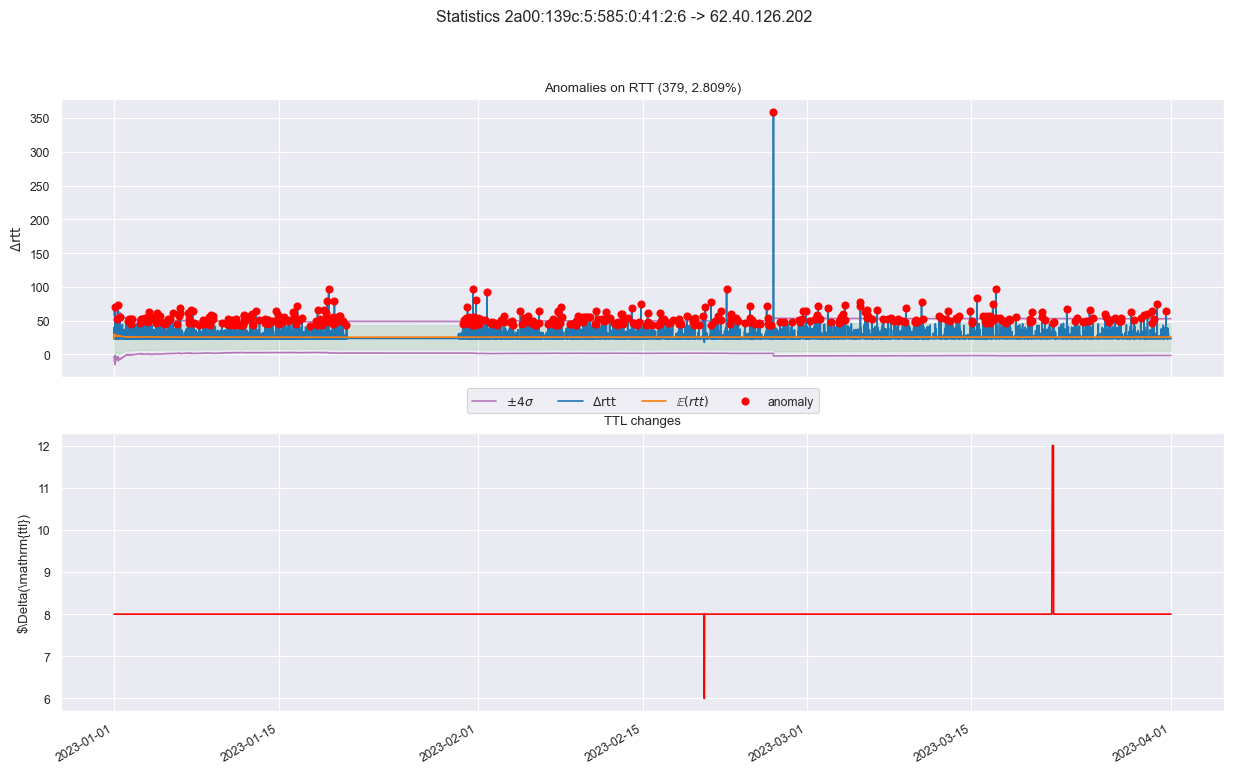

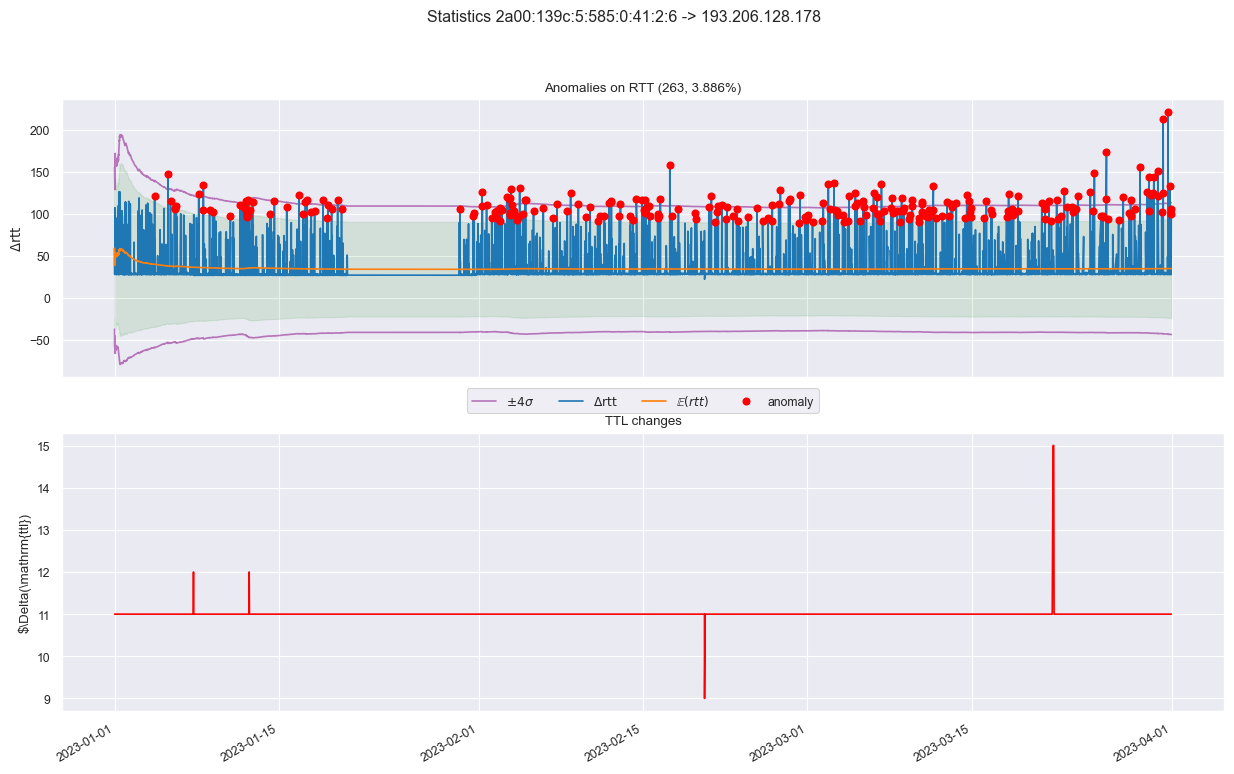

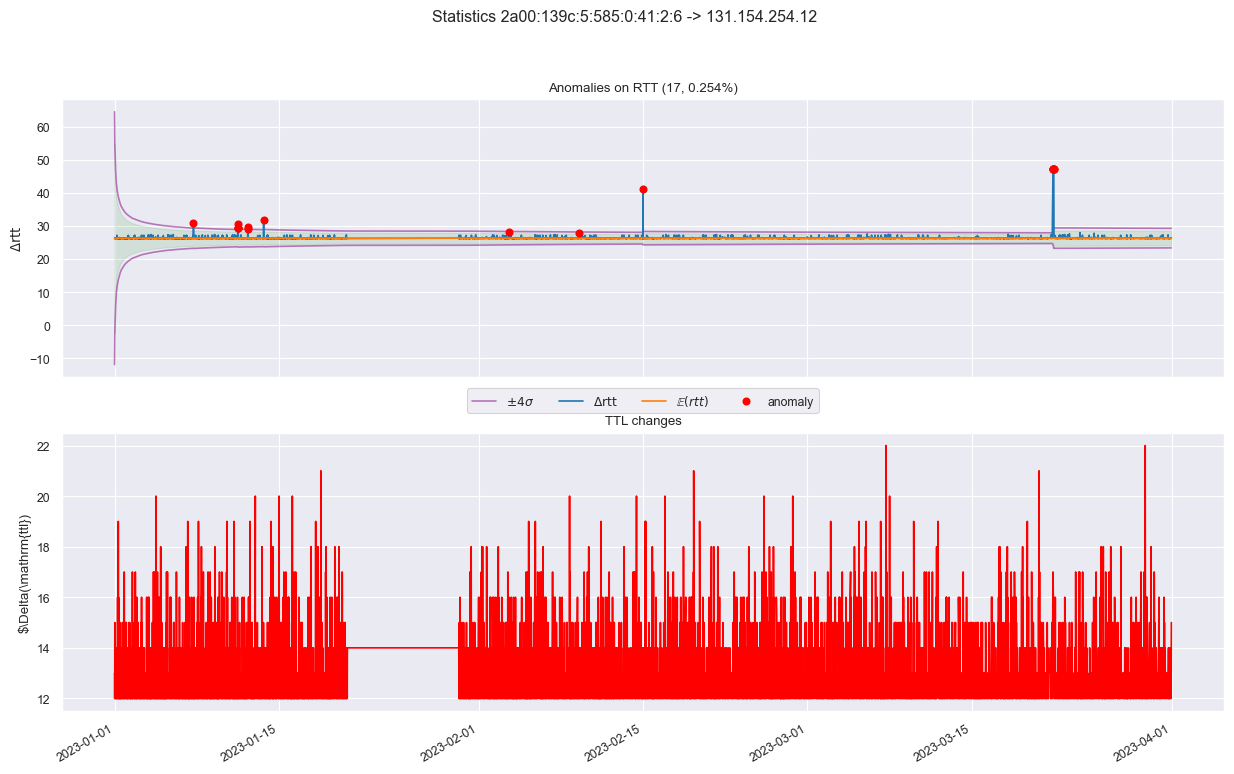

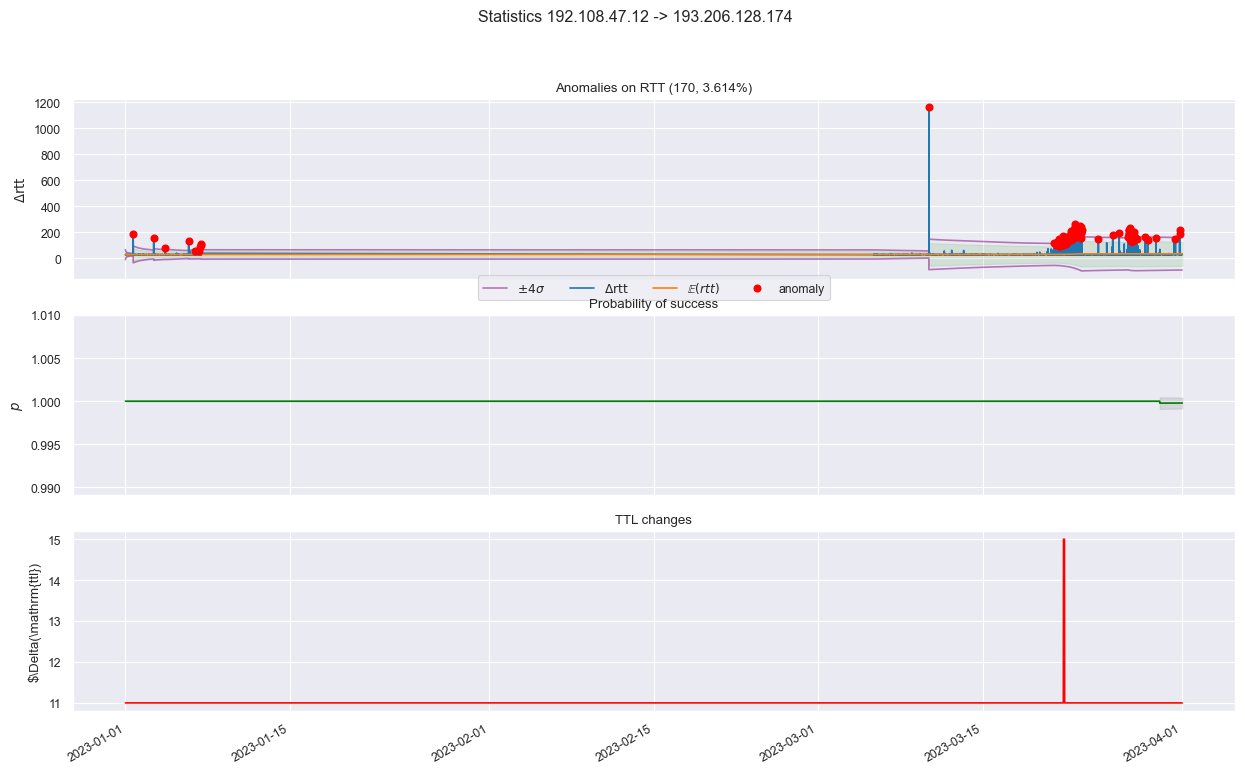

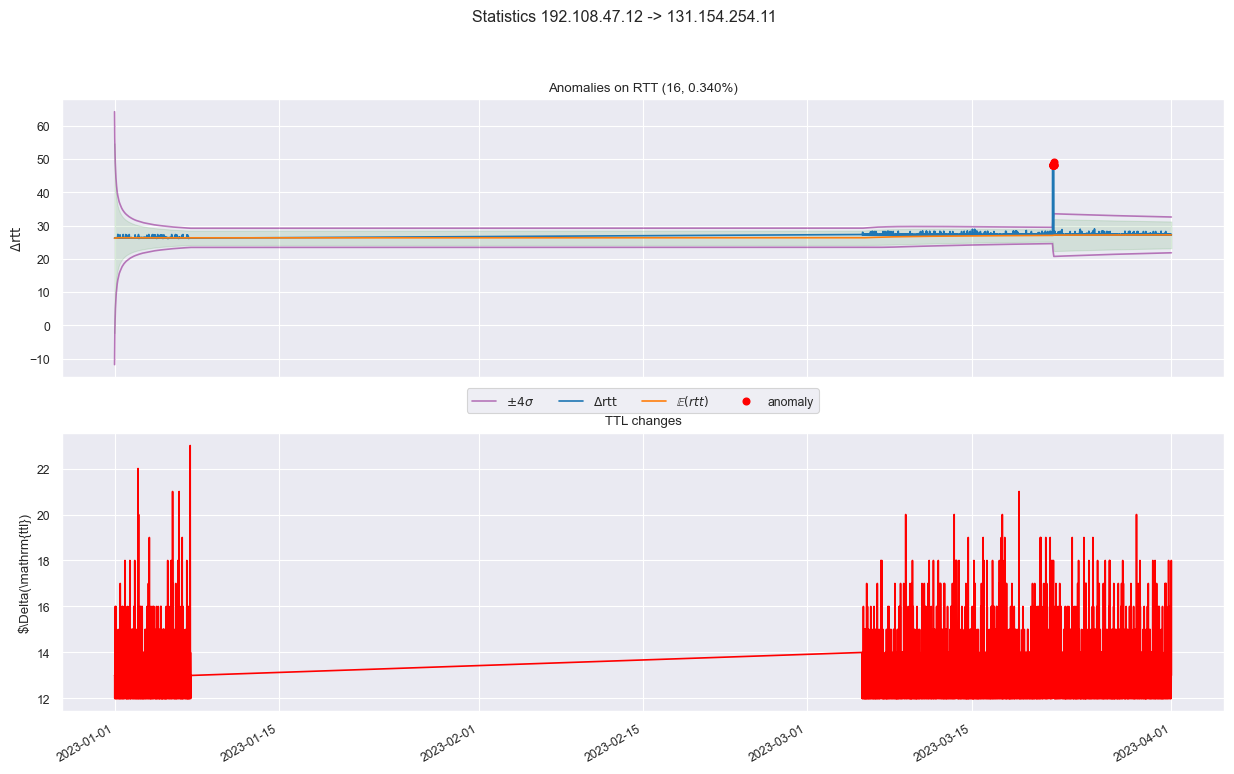

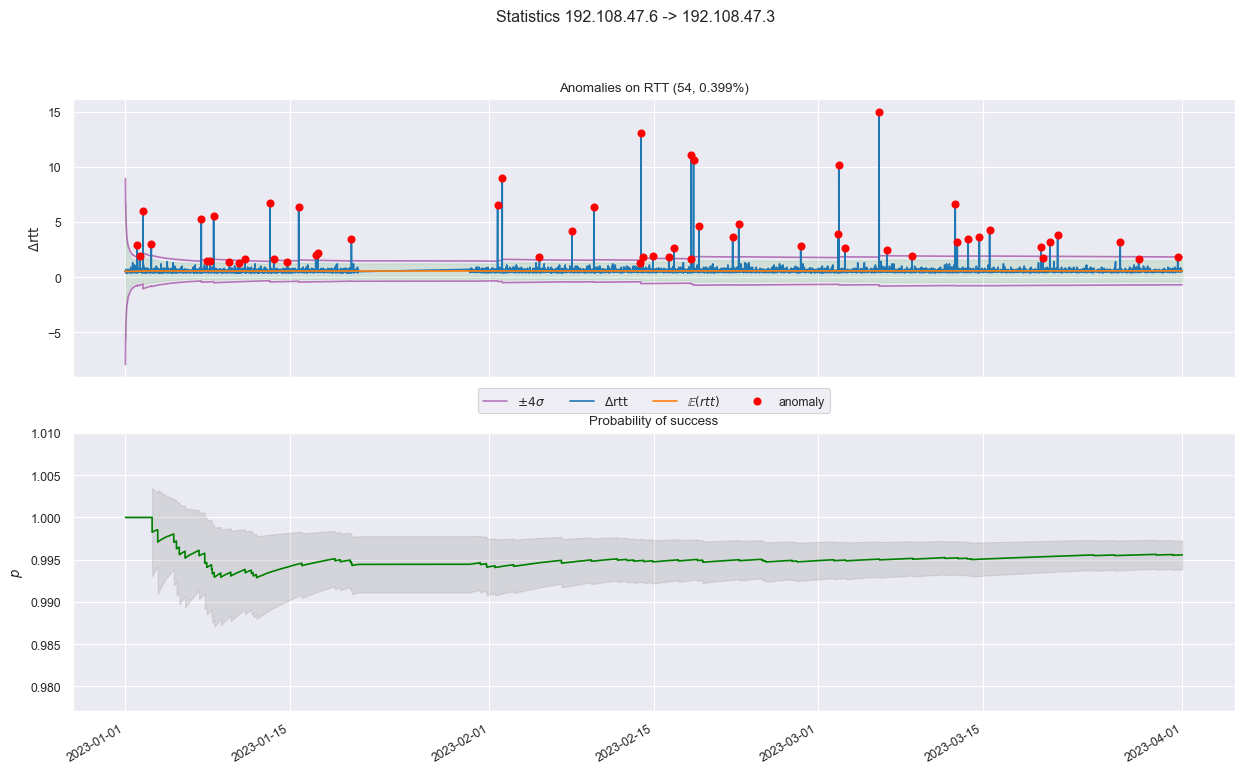

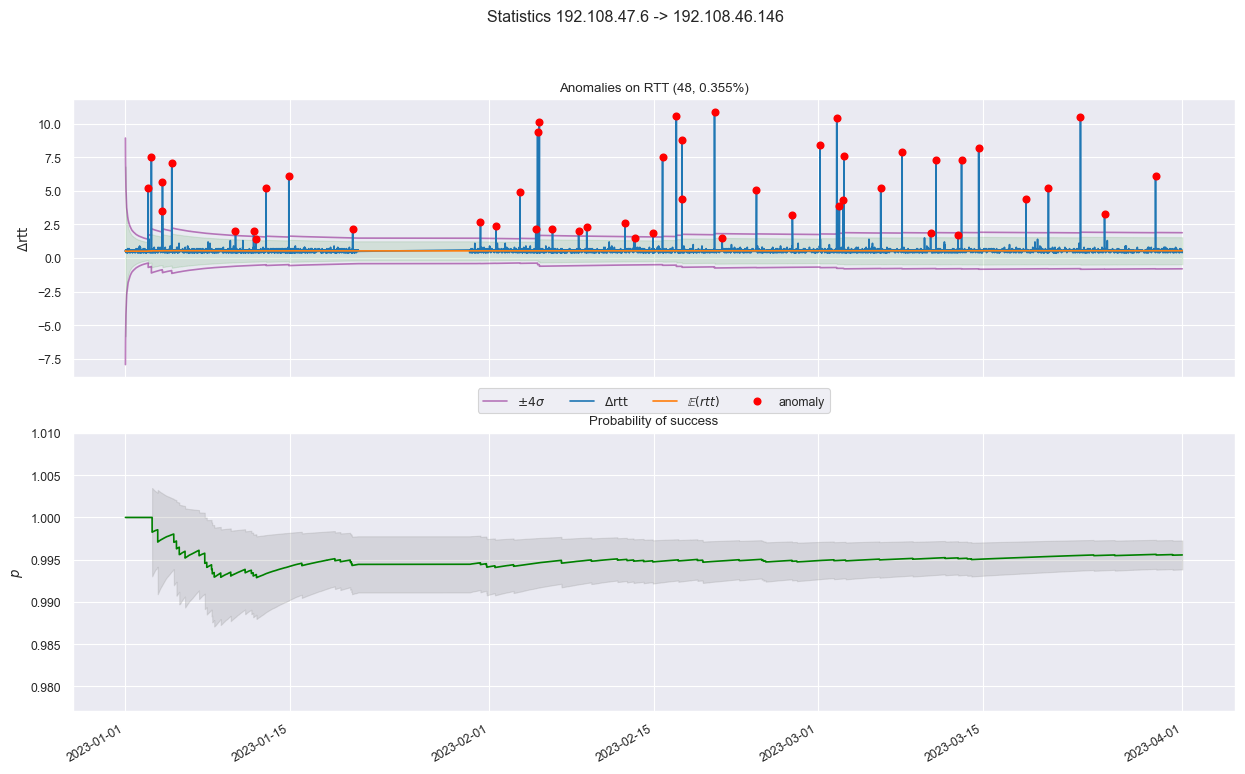

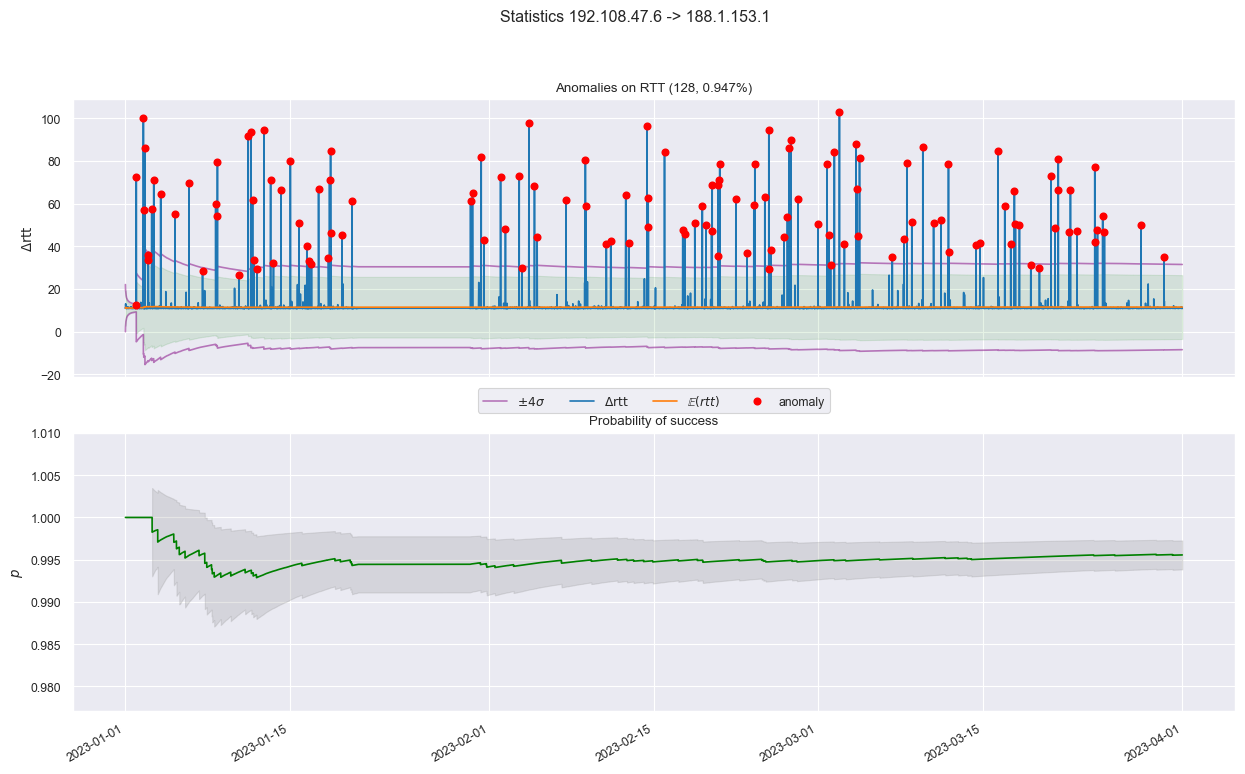

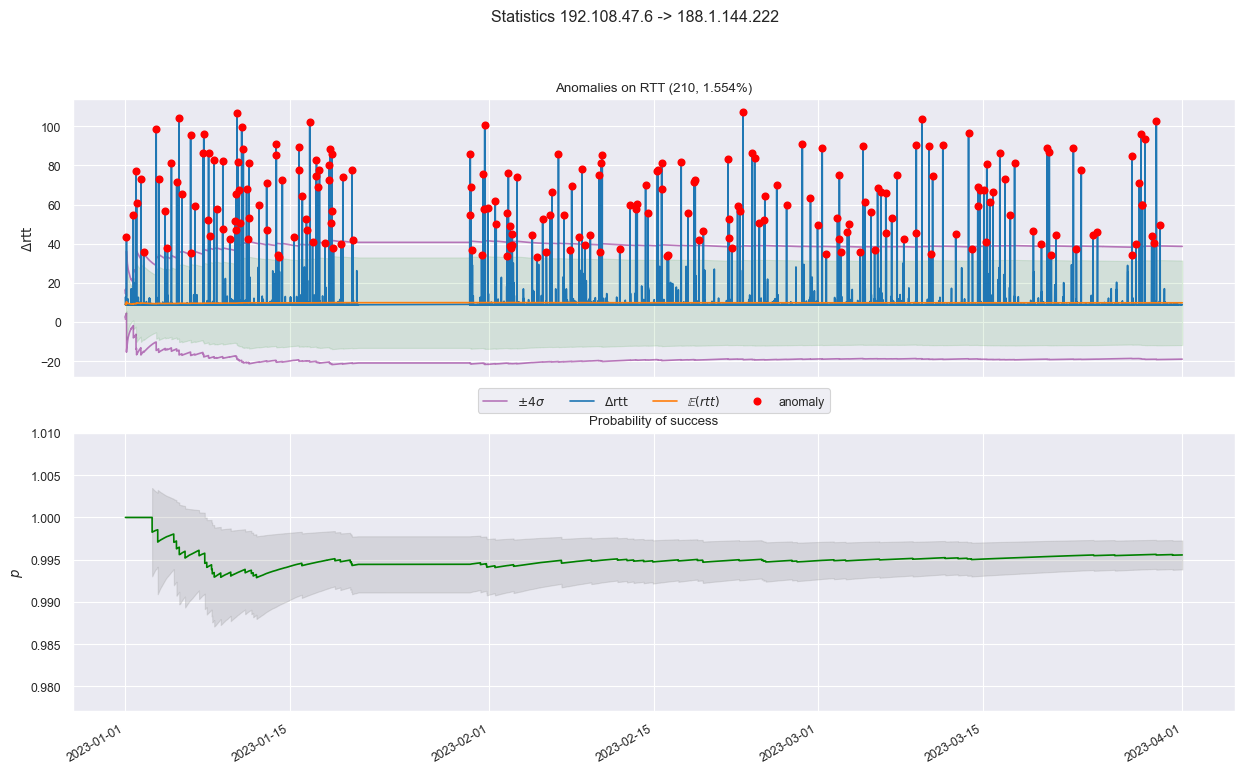

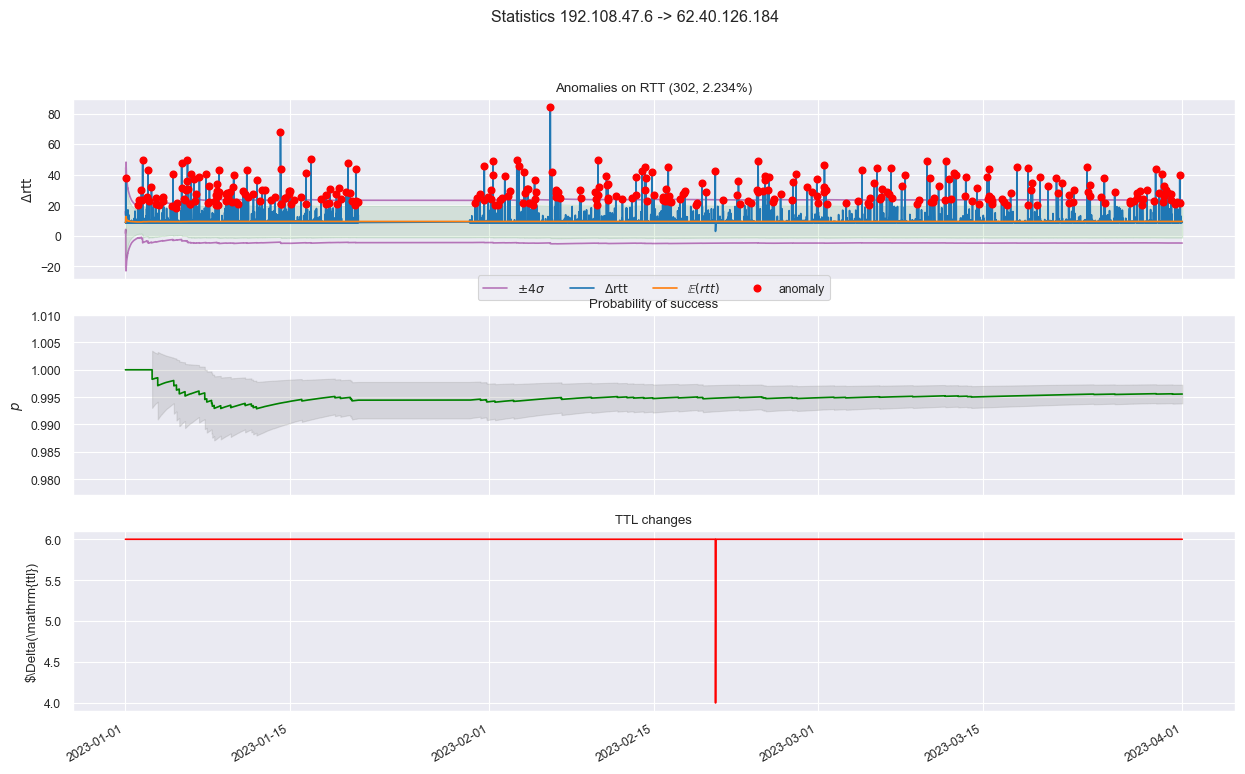

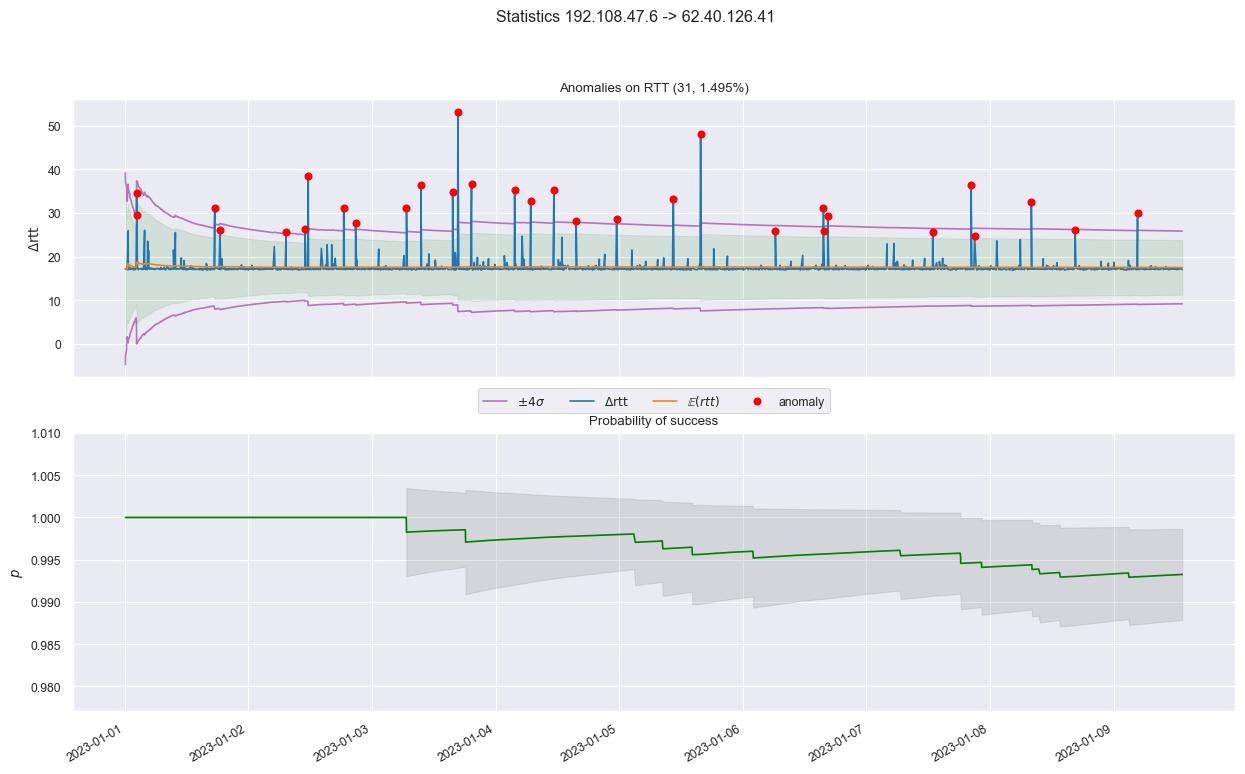

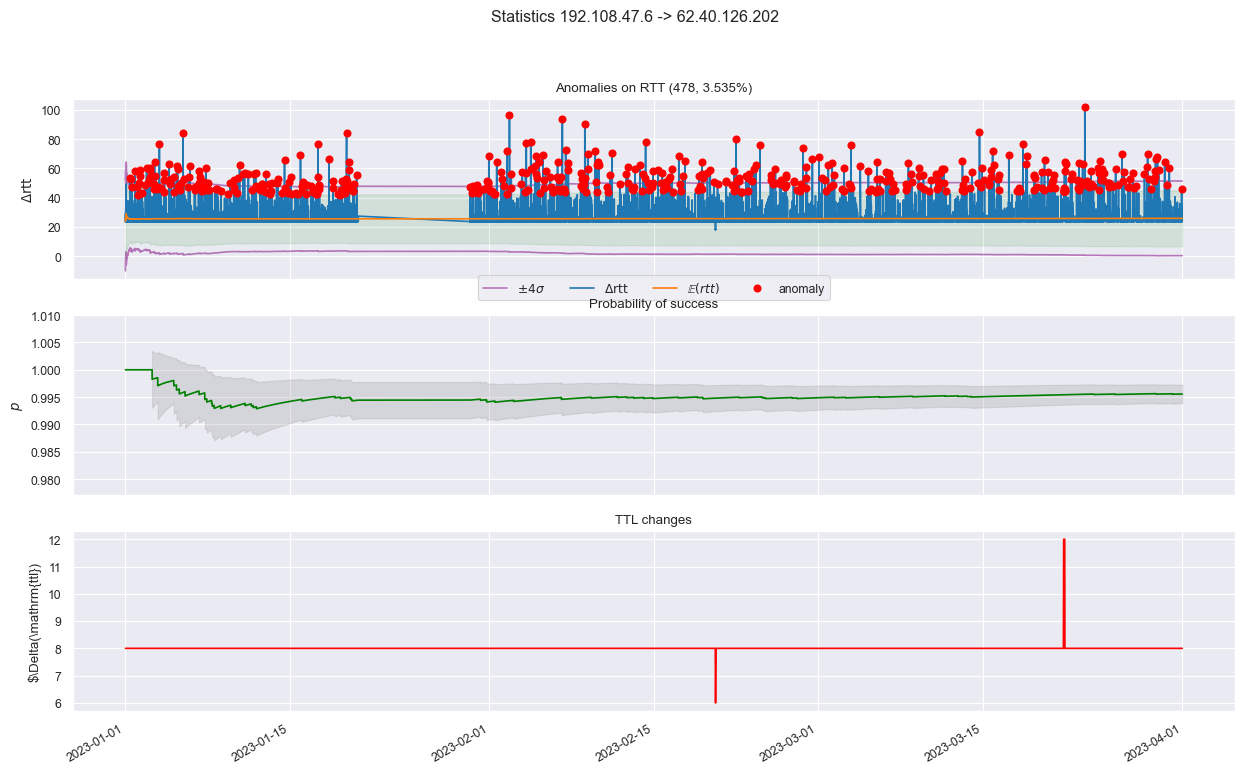

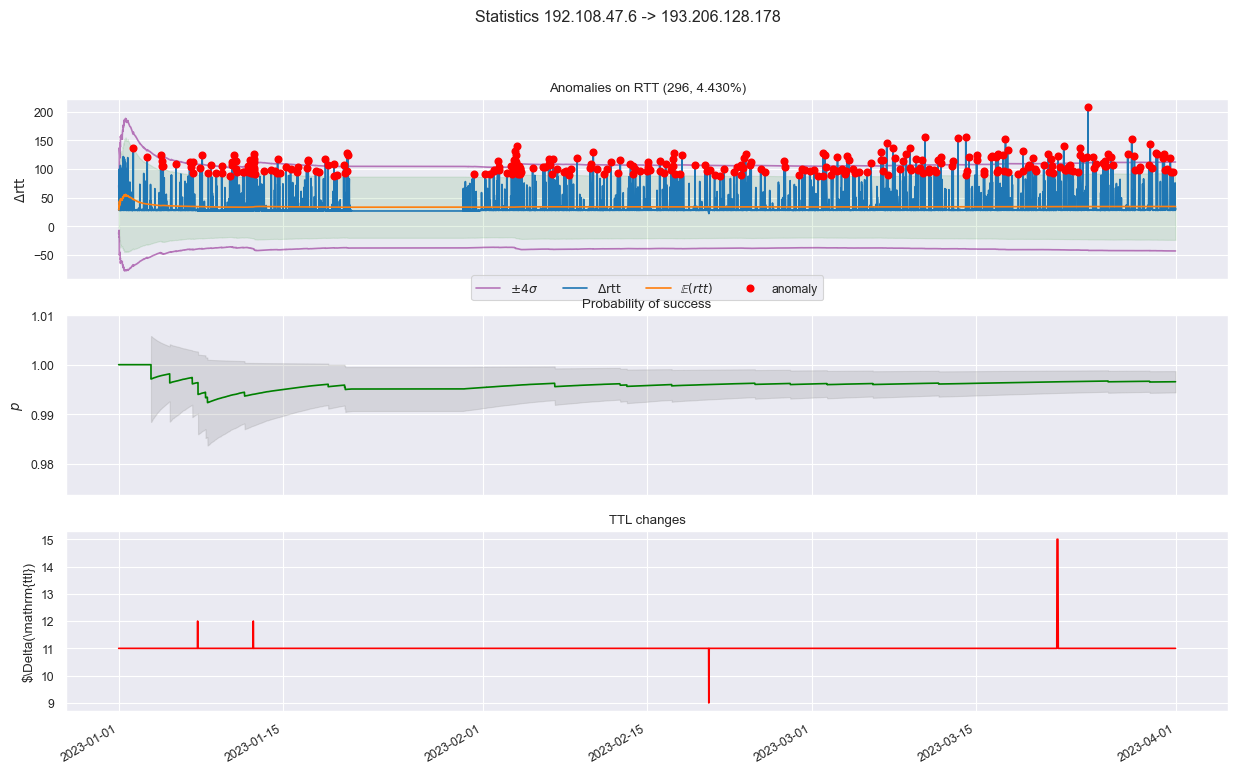

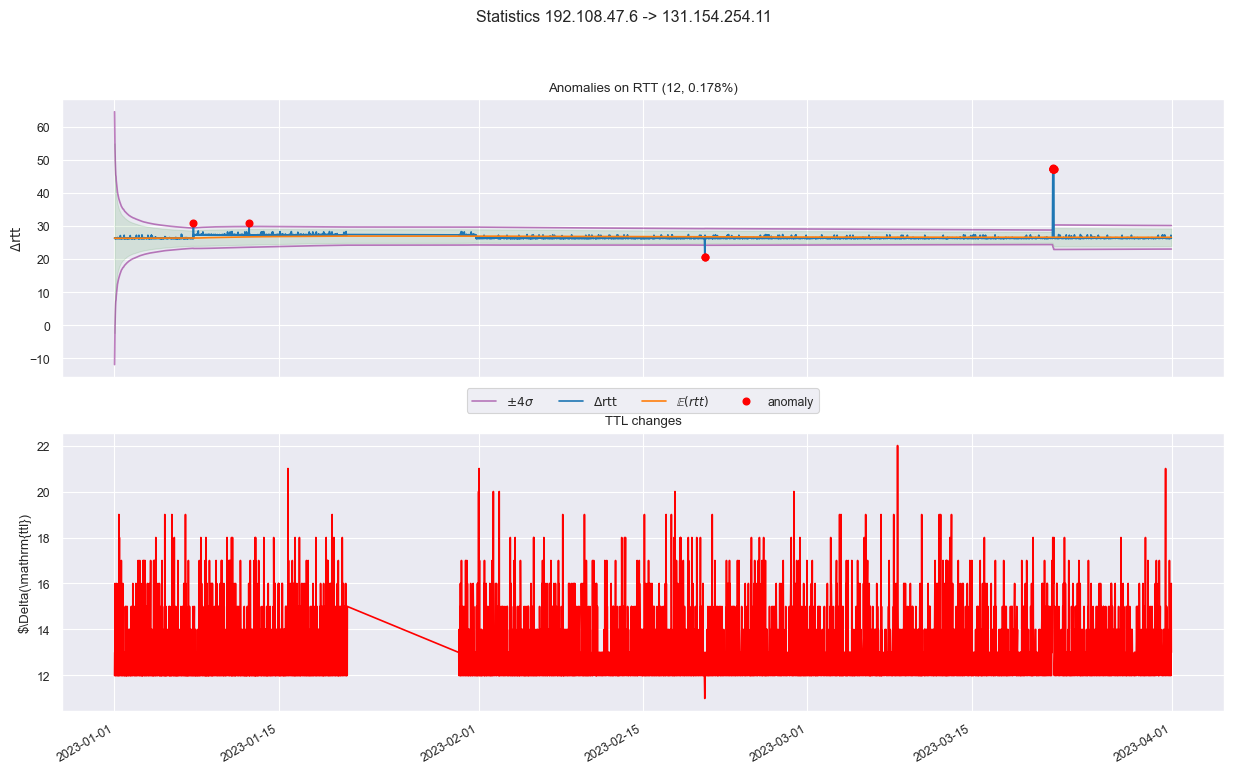

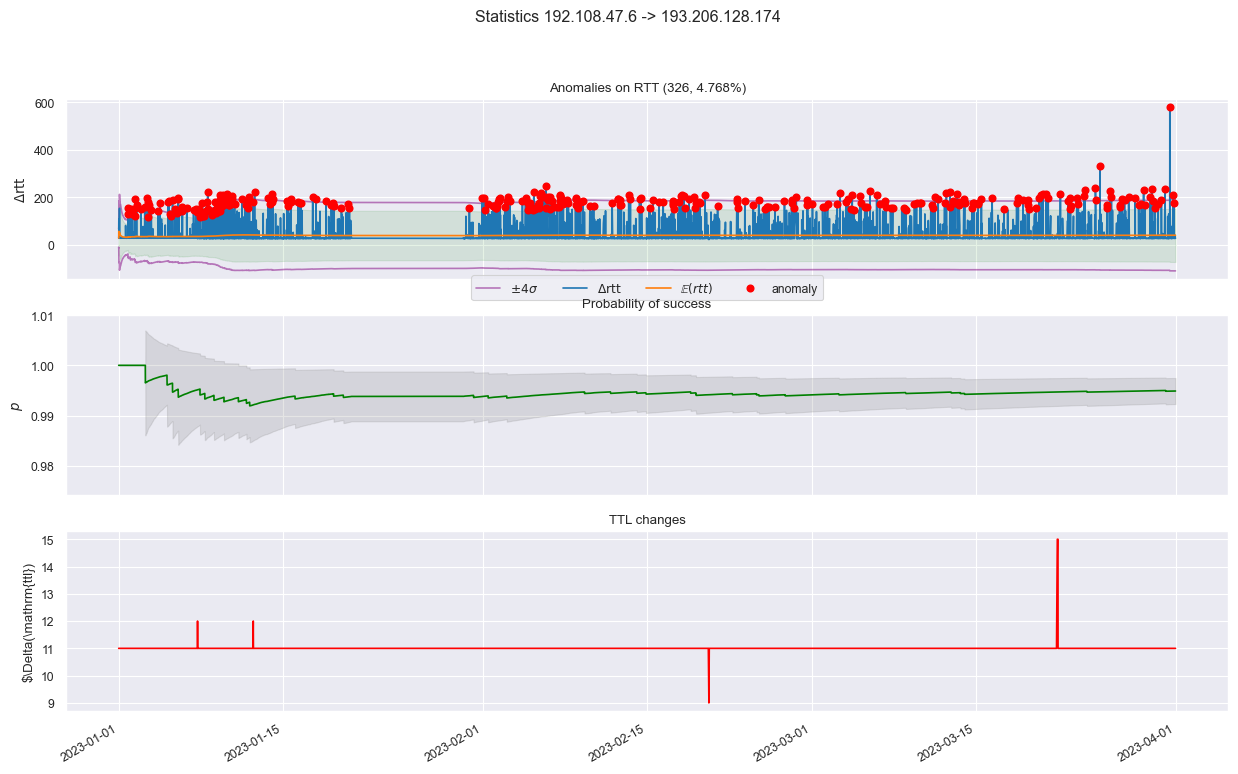

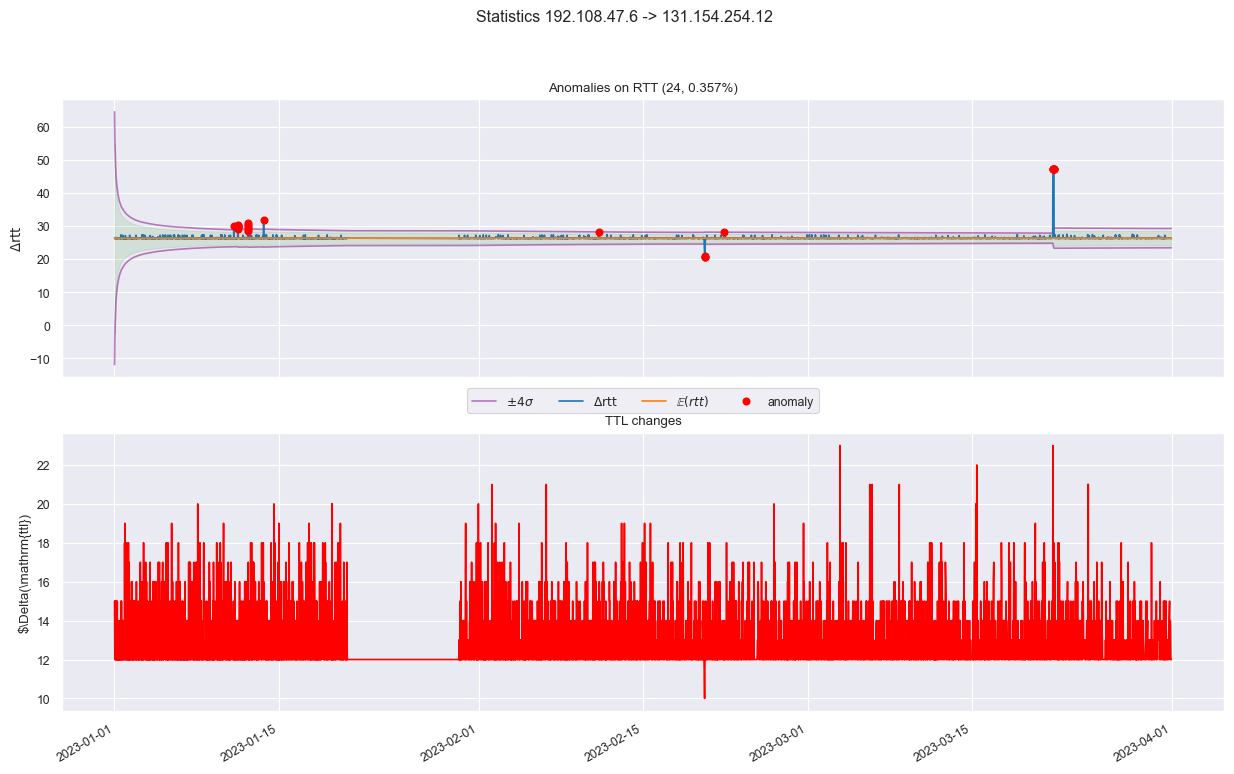

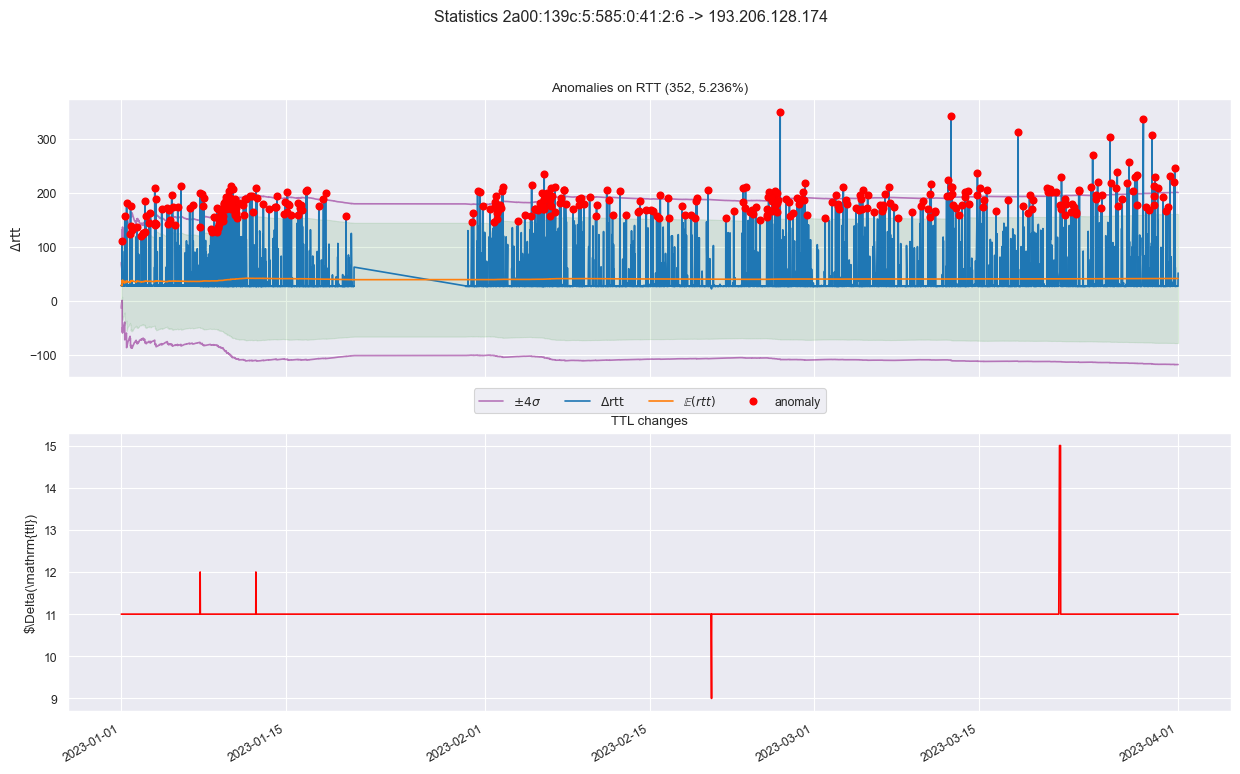

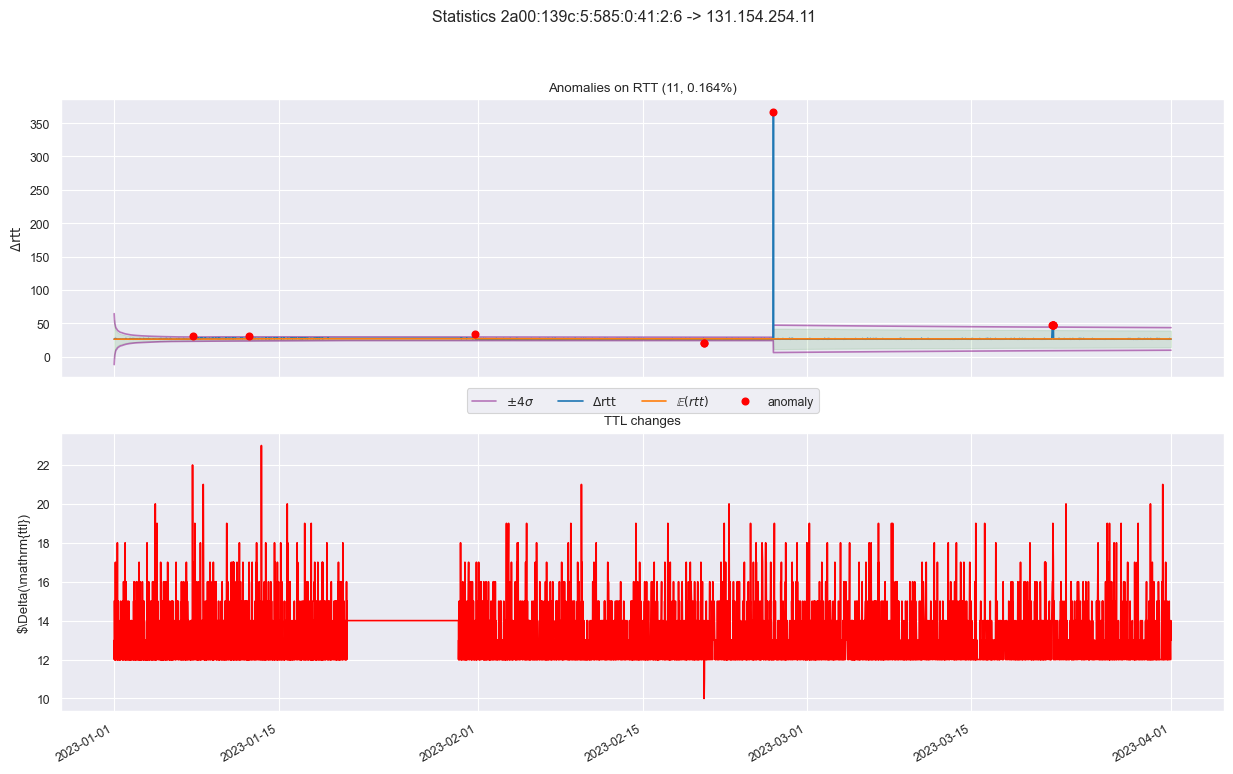

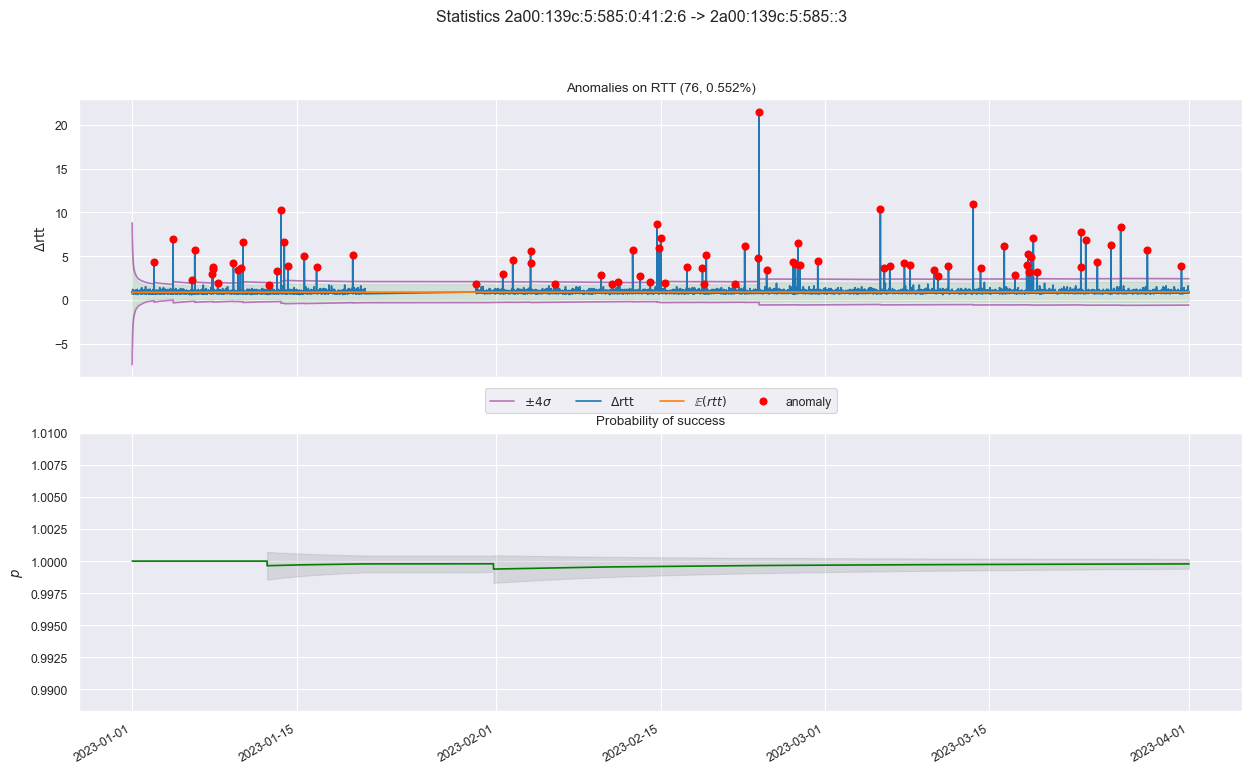

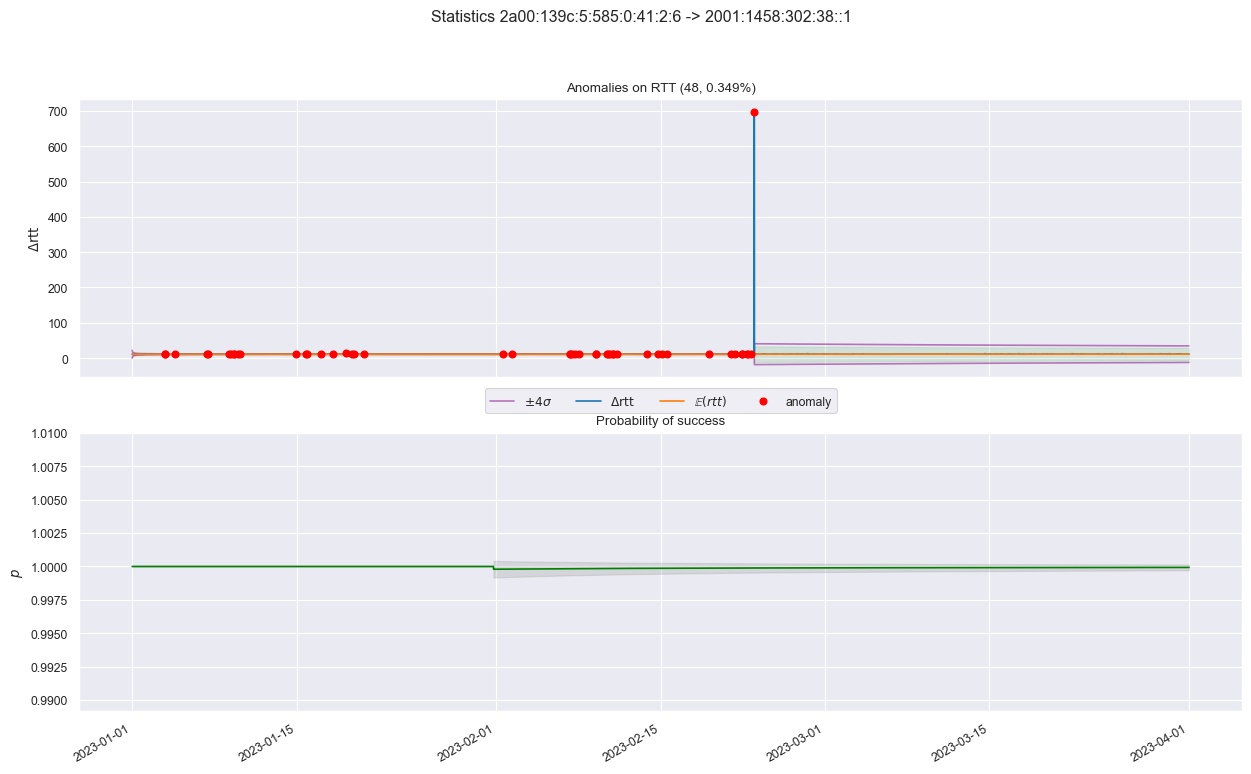

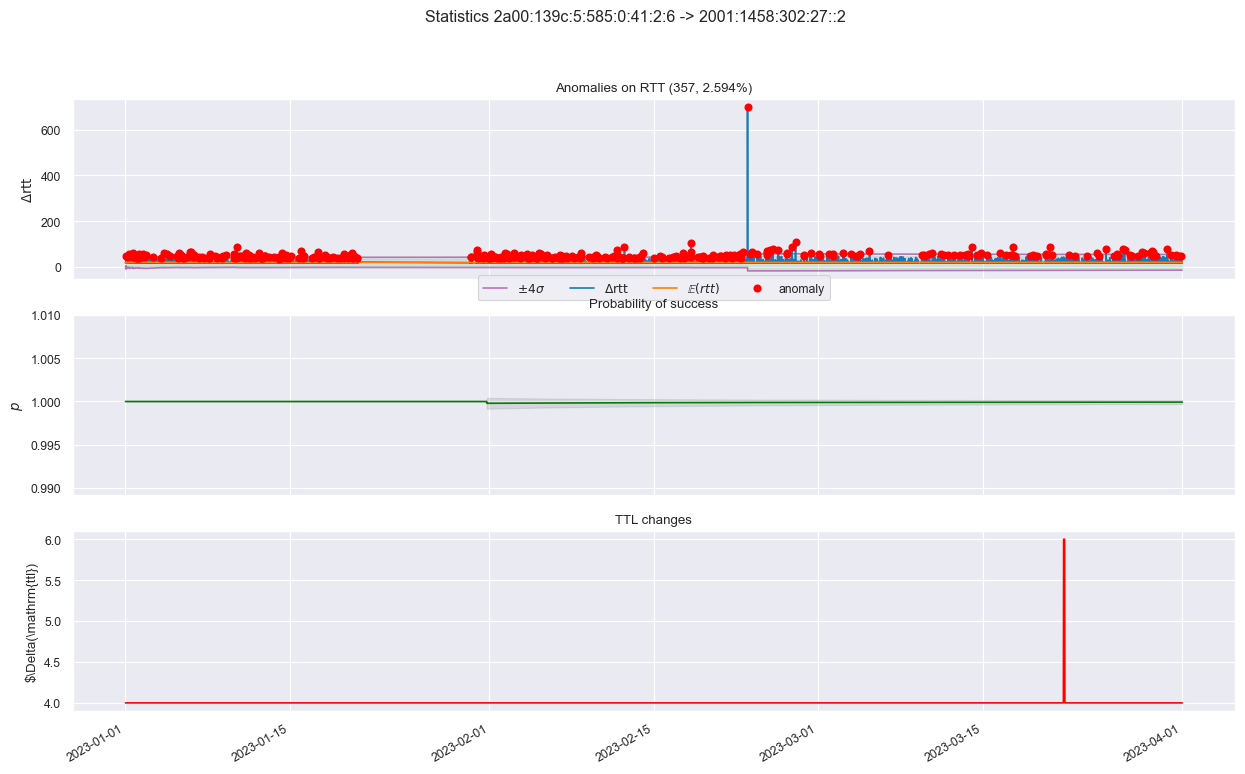

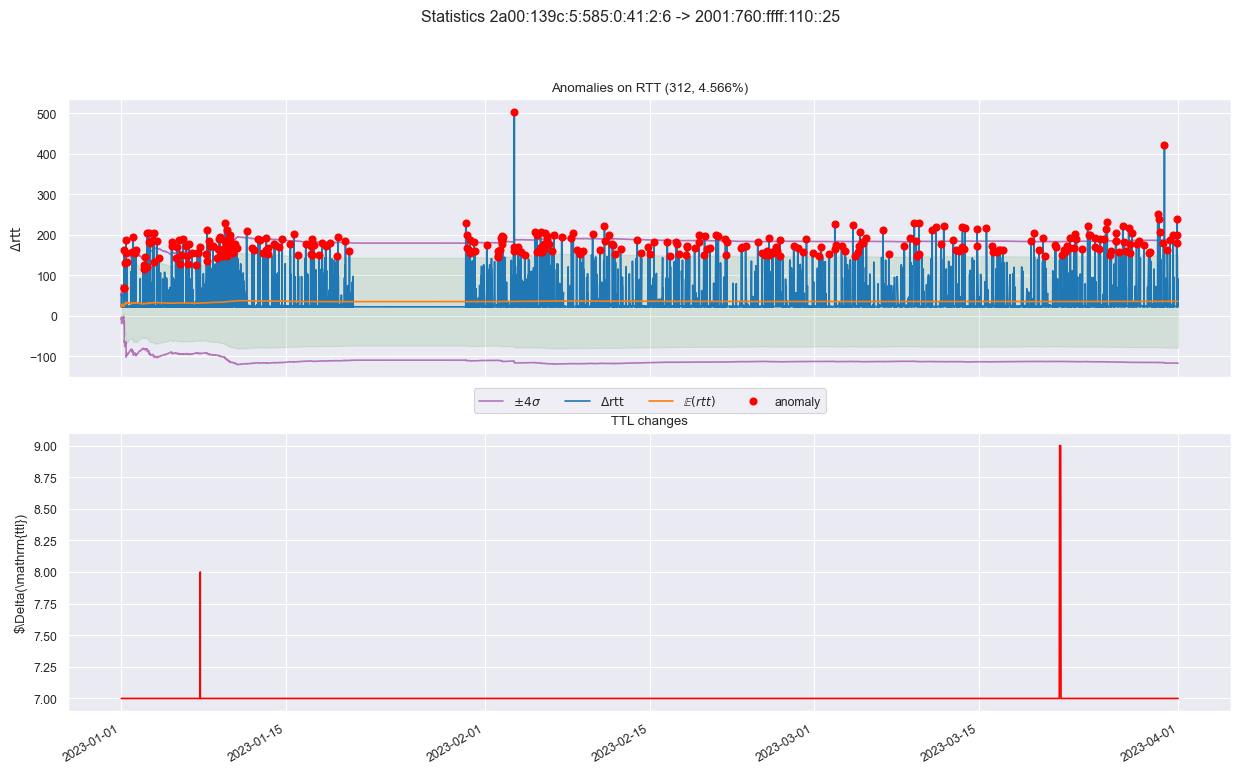

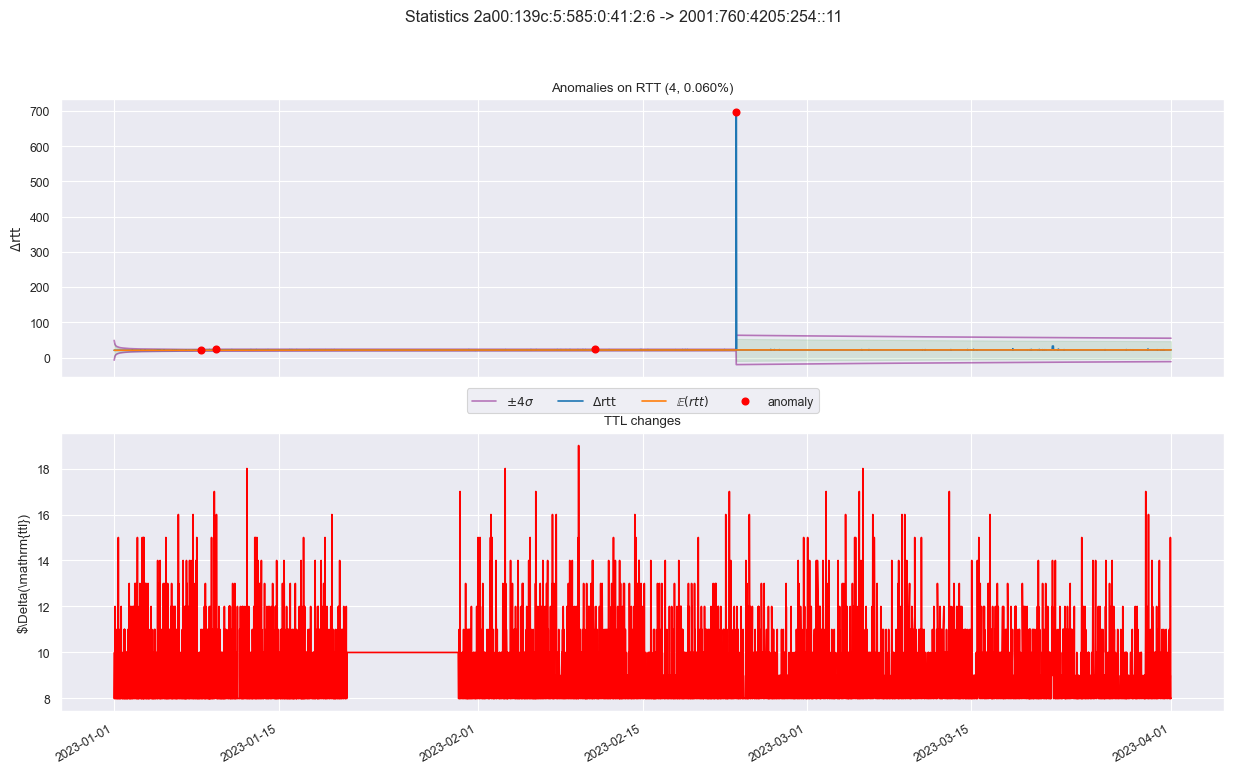

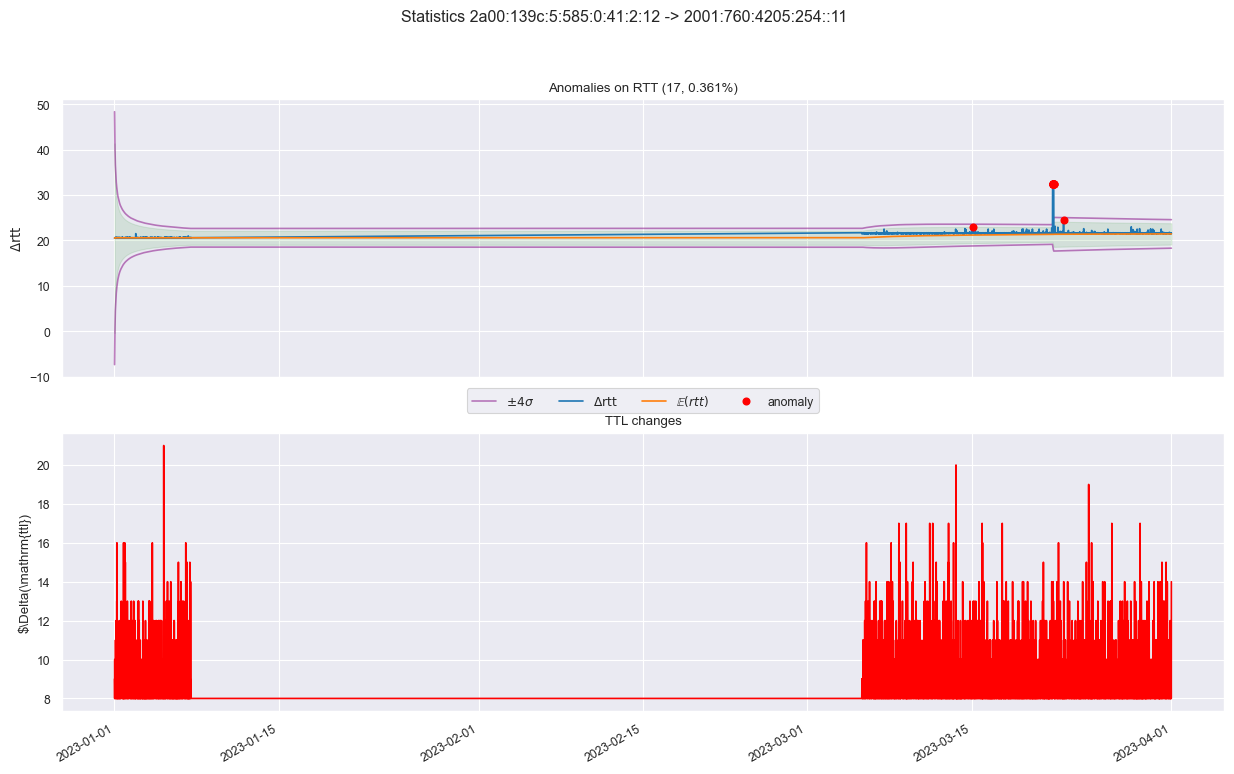

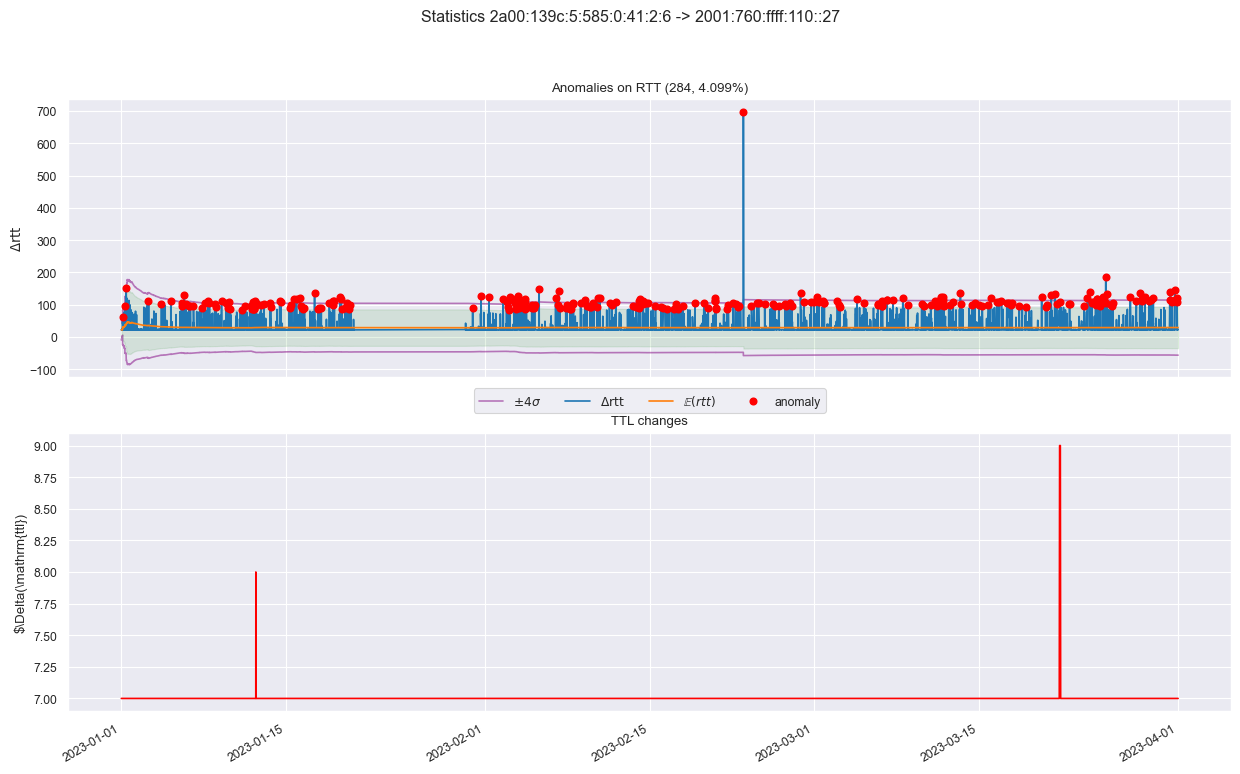

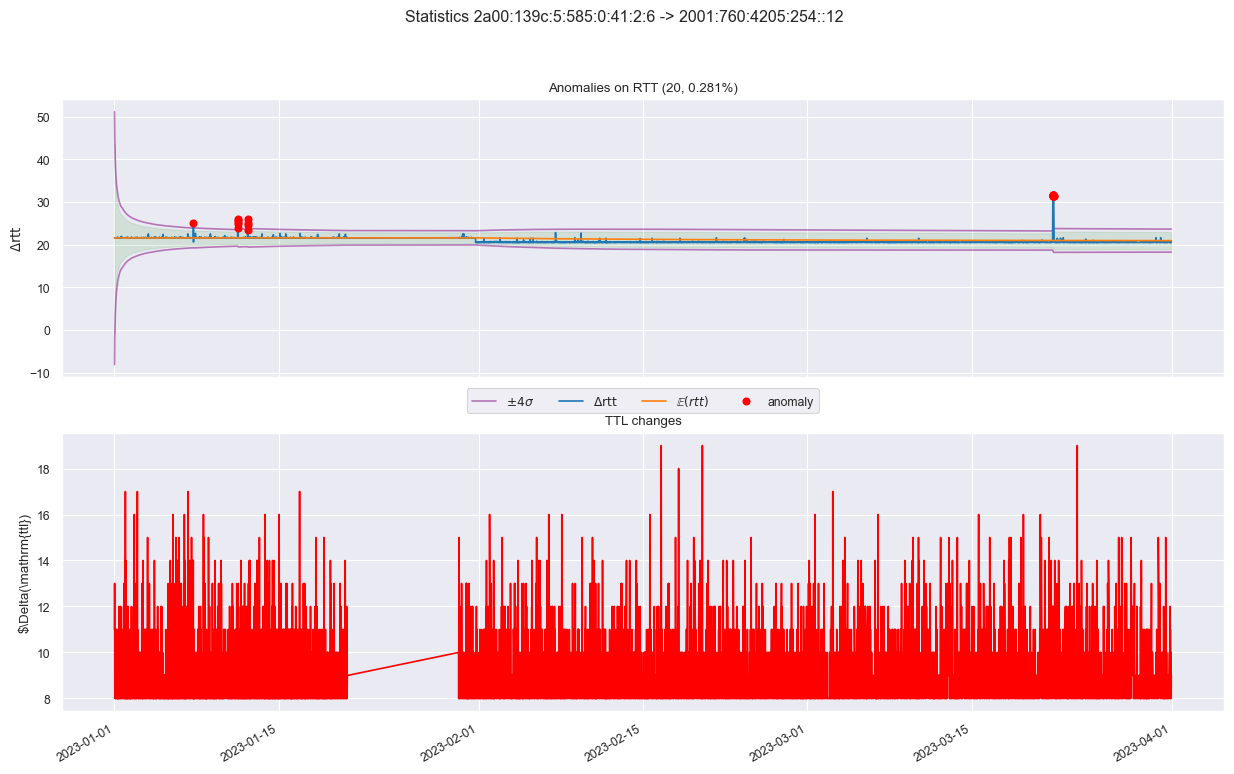

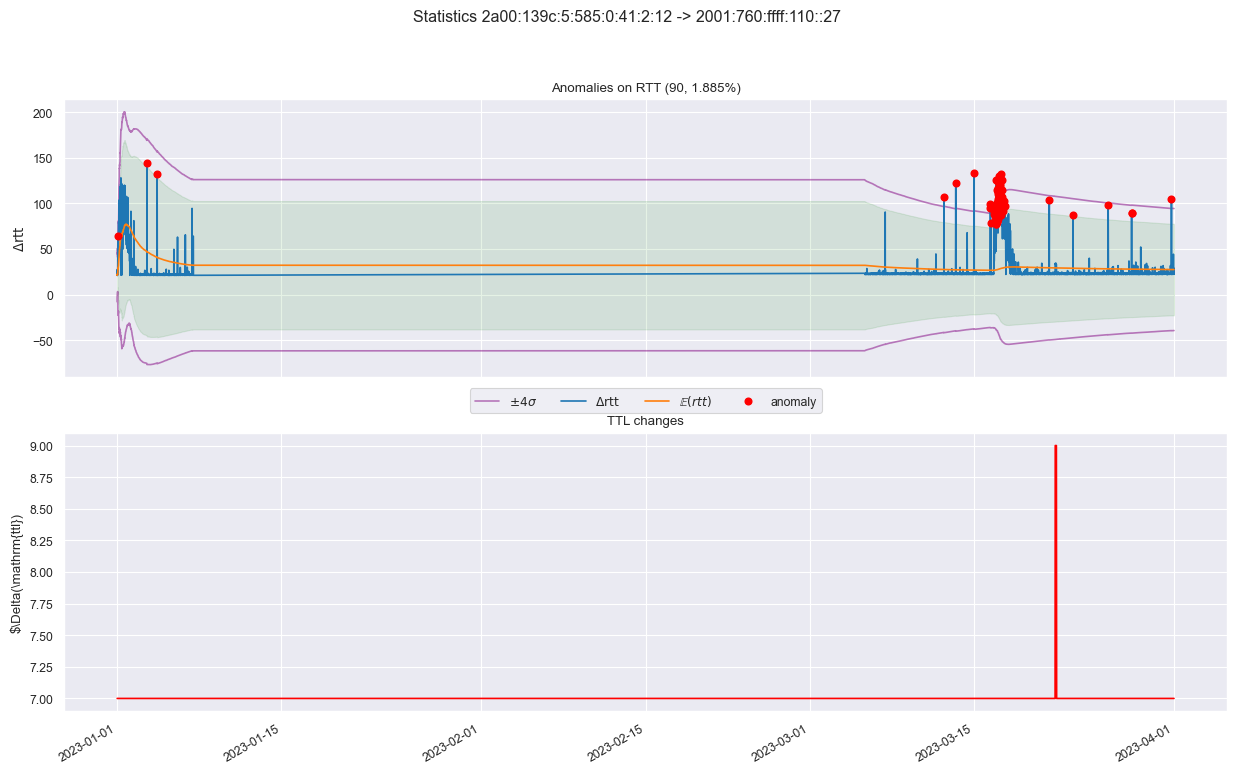

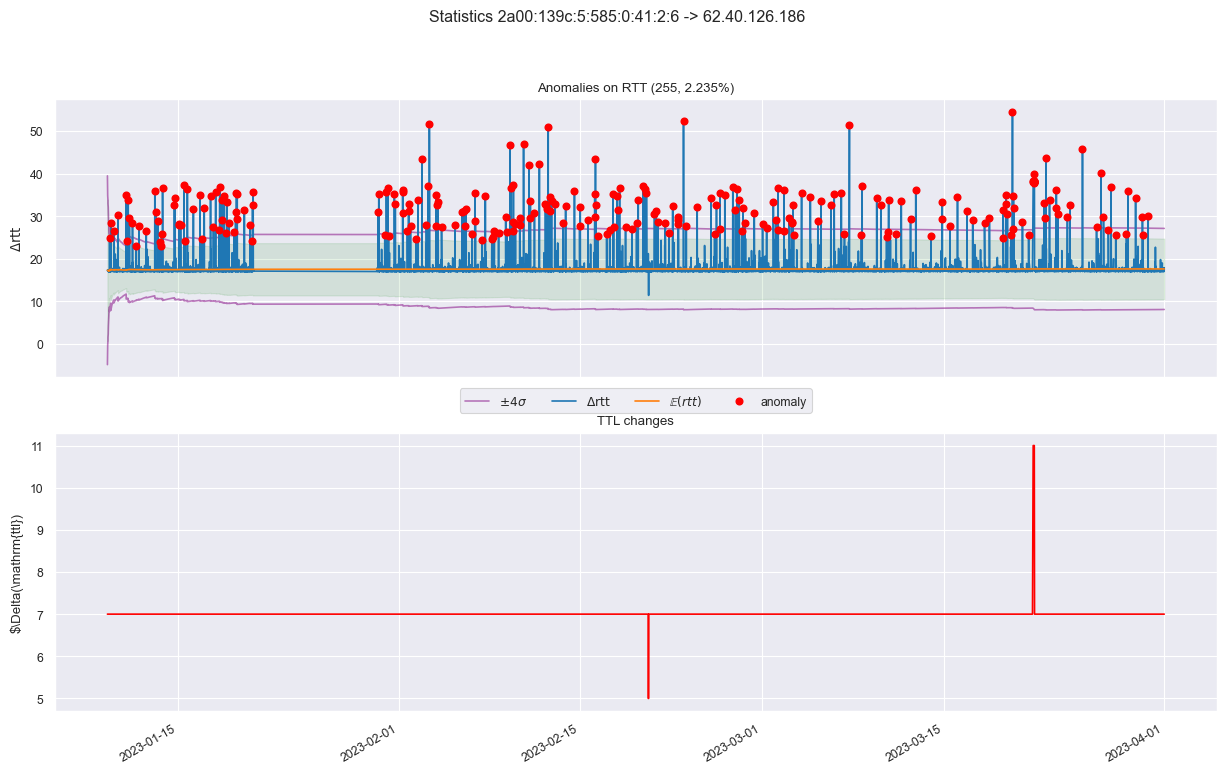

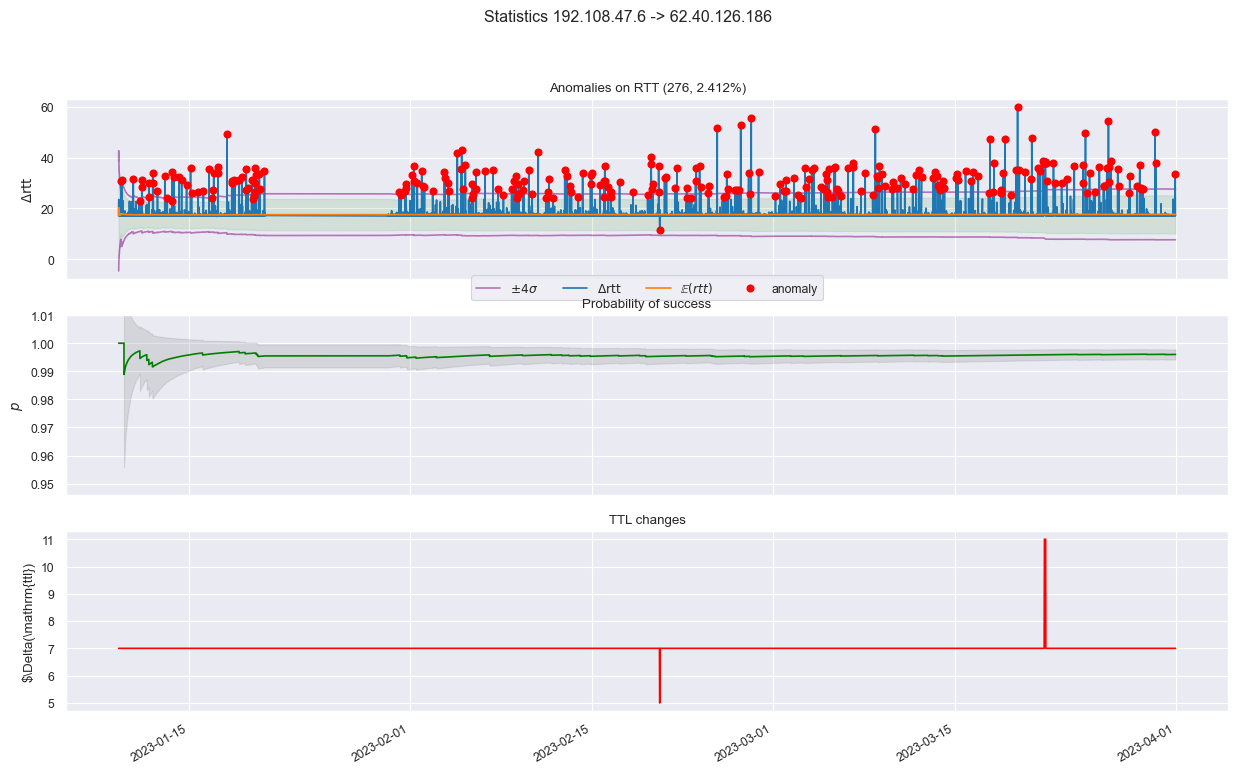

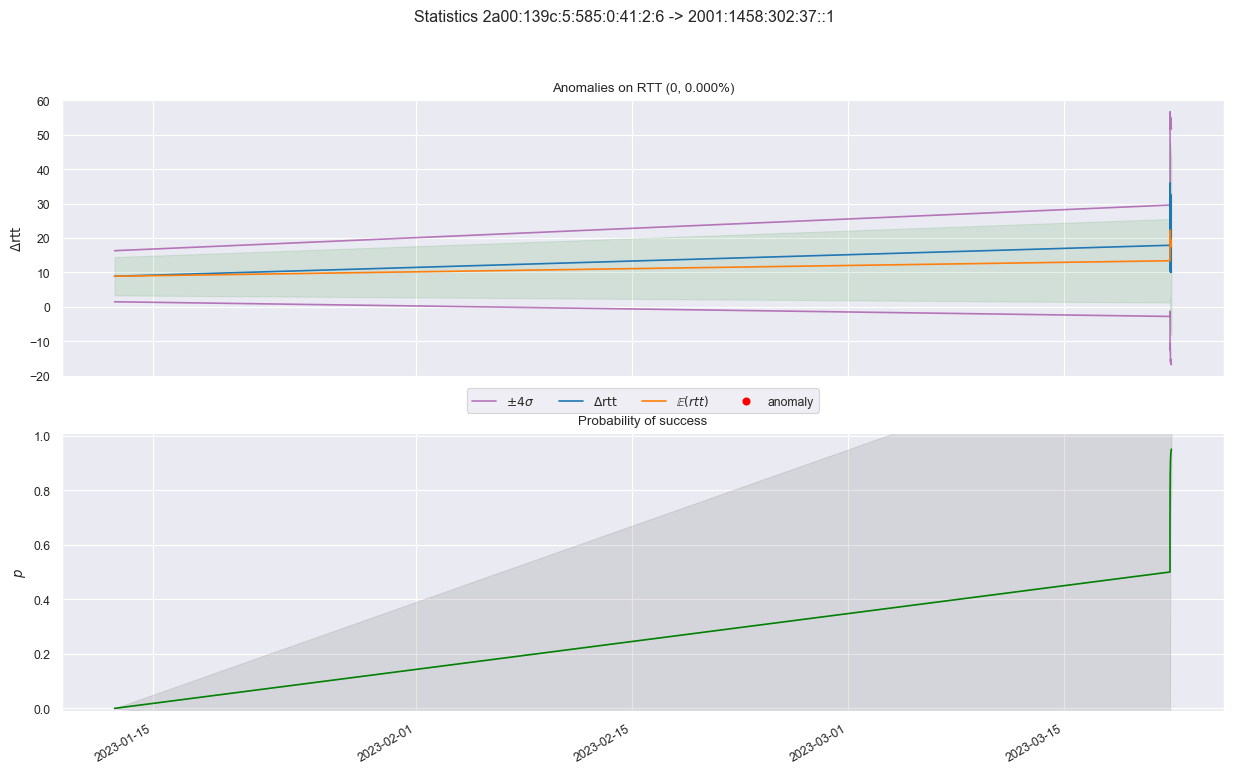

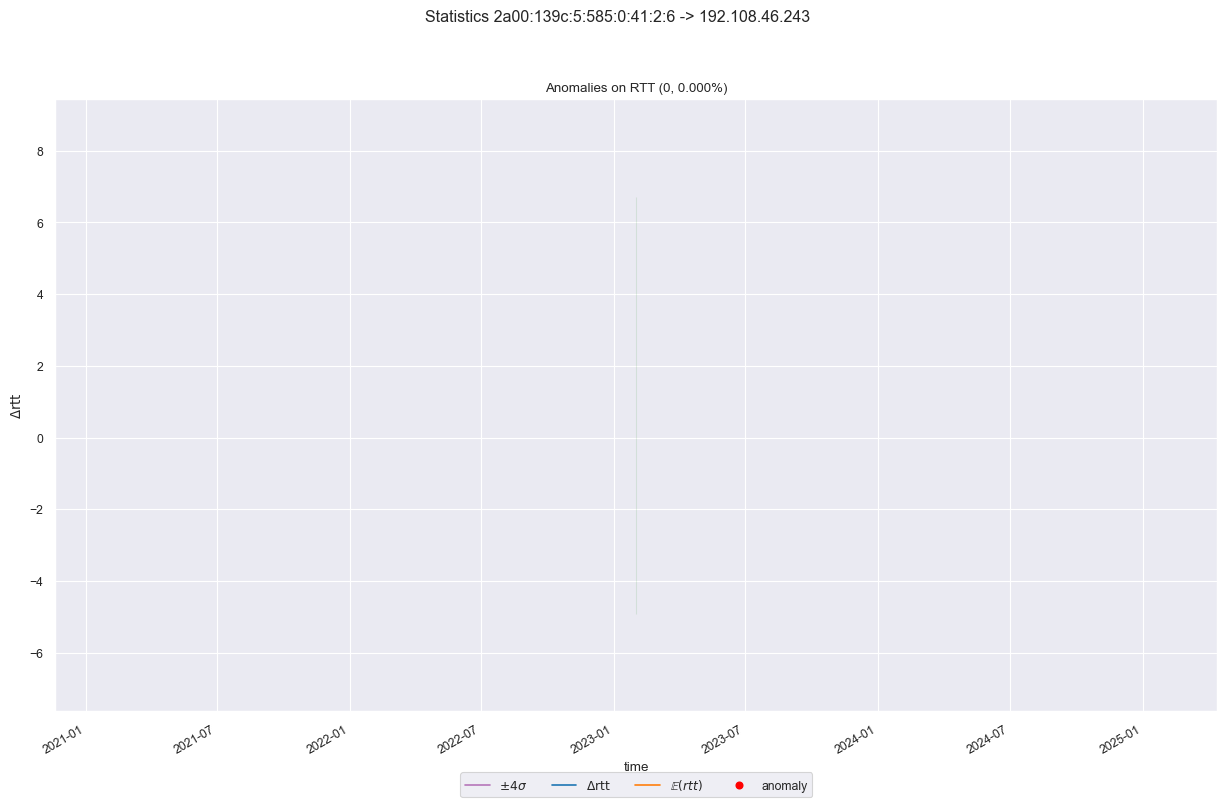

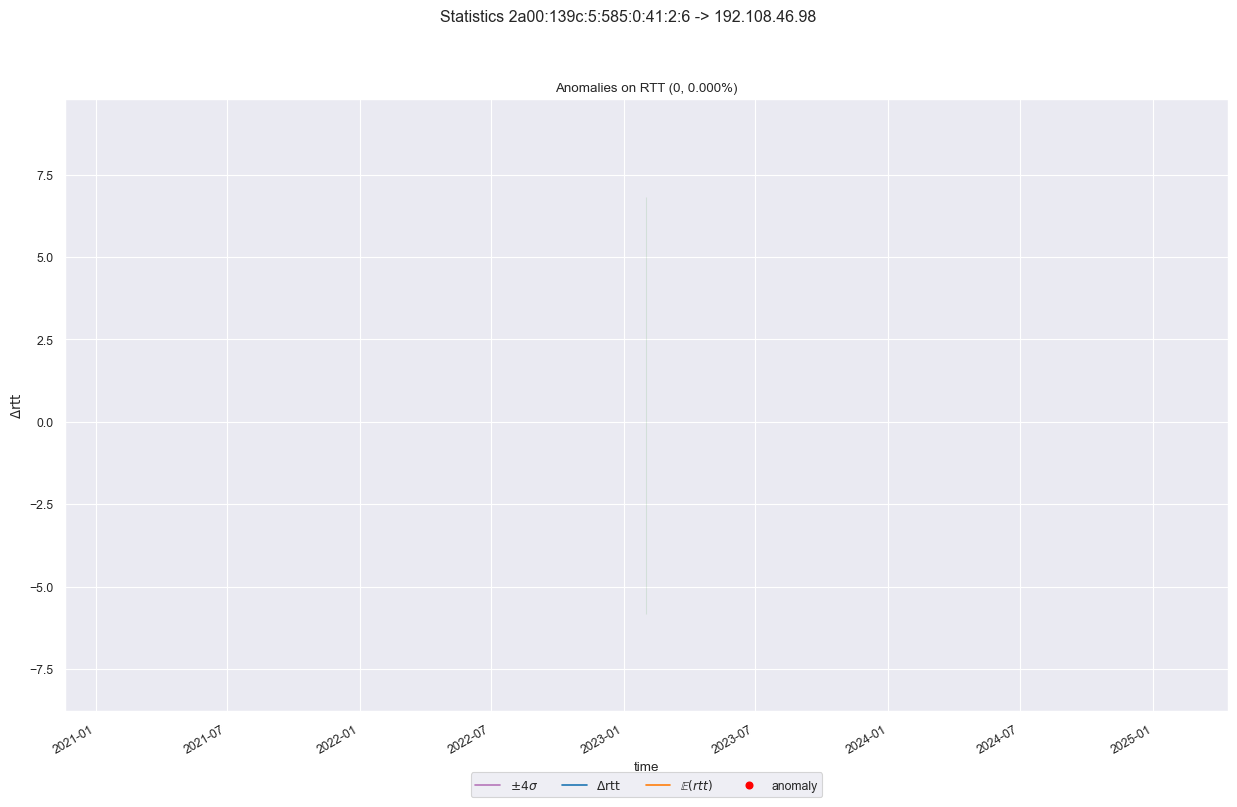

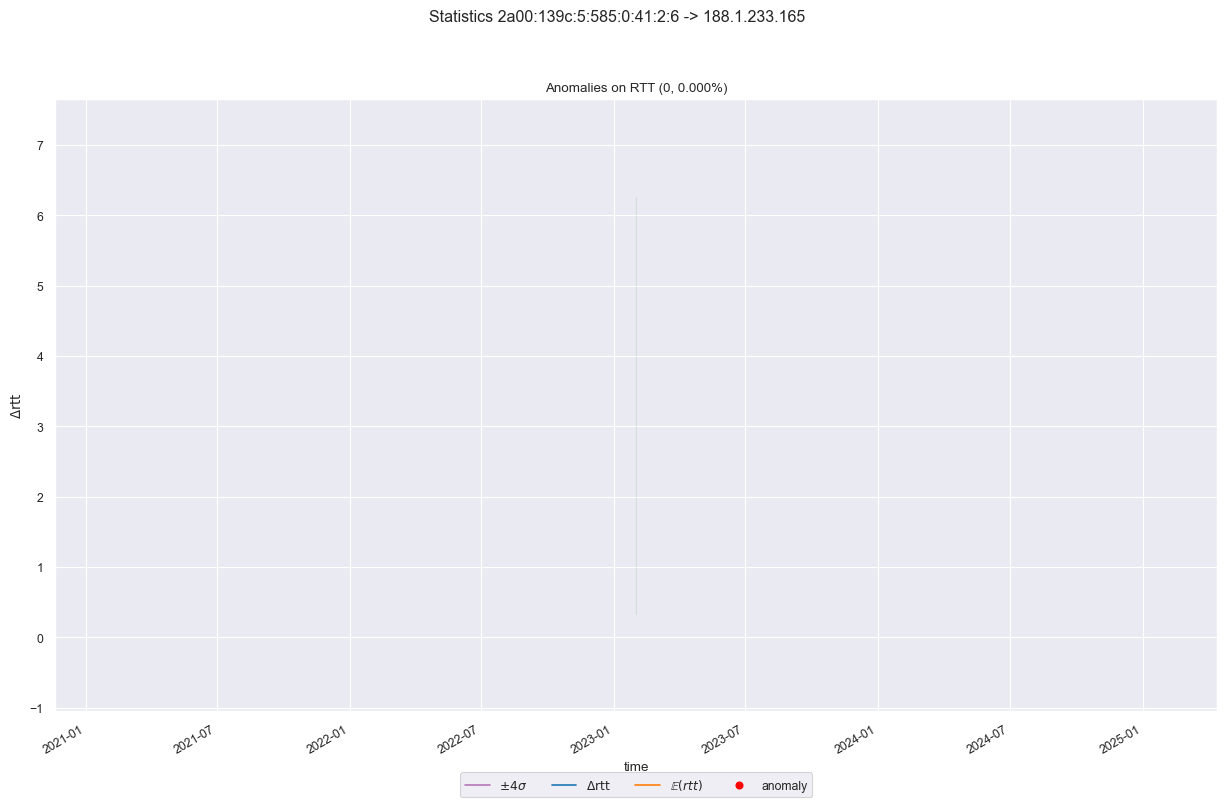

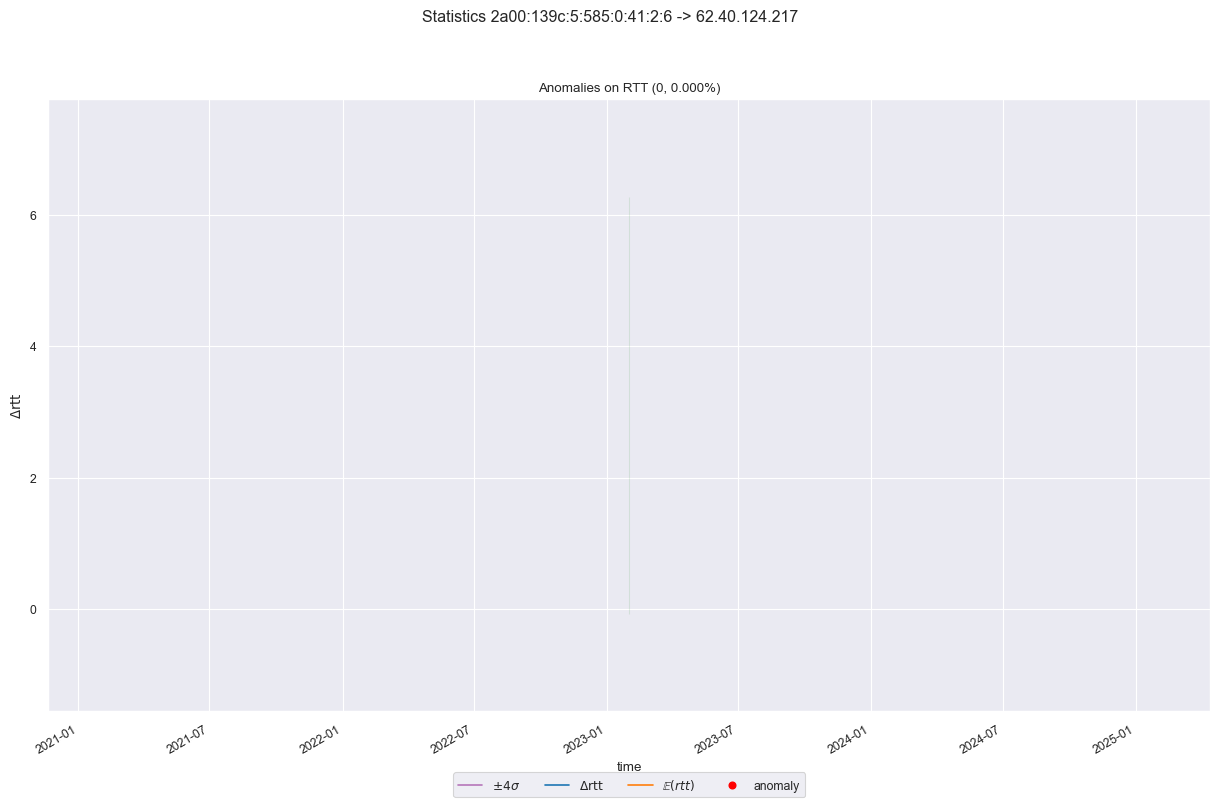

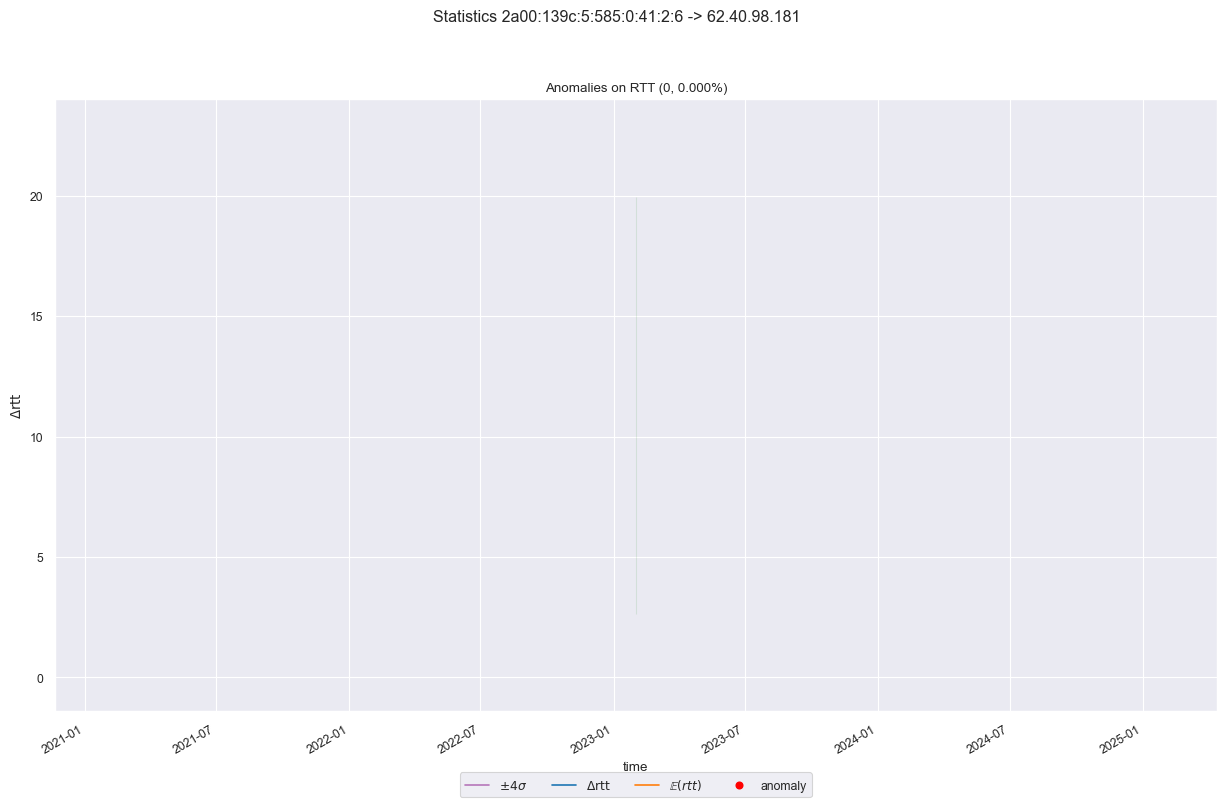

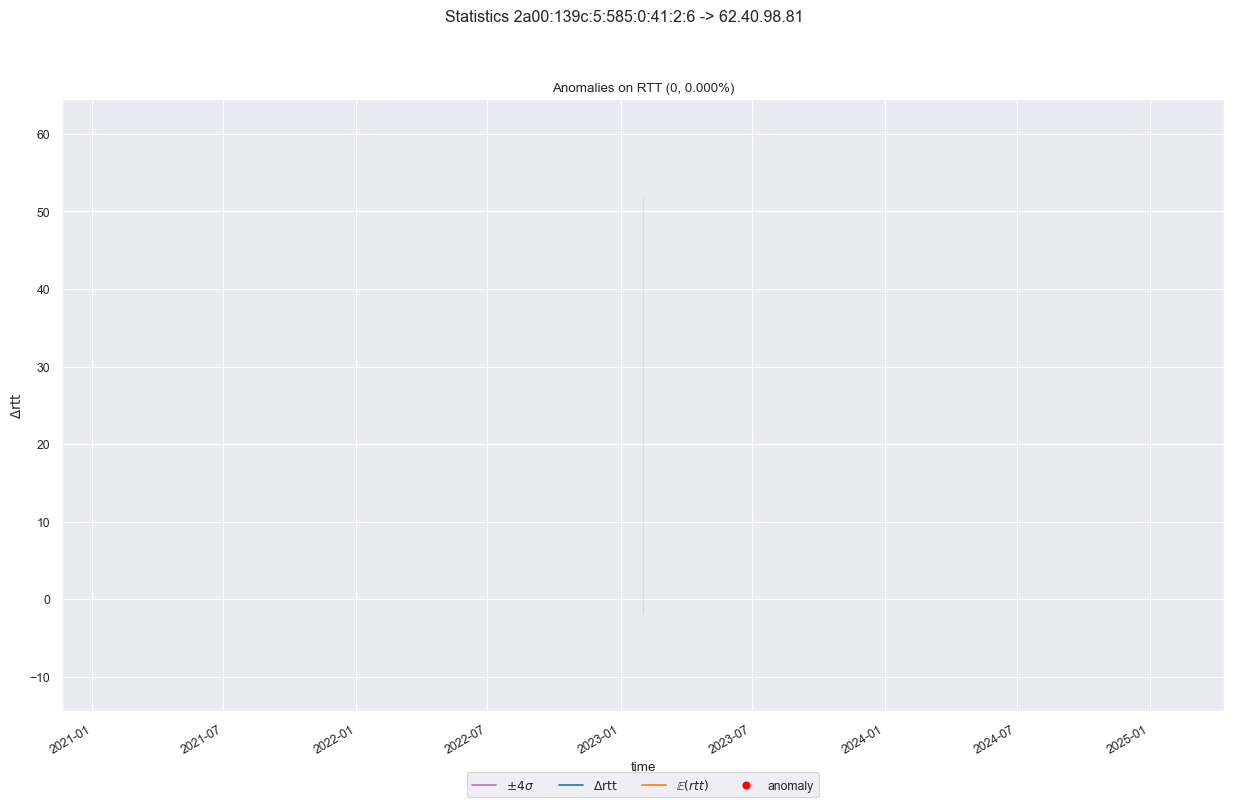

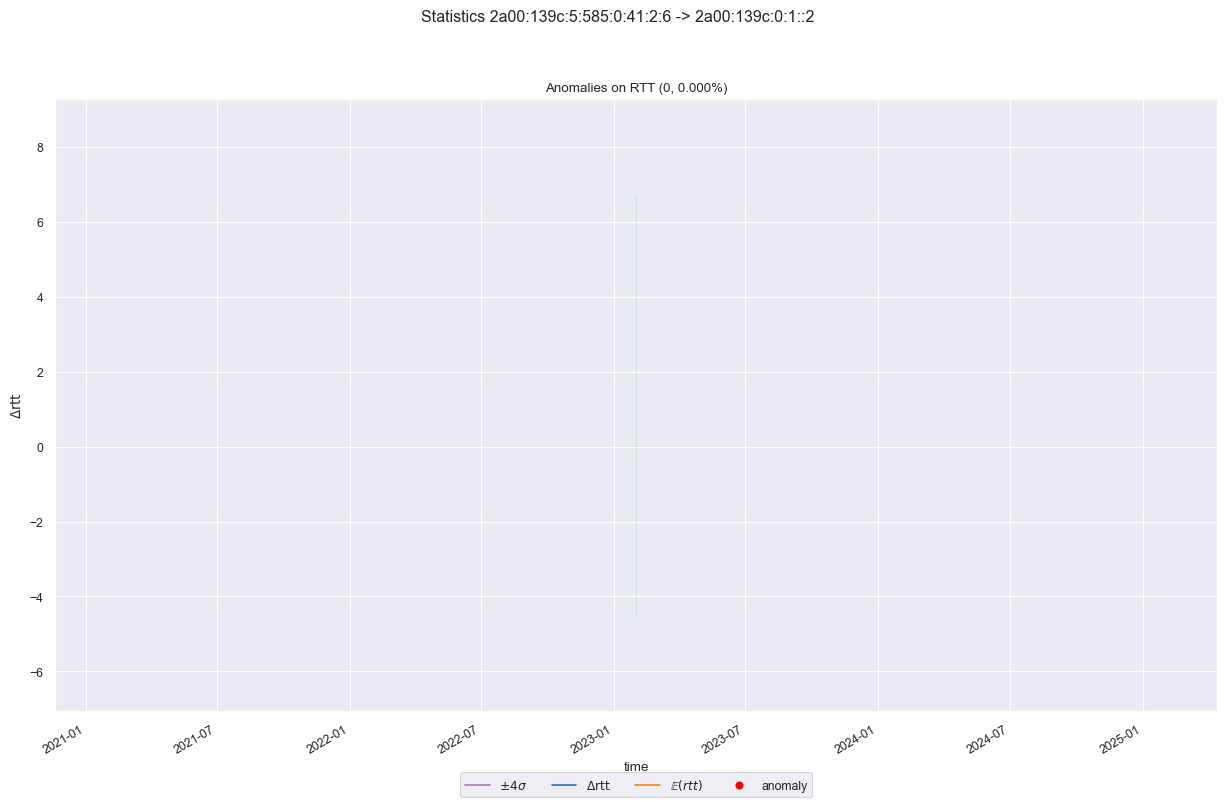

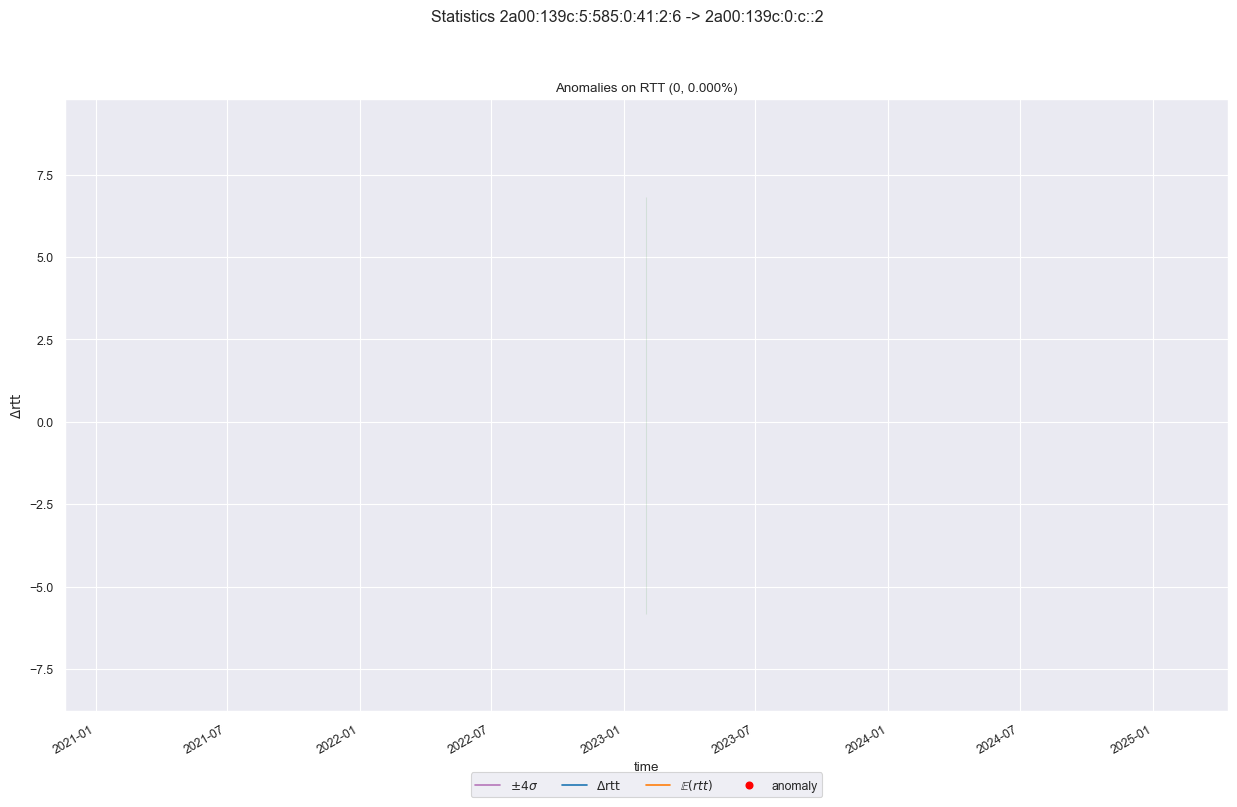

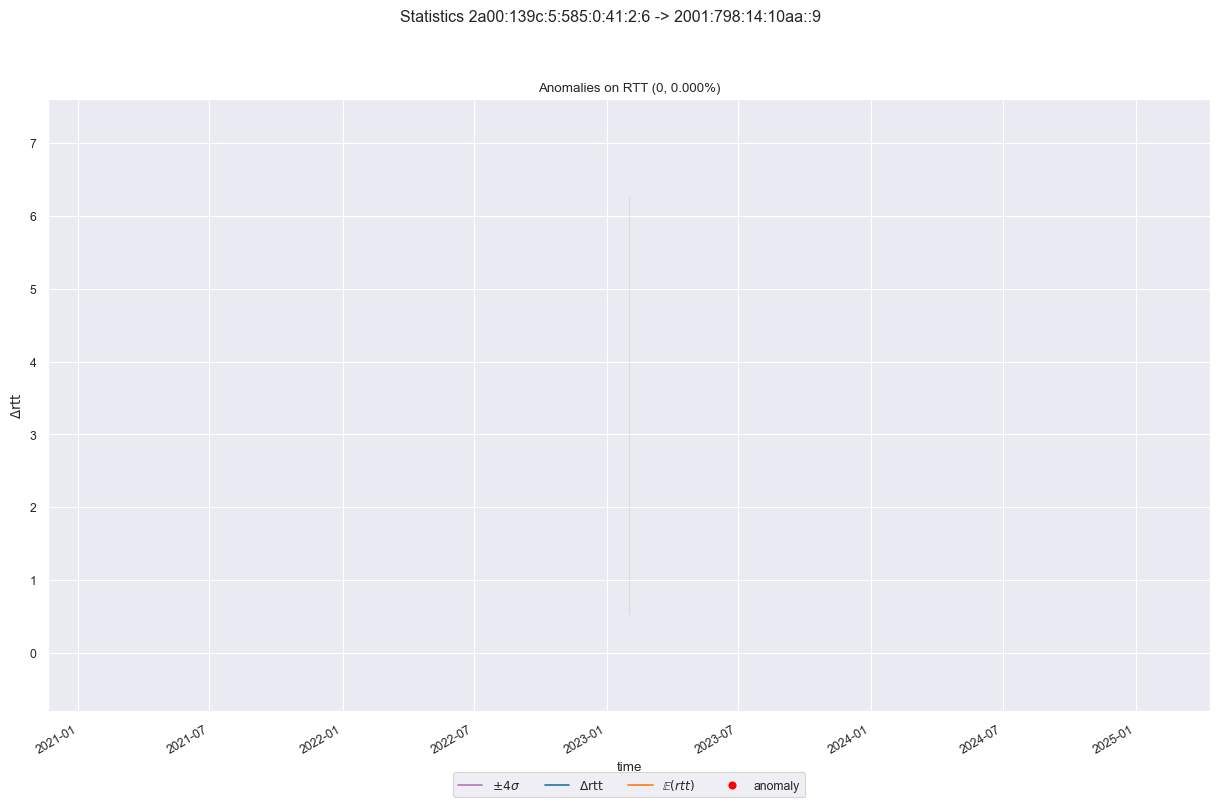

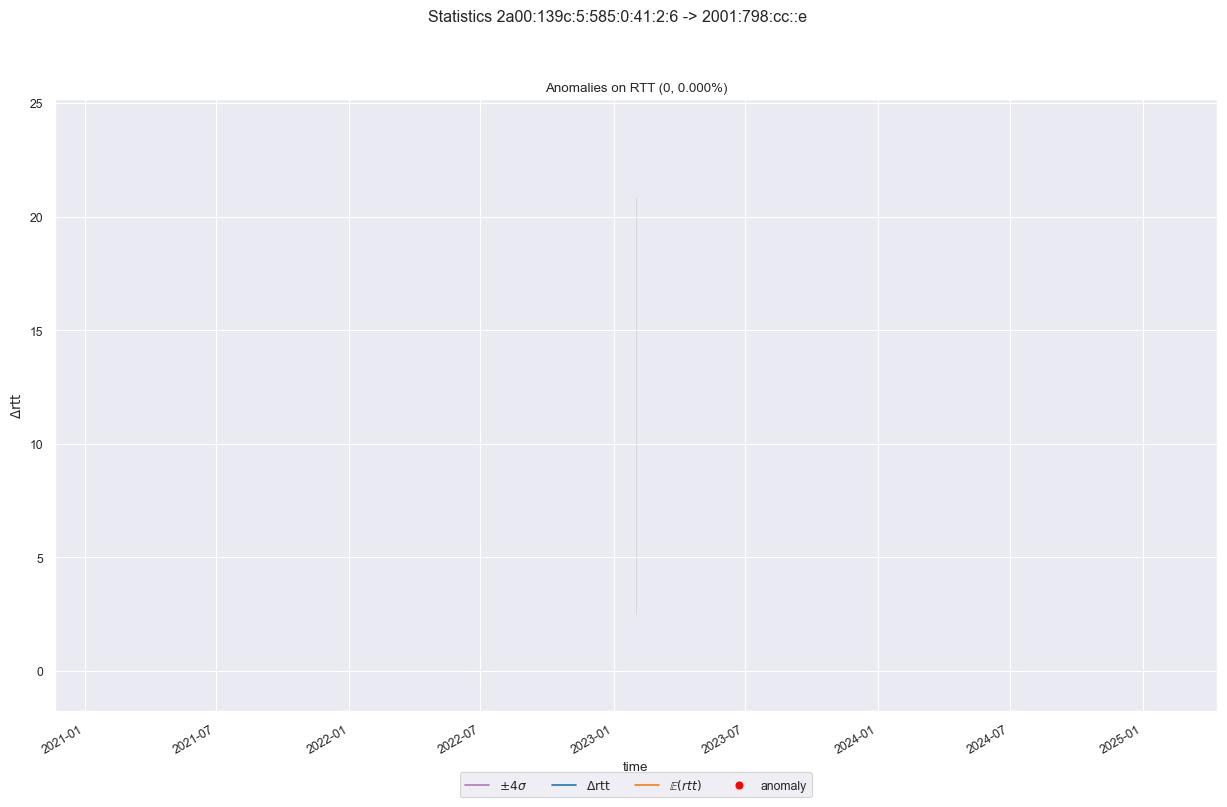

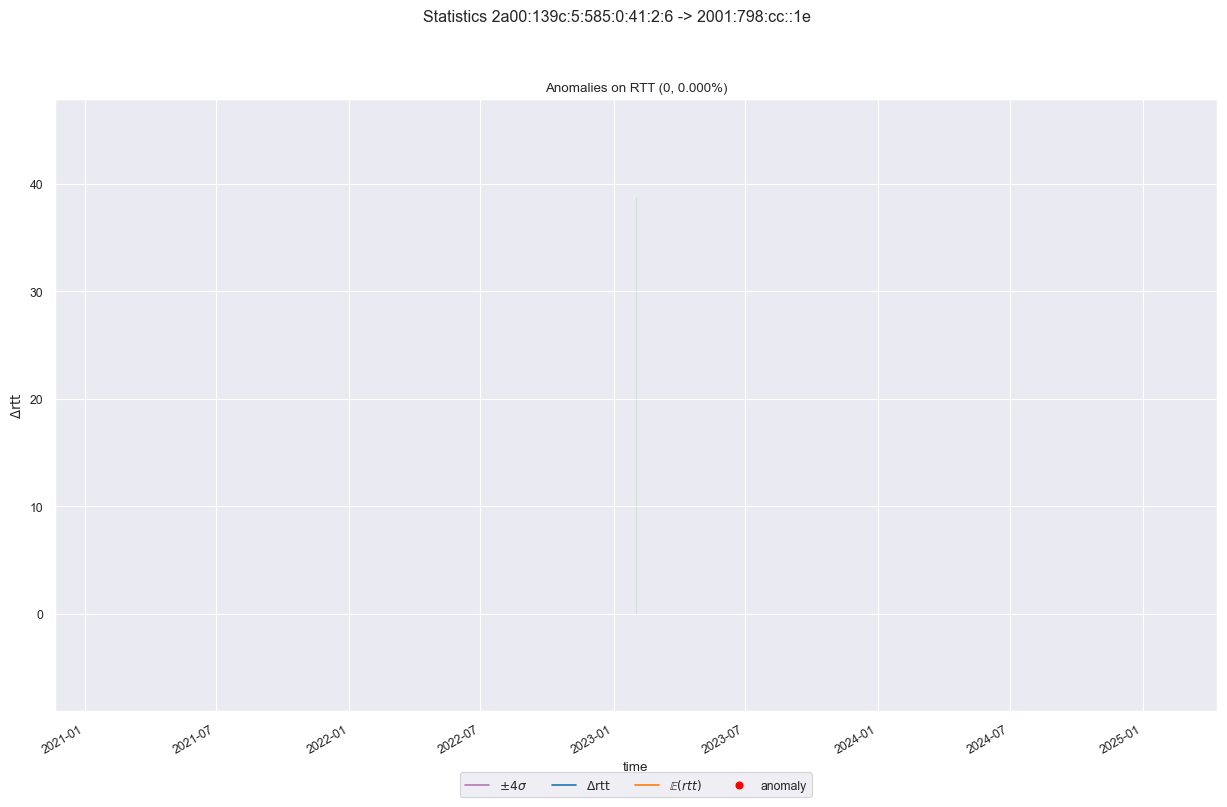

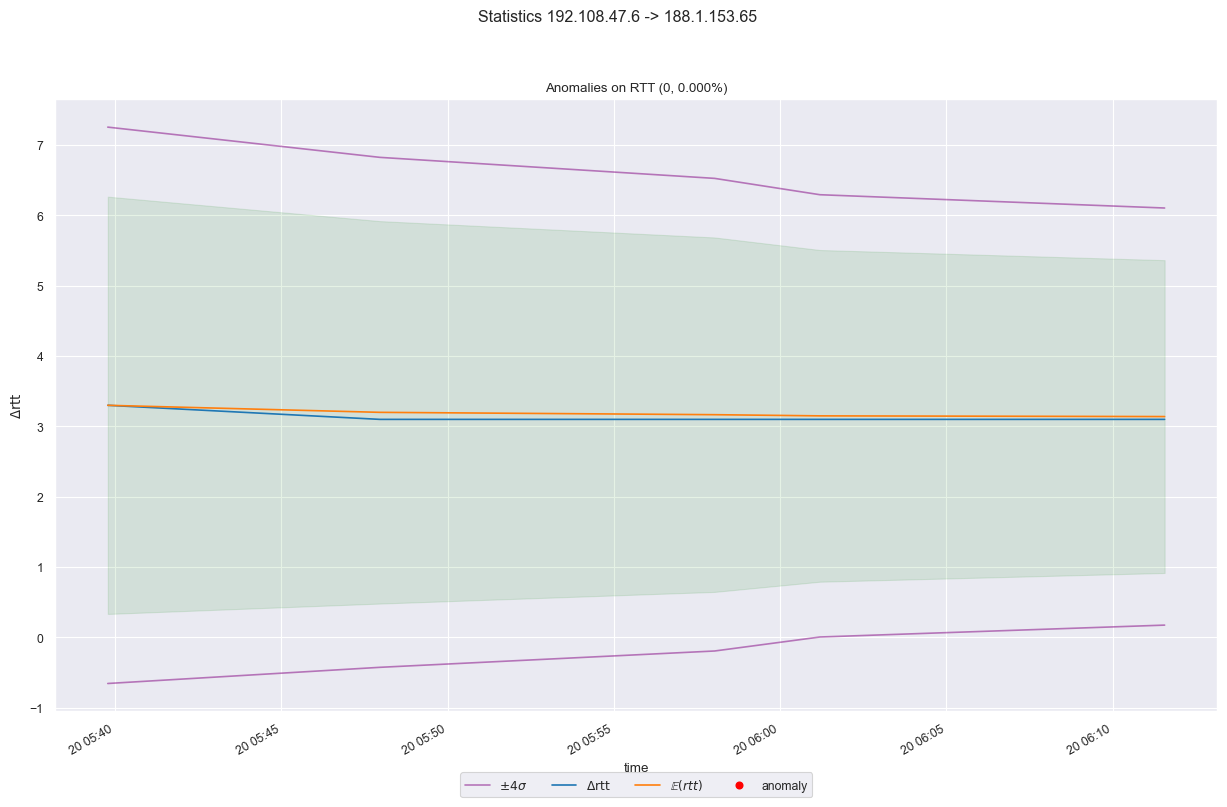

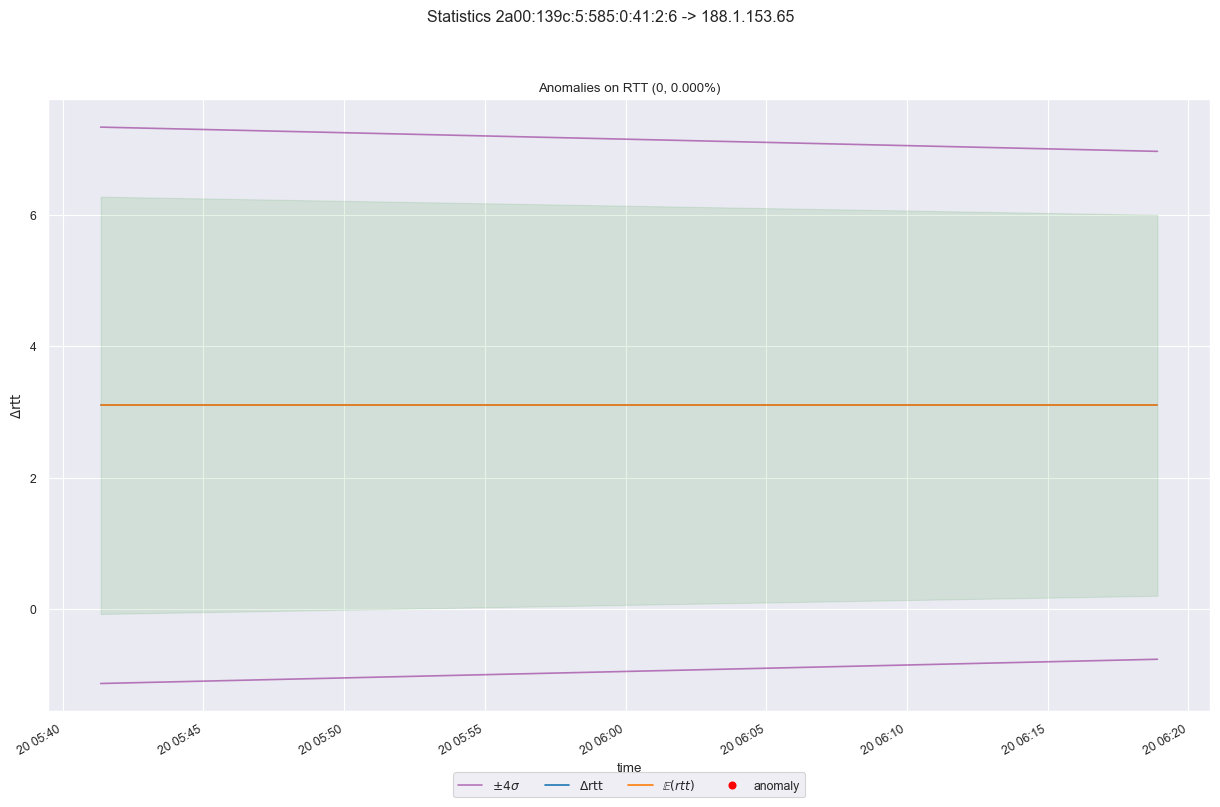

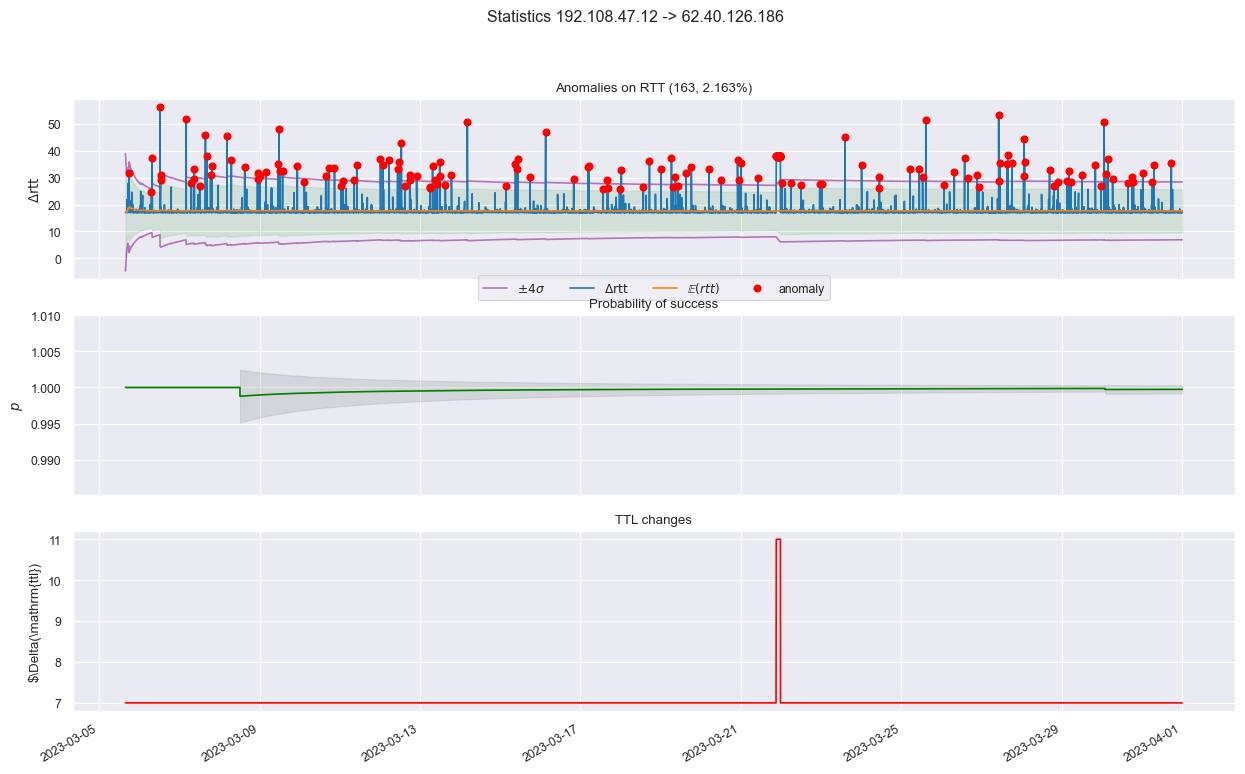

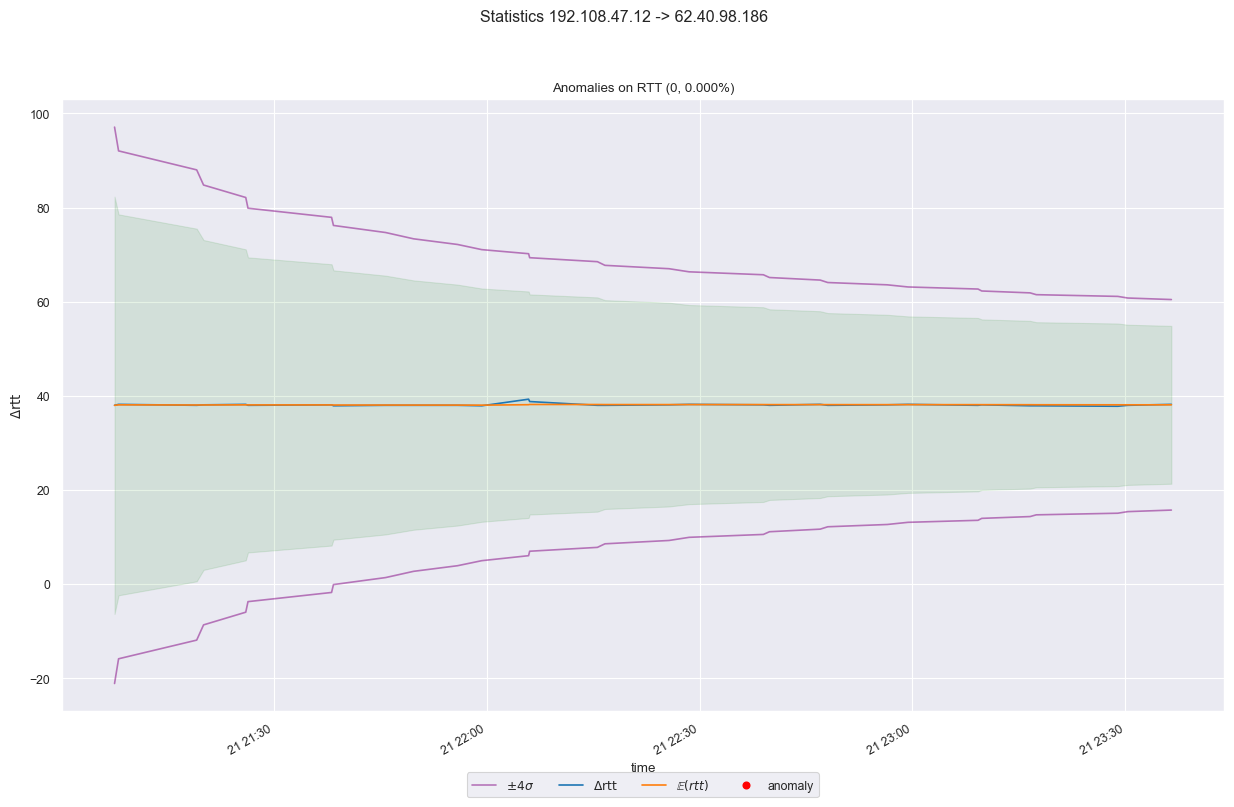

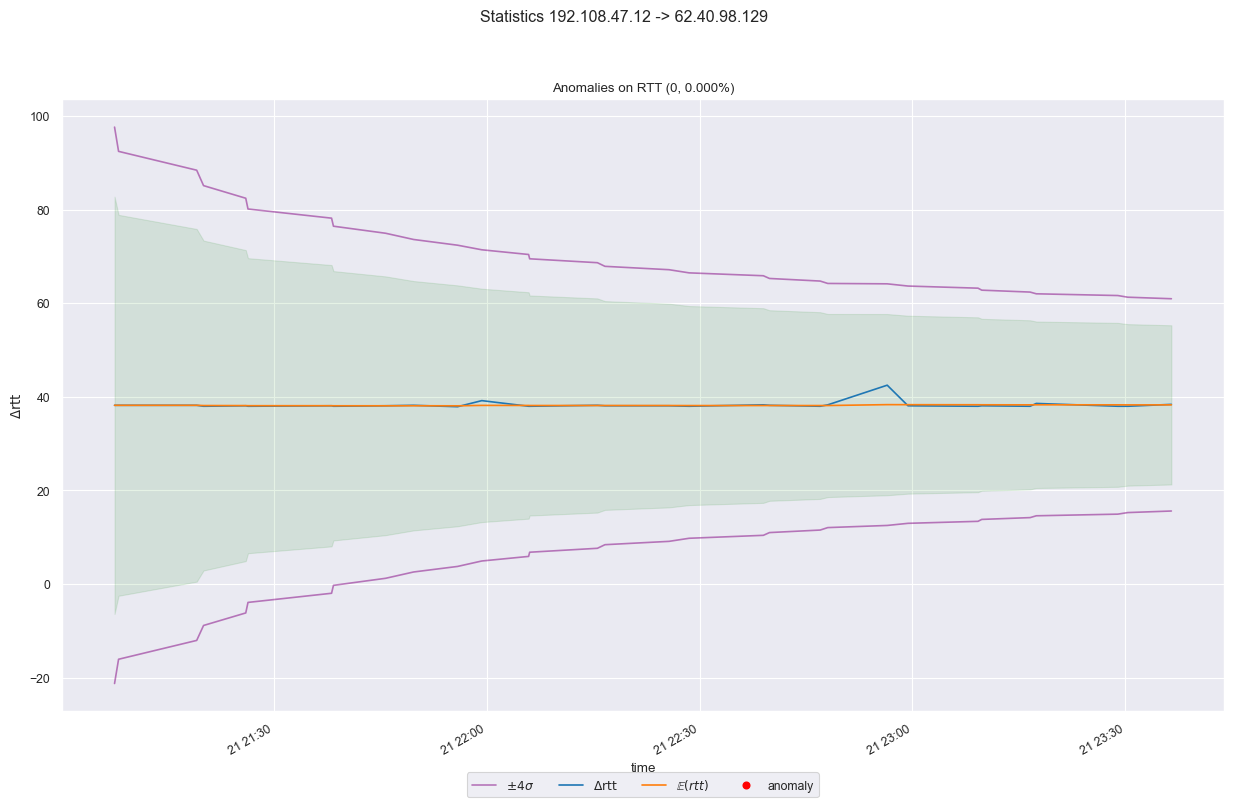

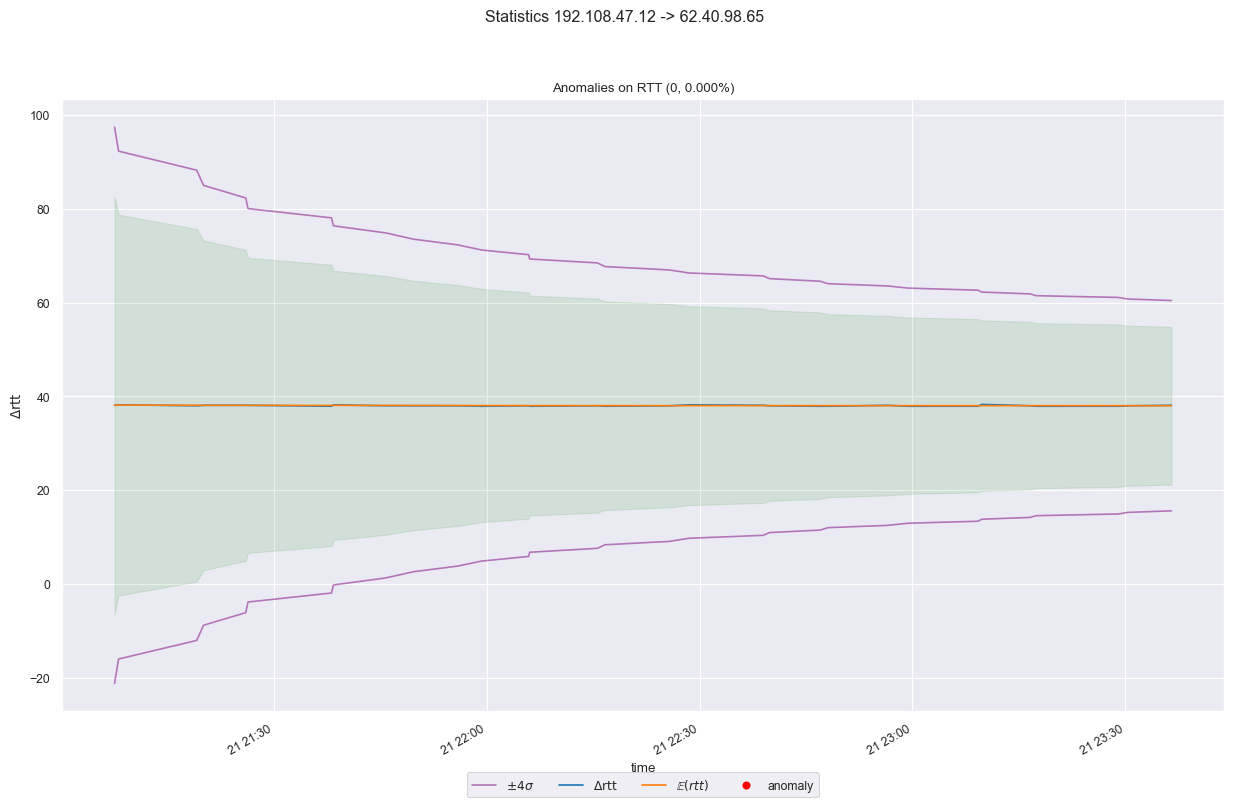

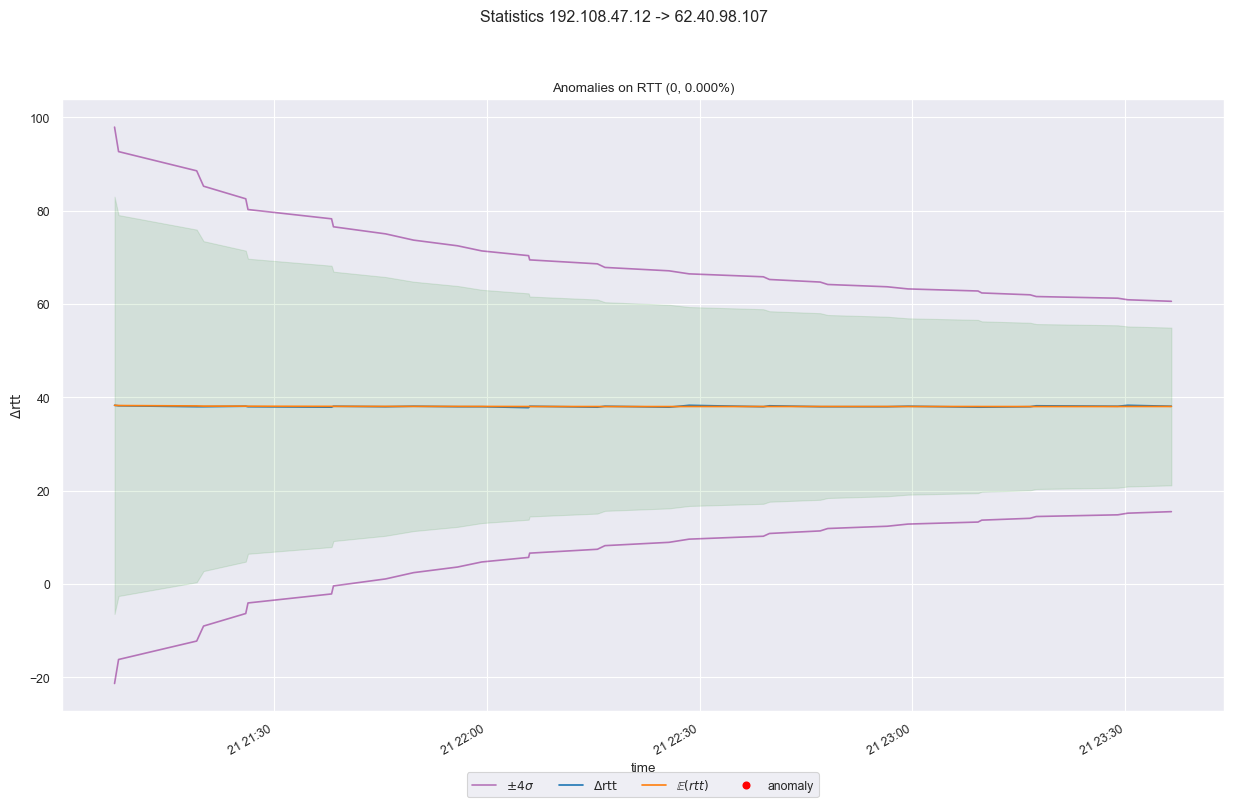

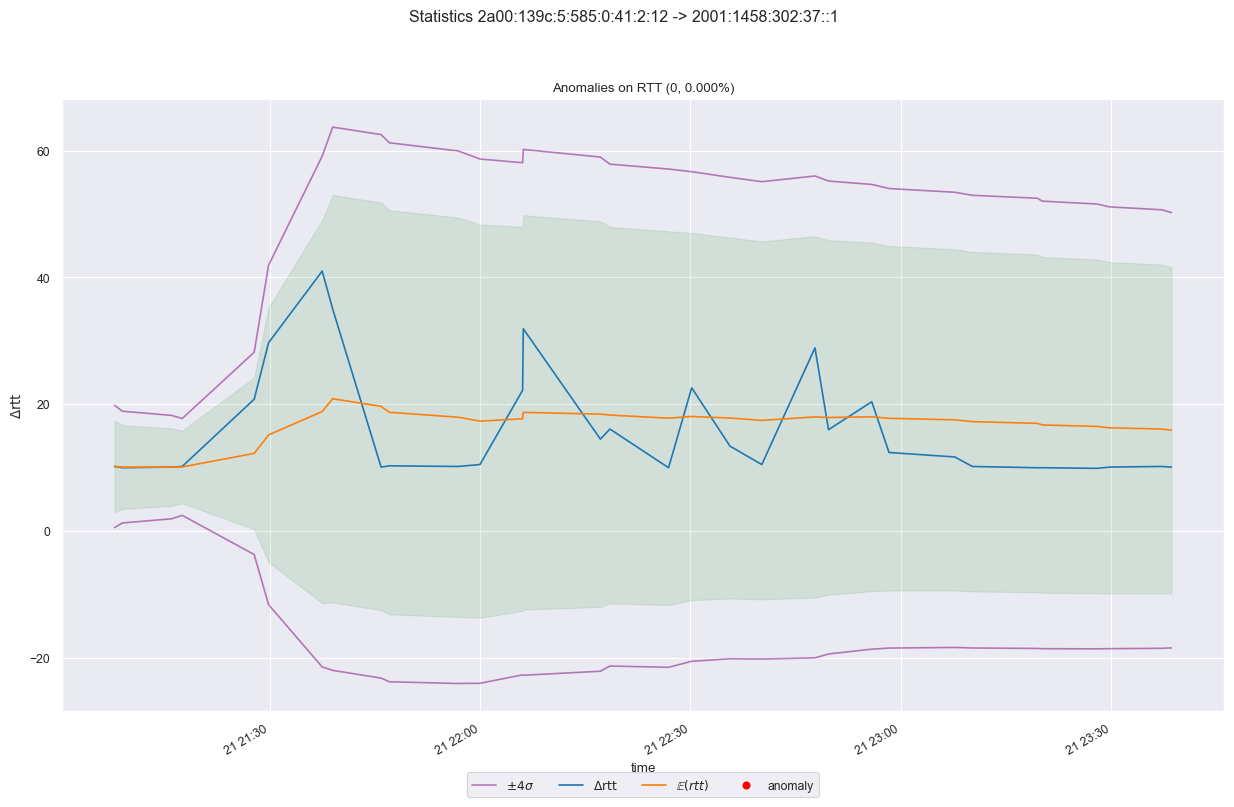

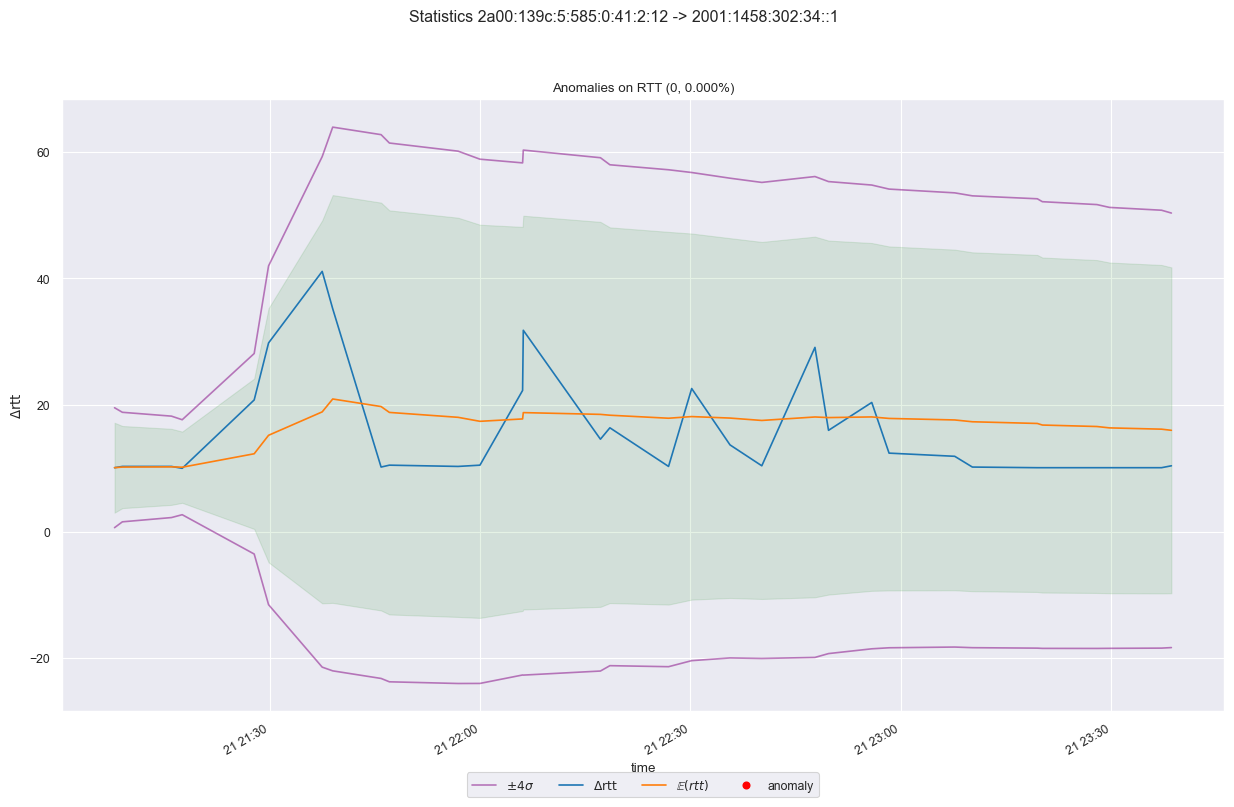

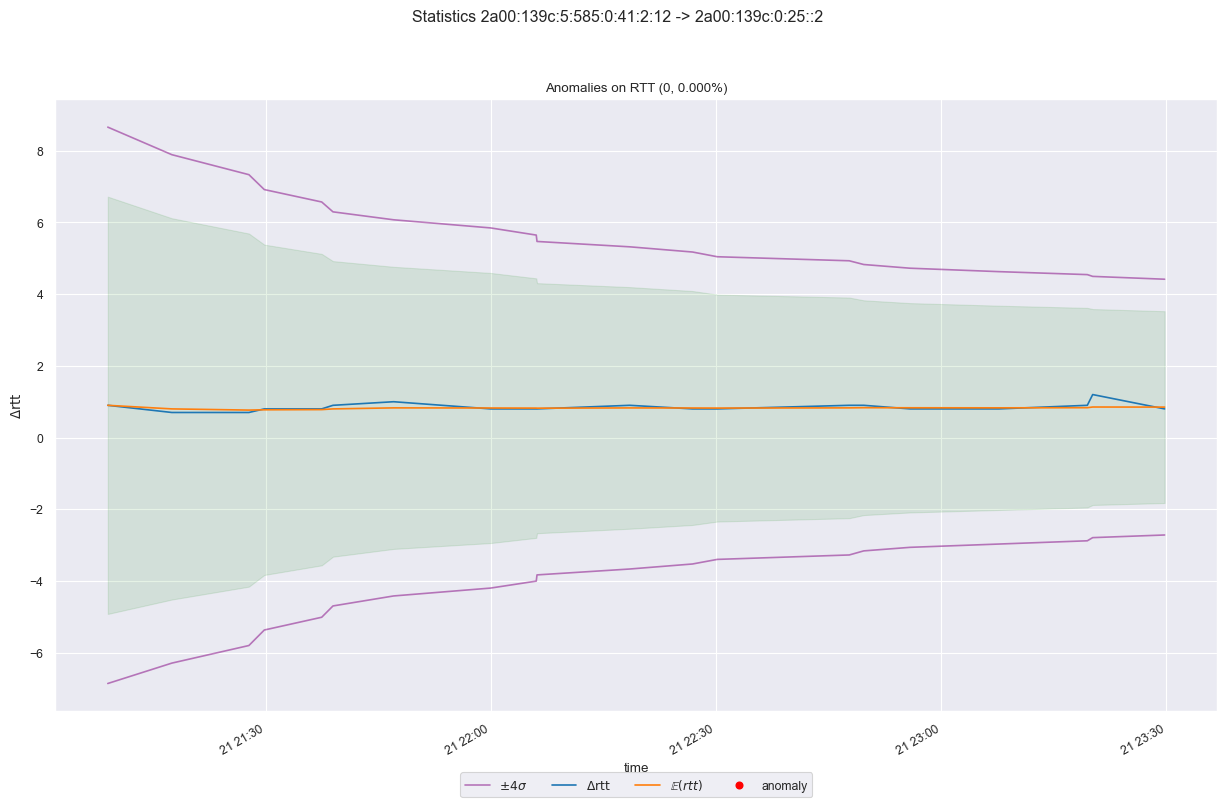

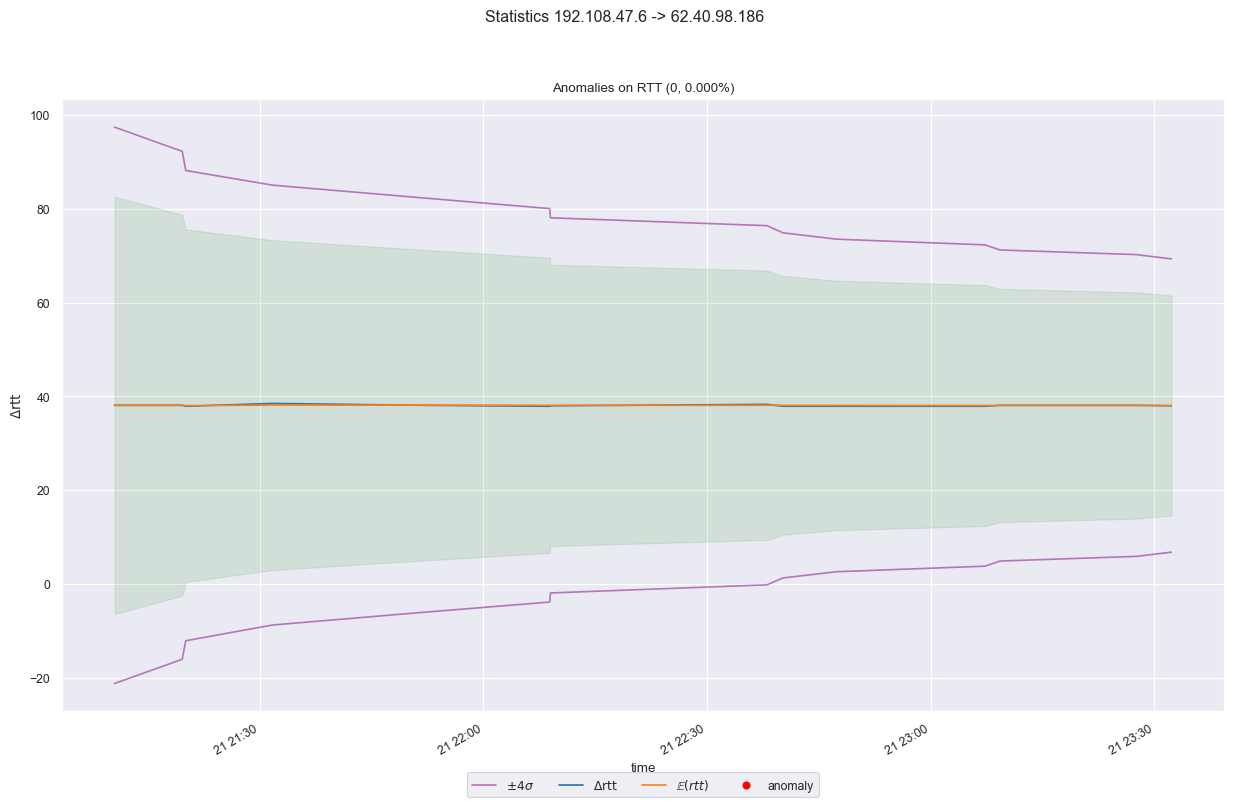

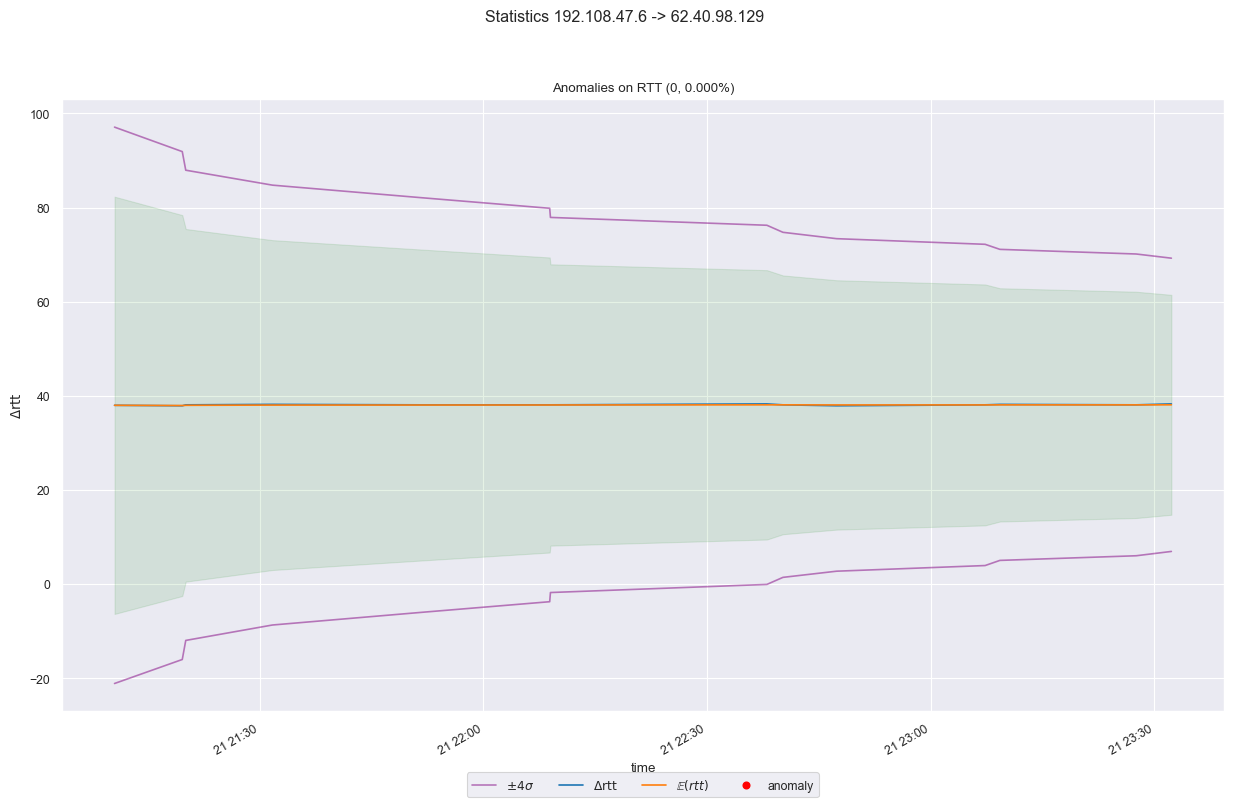

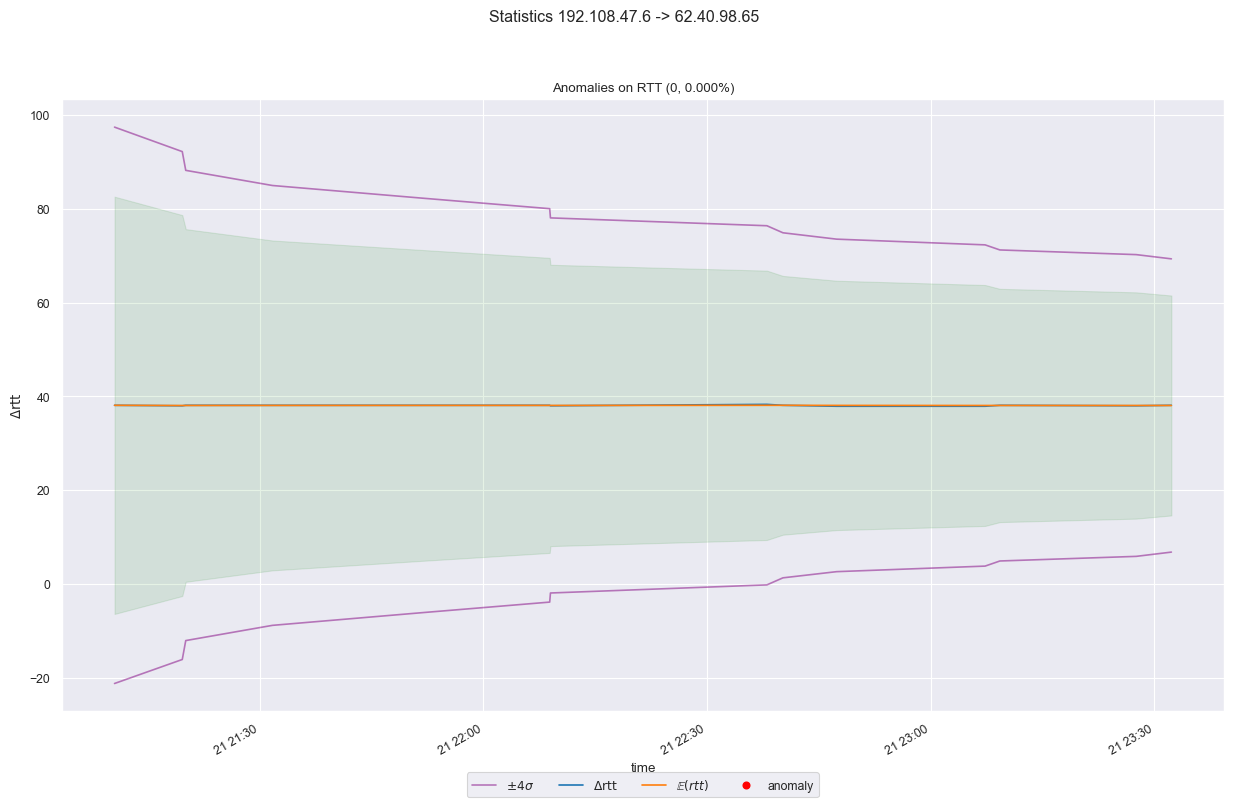

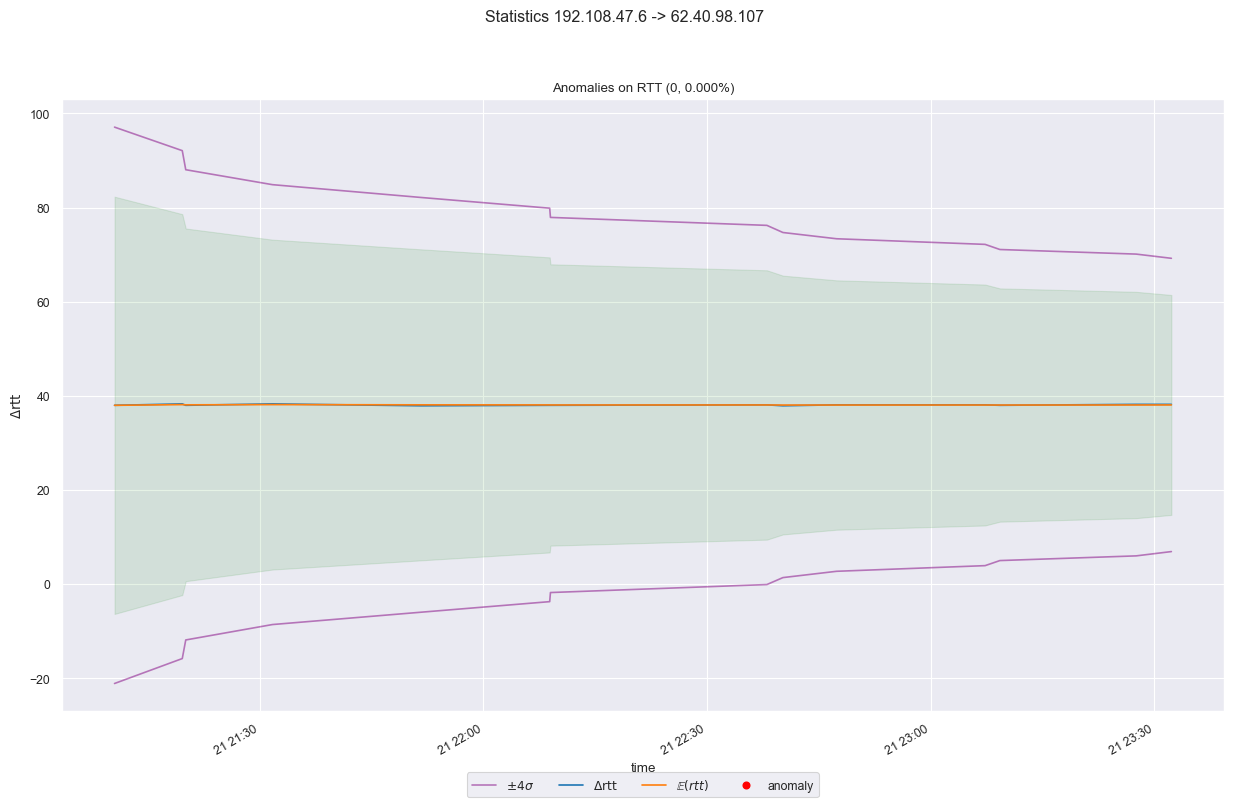

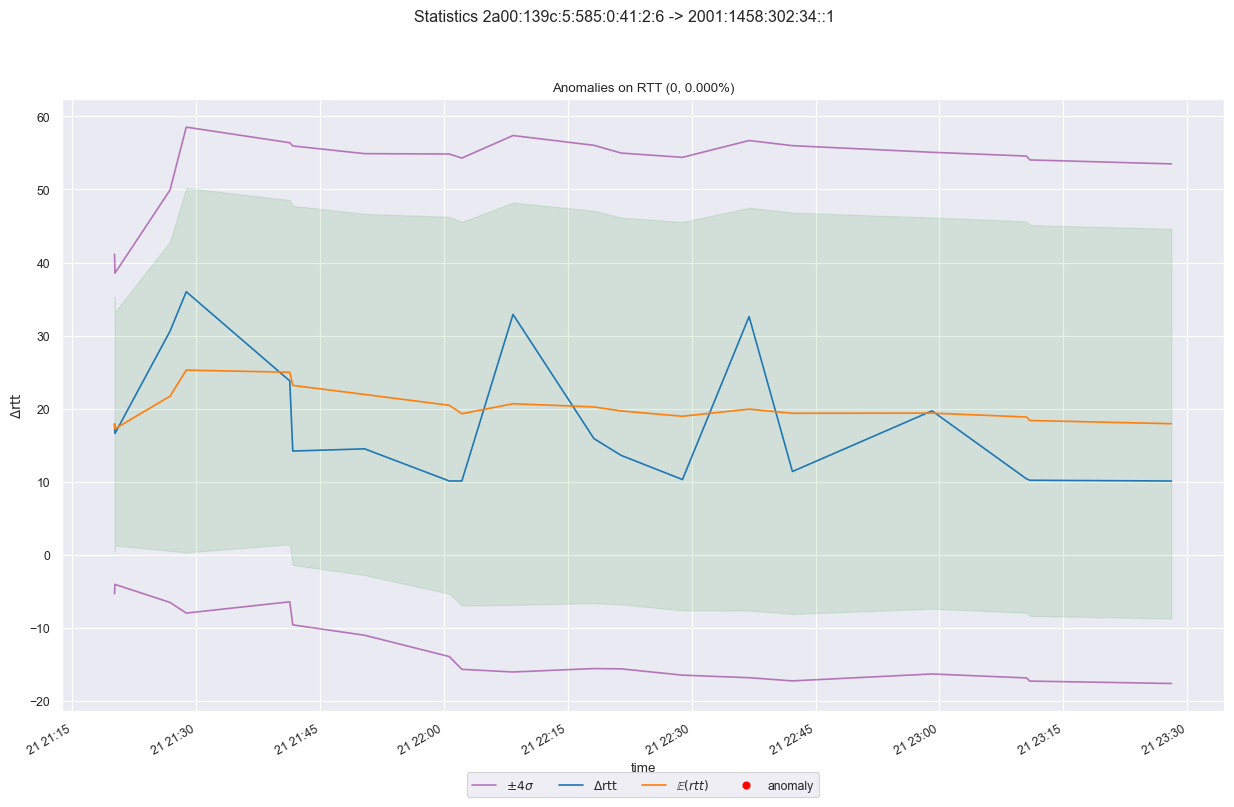

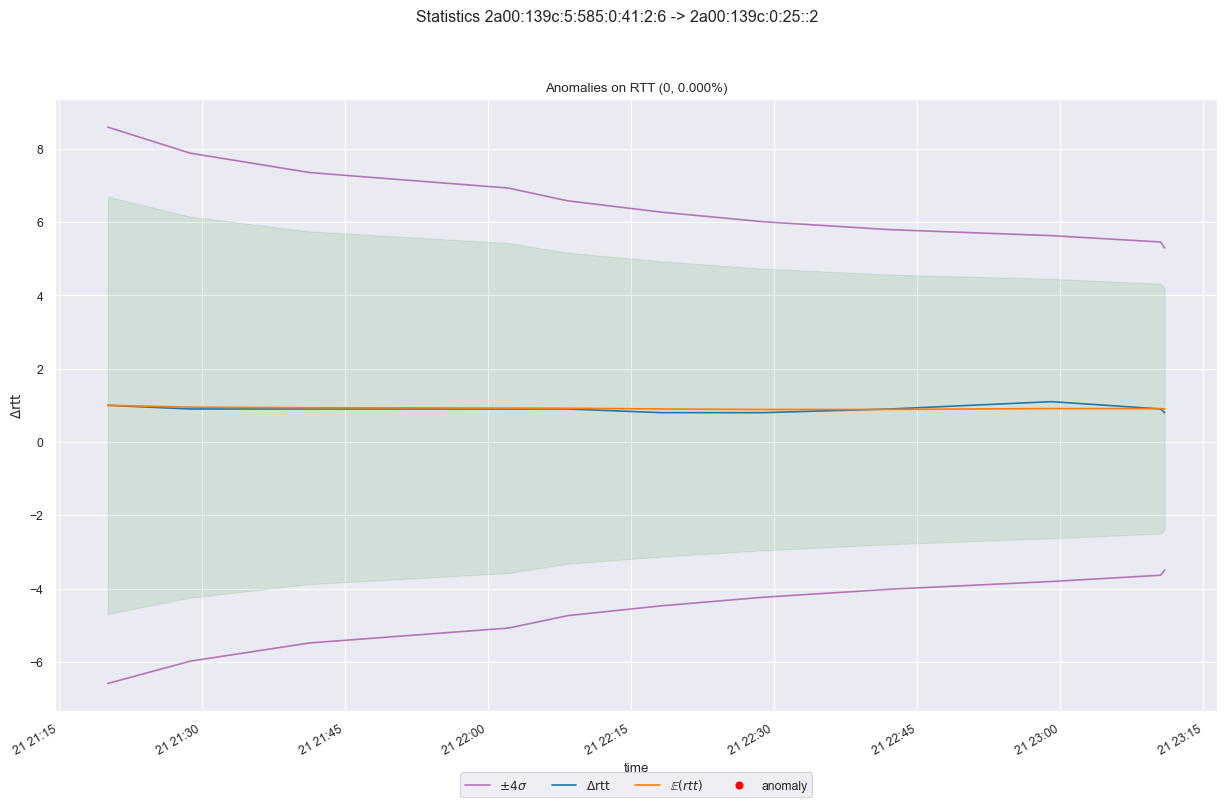

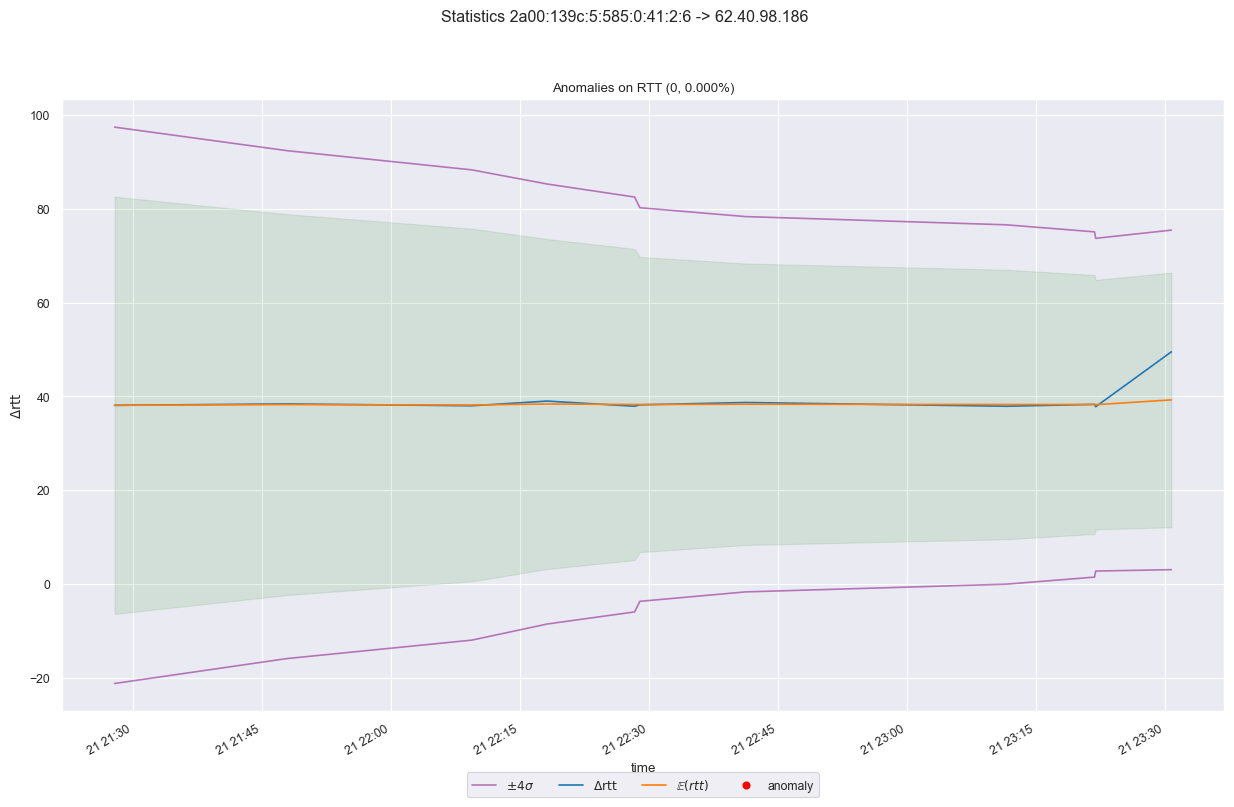

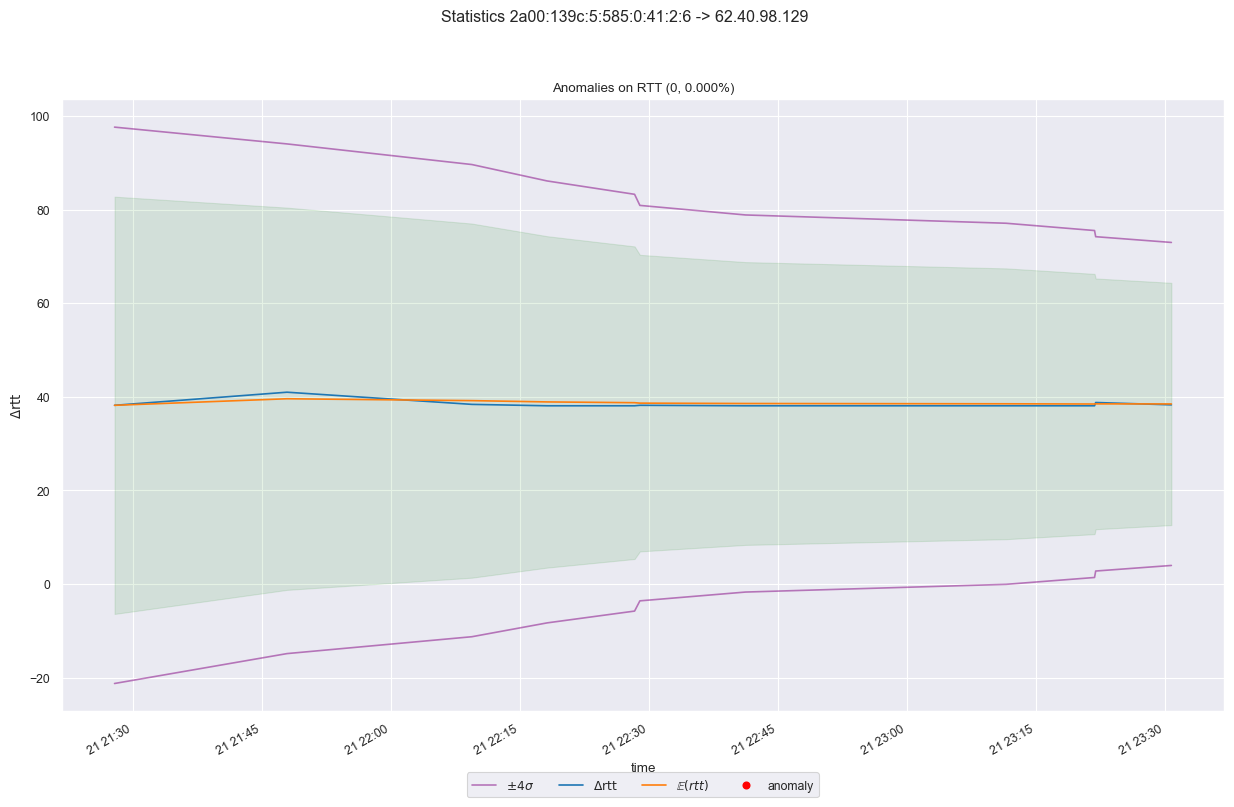

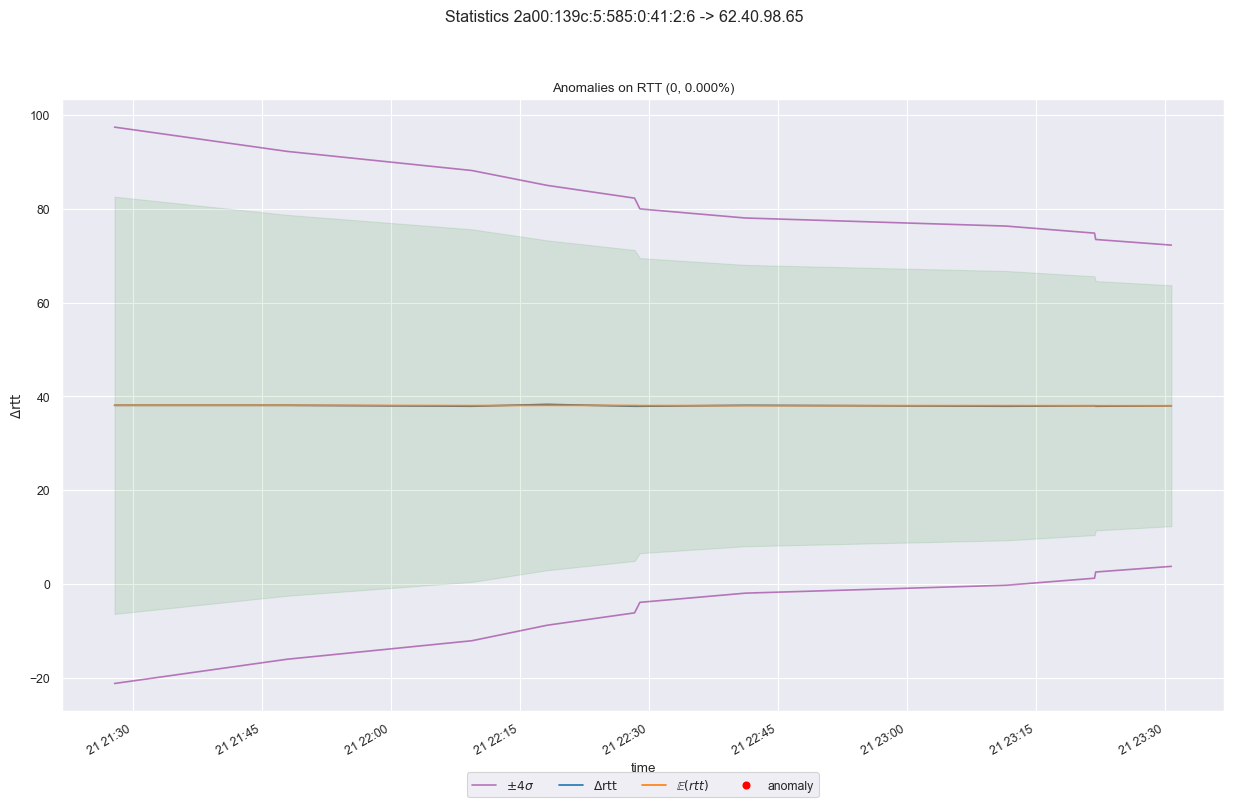

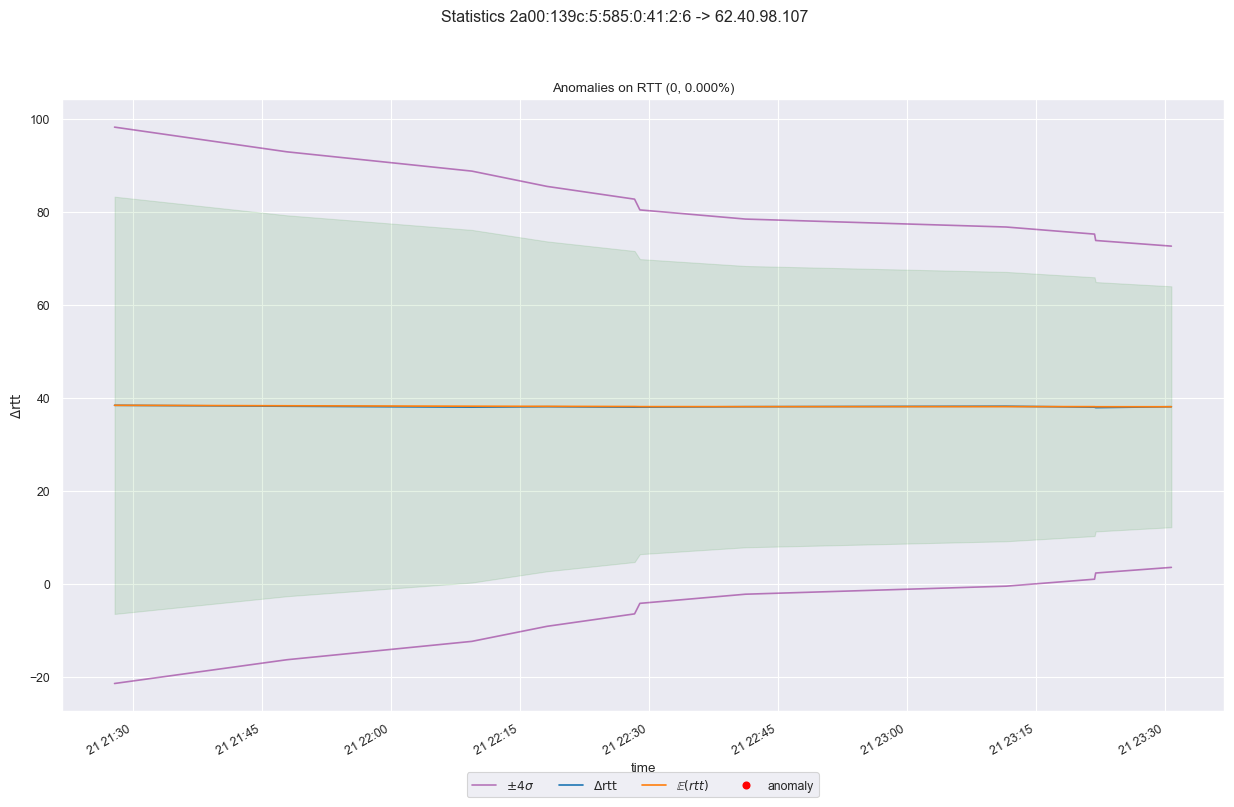

In [24]:
for m in list(ta.models.values()):
    m.plot()
    plt.show()

In [97]:
ns = {(u,v):ta.src_dest_freq[u][v] for (u,v) in ta.G.edges()}

In [98]:
sorted(ns.keys(), key=lambda x: ns[x], reverse=True)

[('2a00:139c:5:585:0:41:2:6', '2001:760:4205:254::12'),
 ('2a00:139c:5:585:0:41:2:6', '2001:760:4205:254::11'),
 ('192.108.47.6', '131.154.254.11'),
 ('192.108.47.6', '131.154.254.12'),
 ('2a00:139c:5:585:0:41:2:12', '2001:760:4205:254::12'),
 ('2a00:139c:5:585:0:41:2:12', '2001:760:4205:254::11'),
 ('192.108.47.12', '131.154.254.11'),
 ('192.108.47.12', '131.154.254.12'),
 ('2a00:139c:5:585:0:41:2:12', '2a00:139c:5:585::3'),
 ('2a00:139c:5:585:0:41:2:12', '2001:1458:302:38::1'),
 ('2a00:139c:5:585:0:41:2:12', '2001:1458:302:27::2'),
 ('2a00:139c:5:585:0:41:2:12', '2001:760:ffff:110::25'),
 ('2a00:139c:5:585:0:41:2:12', '2001:760:ffff:110::27'),
 ('2a00:139c:5:585:0:41:2:12', '2001:1458:302:37::1'),
 ('2a00:139c:5:585:0:41:2:12', '2001:1458:302:34::1'),
 ('2a00:139c:5:585:0:41:2:12', '2a00:139c:0:25::2'),
 ('192.108.47.12', '192.108.47.3'),
 ('192.108.47.12', '192.108.46.146'),
 ('192.108.47.12', '188.1.153.1'),
 ('192.108.47.12', '188.1.144.222'),
 ('192.108.47.12', '62.40.126.184'),


In [28]:
df2 = ta.models[key[0], key[2][0]].to_frame()

In [29]:
x = iter(ta.models.values())

In [43]:
for model in ta.models.values():
    if (model.to_frame()["delta_ttl"].nunique() != 1):
        break

In [44]:
model

2a00:139c:5:585:0:41:2:12 -> 2001:1458:302:27::2 (#9416 N(20.33, 6.70))

In [32]:
df = model.to_frame()

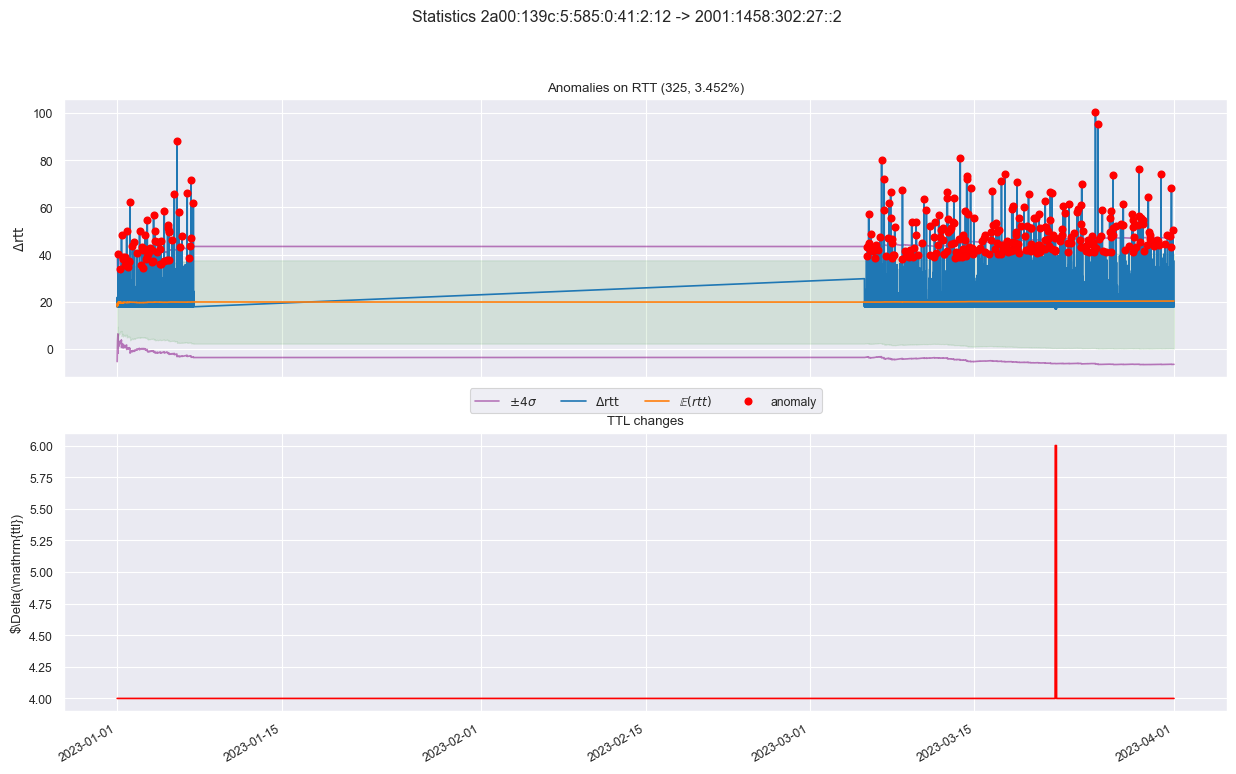

In [45]:
model.plot();